# Master Script 1

This Notebook is designed for the Classification, Regression and Novelty part. Go through the notebook and you could generate and get the results in our paper.

**Run the code cell below** to define some methods for ploting and printing results.

In [1]:
from timeout_decorator import timeout
from timeout_decorator.timeout_decorator import TimeoutError
from time_out import call_with_timeout
from IPython.display import display, HTML
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings
import time

warnings.filterwarnings("ignore", category=DeprecationWarning) 
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=Warning)               # help to filter out warning message

def plot_reg_per_data(rs_arr,data_name):
    """
    this function is for plotting individual data set in regression.
    """
    df_r2 = gen_rs(rs_arr[:,[1,3]],["Training $R^2$" ,"Testing $R^2$" ],regressors_regression)
    df_mse = gen_rs(rs_arr[:,[0,2]],["Training MSE" ,"Testing MSE" ],regressors_regression)
    df_mse.round(3)
    df_r2.round(3)
    title = str("Dataset: %s" % data_name)
    plot_table(df_r2)
    plot_table(df_mse)
    plot_bar(df_r2.T,"R2 " + title,"Regressors","Score")
    plot_bar(df_mse.T,"MSE " + title,"Regressors","Score")
                                
def plot_table(df):
    """
    this function is for plotting table result.
    """
    df = df.T
    df = df.round(3)
    display(df)


def plot_bar(df,title,xlabel,ylabel, is_show_ratio = False):
    """
    this function is for plotting hitogram result.
    """
    ax = df.plot.bar(rot=0,colormap=plt.cm.get_cmap('tab10', df.shape[1]),figsize = (20,15),fontsize = 16,width=.68);
    ax.set_title(title,fontdict = {"fontsize" : 24})
    ax.legend(loc = 1, fontsize = 14, framealpha = 0.4)
    ax.set_ylabel(ylabel,fontdict = {"fontsize" : 24})
    ax.set_xlabel(xlabel,fontdict = {"fontsize" : 24})
    if df.max().max() < 1 and not is_show_ratio:
        ax.set_ylim(top = 1.0)       
    fig = ax.get_figure()
    for p in ax.patches:
        height = p.get_height().round(2)
        ax.annotate('{}'.format(height),
                    xy=(p.get_x() + p.get_width() / 2, height + 0.01),
                    xytext=(0, 10),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
    png_name = str("jupyter_output/" + title + ".png")
    fig.savefig(png_name)

def gen_rs(testing_rs,index,lables):
    """
    this function is for generating pandas object for plotting convenience.
    """
    dic = {}
    for i in range(testing_rs.shape[0]):
        dic[lables[i]] = testing_rs[i, :]
    df = pd.DataFrame(dic, index=index,dtype=np.float)
    return df

# store rs of each data set in classification
rs_classification = {}

def train_classification(obj, shape = (8,6)):
    """
    this function is for training classifiers for each data set.
    """
    rs_cl = []
    knn_results = call_with_timeout(180,obj.k_nearest_neighbours,"knn")
    svc_results = call_with_timeout(180,obj.support_vector_classifier,"svc")
    dtc_results = call_with_timeout(180,obj.decision_tree_classifier,"dtc")
    rfr_results = call_with_timeout(180,obj.random_forest_classifier,"rfr")
    abc_results = call_with_timeout(180,obj.ada_boost_classifier,"abc")
    lr_results = call_with_timeout(180,obj.logistic_regression,"lr")
    gnb_results = call_with_timeout(180,obj.gaussian_naive_bayes,"gnb")
    nnc_results = call_with_timeout(180,obj.neural_network_classifier,"nnc")
    rs_raw = [knn_results,svc_results,dtc_results,rfr_results,abc_results,lr_results,gnb_results,nnc_results]
    
    for item in rs_raw:
        if item is not None:
            rs_cl.extend(item[0])
            rs_cl.extend(item[1])
        else:
            rs_cl.extend([None]*shape[1])
    rs_cl = np.array(rs_cl).reshape(shape)
    return rs_cl

# store rs of each data set in regression
rs_regression = {}

def train_regression(obj,shape = (7,4)):
    """
    this function is for training regressors automaticly for each data set.
    """
    rs_cl = []
    rs_raw = []
    svr_results = call_with_timeout(300,obj.support_vector_regression,"svr")
    dtr_results = call_with_timeout(300,obj.decision_tree_regression,"dtr")
    rfr_results = call_with_timeout(300,obj.random_forest_regression,"rfr")
    abr_results = call_with_timeout(300,obj.ada_boost_regression,"abr")
    gpr_results = call_with_timeout(300,obj.gaussian_process_regression,"gpr")
    llr_results = call_with_timeout(300,obj.linear_least_squares,"llr")
    nnr_results = call_with_timeout(300,obj.neural_network_regression,"nnr")
    rs_raw = [svr_results,dtr_results,rfr_results,abr_results,gpr_results,llr_results,nnr_results]
    
    for item in rs_raw:
        if item is not None:
            if type(item[0]) is list or type(item[0]) is tuple:
                rs_cl.extend(item[0])
                rs_cl.extend(item[1])
            else:
                rs_cl.append(item[0])
                rs_cl.append(item[1])
        else:
            rs_cl.extend([None]*shape[1])
    rs_cl = np.array(rs_cl).reshape(shape)
    return rs_cl

def avg_output(input): 
    """
    for averagving the multilabel result in regression
    """
    for i in range(input.shape[0]):
        for j in range(input.shape[1]):
            if type(input[i,j]) is list:
                input[i,j] = np.average(np.array(input[i,j],dtype = np.float))
    return input


index_classification = ["Accuracy/Train","Precision/Train","Recall/Train","Accuracy/Test","Precision/Test","Recall/Test",]
classifiers_classification = ["KNN","SVC","DTC","RFC","ABC"," LR","GNB","NNC"]
index_regression = ["MSE/Train","$R^2$/Train","MSE/Test","$R^2$/Test",]
regressors_regression = ["SVR","DTR","RFR","ABR","GPR","LLR" ,"NNR"]

#  1. Classification

In this part, we are going to generate objects for each data set and plot the comparison chart. **part 1.1 to 1.10** are going to generate the objects for each __data set__. You can run the code below the part which ever you want to be further showed in **part 1.11**, result showing cell.

**run the code** below to active which data set you wanna show in the resulting part.

In [2]:
# timer
start = time.time()

## 1.1 Dataset: *Diabetic Retinopathy* (Classification 1)
**run the code** below to generate the object.

In [3]:
from models.classification.Diabetic_Retinopathy import Diabetic_retinopathy

dr = Diabetic_retinopathy()
rs_dr = train_classification(dr)
rs_classification["Diabetic_Retinopathy"] = rs_dr

## 1.2 Dataset: *Default of credit card clients* (Classification 2)
**run the code** below to generate the object.

In [4]:
from models.classification.Default_of_Credit_Card_Clients import Default_of_credit_card_clients

doccc = Default_of_credit_card_clients()
rs_doccc = train_classification(doccc)
rs_classification["Default_of_Credit_Card_Clients"] = rs_doccc


svc timed out after 180.000000 seconds. We consider it as a failure.

nnc timed out after 180.000000 seconds. We consider it as a failure.


As we can see, **the Support_vector_classifier** and **Neural_network_classsifier** failed in this data set.

## 1.3 Dataset: *Breast Cancer Wisconsin* (Classification 3)
**run the code** below to generate the object.

In [5]:
from models.classification.Breast_Cancer_Wisconsin import Breast_cancer_wisconsin

bcw = Breast_cancer_wisconsin()
rs_bcw = train_classification(bcw)
rs_classification["Breast_Cancer_Wisconsin"] = rs_bcw

## 1.4 Dataset: *Statlog Australian Credit Approval* (Classification 4)
**run the code** below to generate the object.

In [6]:
from models.classification.Australian_Credit_Approval import Australian_credit_approval

aca = Australian_credit_approval()
rs_aca = train_classification(aca)
rs_classification["Australian_Credit_Approval"] = rs_aca

## 1.5 \*Dataset: *Statlog German Credit Data* (Classification 5)

This data set we trained models by using the cost matrix given by the description of the data set.

*raws* means **targets** and *columns* means **prediction**
                
<center>$\begin{bmatrix}  & 1 & 2\\ 1 & 0 & 1\\2 & 5 & 0\end{bmatrix}$</center>
(1 = Good, 2 = Bad) 

Instead of using the accuracy score for model selecting. Here we change the cretion to the dot production of the cos matrix showed before and the confusion matrix. And the strategy is to find the model with the minimum of this production.

**run the code** below to generate the object.

In [7]:
from models.classification.Statlog_German_credit_data import Statlog_german_credit

sgcd = Statlog_german_credit()
rs_sgcd = train_classification(sgcd)
rs_classification["Statlog_German_credit_data"] = rs_sgcd

If you want to get the cost result, **run the code** below.

,Training Cost,Testing Cost
KNN,0.0,315.0
SVC,460.0,251.0
DTC,426.0,357.0
RFC,5.0,305.0
ABC,497.0,271.0
LR,520.0,245.0
GNB,512.0,224.0
NNC,0.0,242.0


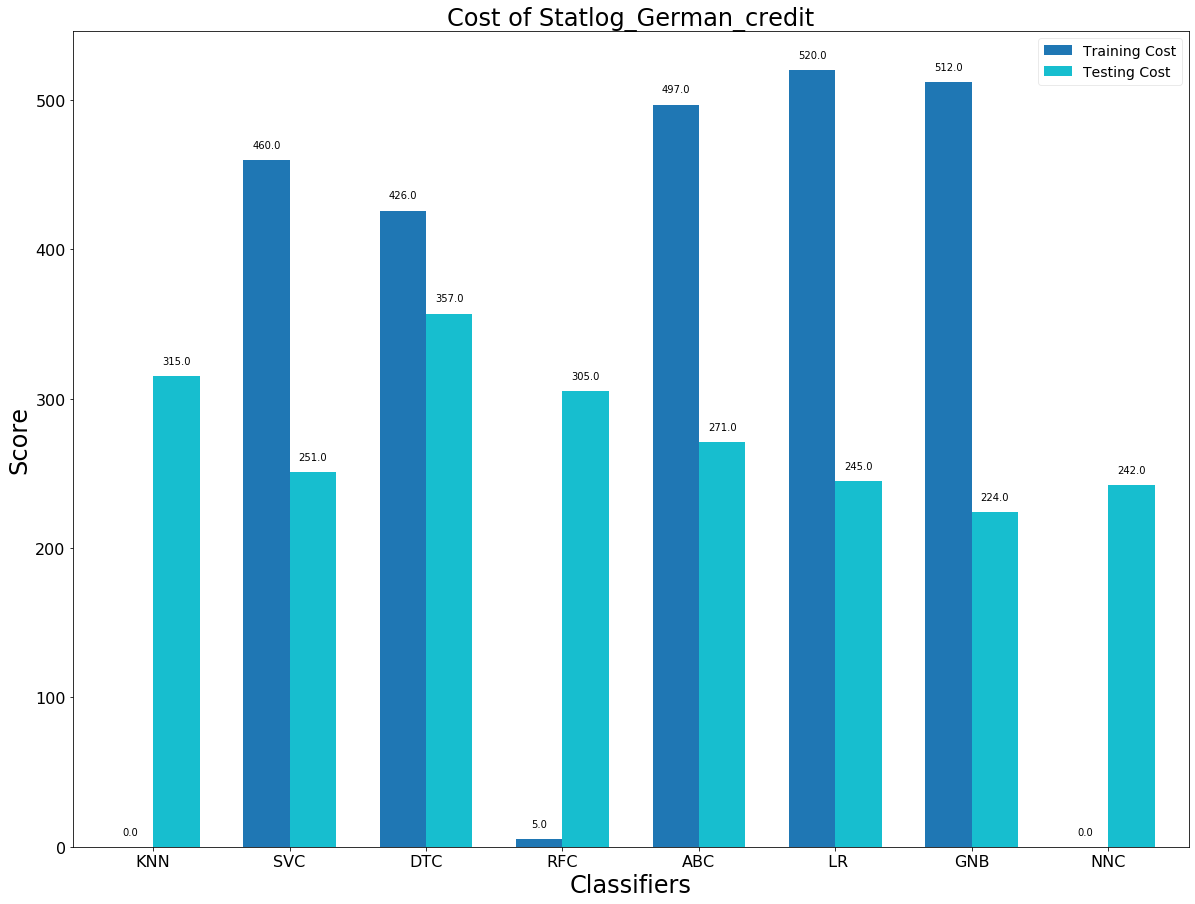

In [8]:
# code for cost result output.
df_sgcd = gen_rs(np.array(sgcd.rs_cost).reshape(8,2),["Training Cost" ,"Testing Cost" ],classifiers_classification)
df_sgcd.round(3)
plot_table(df_sgcd)
plot_bar(df_sgcd.T,"Cost of Statlog_German_credit","Classifiers","Score")

## 1.6 Dataset: *Steel Plates Faults* (Classification 6)
**run the code** below to generate the object.

In [9]:
from models.classification.Steel_Plates_Faults import Steel_plates_faults

spf = Steel_plates_faults()
rs_spf = train_classification(spf)
rs_classification["Steel_Plates_Faults"] = rs_spf

## 1.7 Dataset: *Adult* (Classification 7)
**run the code** below to generate the object.

In [10]:
from models.classification.Adult_Model import Adult

adult = Adult()
rs_adult = train_classification(adult)
rs_classification["Adult_Model"] = rs_adult


knn timed out after 180.000000 seconds. We consider it as a failure.

nnc timed out after 180.000000 seconds. We consider it as a failure.


As we can see,**Neural_network_classsifier** failed in this data set.

## 1.8 Dataset: *Yeast* (Classification 8)
**run the code** below to generate the object.

In [11]:
from models.classification.Yeast_Model import Yeast

yeast = Yeast()
rs_yeast = train_classification(yeast)
rs_classification["Yeast_Model"] = rs_yeast

## 1.9 Dataset: *Thoracic Surgery Data* (Classification 9)
**run the code** below to generate the object.

In [12]:
from models.classification.Thoracic_Surgery_Data import Thoracic_surgery_data

tsd = Thoracic_surgery_data()
rs_tsd = train_classification(tsd)
rs_classification["Thoracic_Surgery_Data"] = rs_tsd

## 1.10 Dataset: *Seismic-Bumps* (Classification 10)
**run the code** below to generate the object.

In [13]:
from models.classification.Seismic_Bumps import Seismic_bumps

sb = Seismic_bumps()
rs_sb = train_classification(sb)
rs_classification["Seismic_Bumps"] = rs_sb

## 1.11 Classification Result Comparasion

In this part, the result will be output by using four different ways:

* Print result tables
* Plot Result Histograms by according to Data sets
* Plot Result Histograms by according to Classifiers
* Plot Result Histograms by according to test result reduction ratio

You can plot the result for each one of data set object you generated before.

In order to plot the result shown inpaper without any proble, I recommend to **Run the code below** to generate nessacery pandas objects for further plotting convenience.

In [14]:
data_classification = []

rs_classifiers = {}
for classifier in classifiers_classification:
    rs_classifiers[classifier] = []                                          #initialization of arrays store pd objs
for dataset,score in rs_classification.items():
    data_classification.append(dataset)
    for i in range(len(classifiers_classification)):
        rs_classifiers[classifiers_classification[i]].append(score[i])          
for classifier,classifier_rs in rs_classifiers.items():
    num_data = len(classifier_rs)
    rs_classifiers[classifier] = np.array(classifier_rs).reshape(num_data,6).astype(np.float32)

### 1.11.1 **Print Result Tables**

In this part, the result will be printed as tables according to different datasets. 


In [15]:
for dataset_name,score in rs_classification.items():
    df = gen_rs(score,index_classification,classifiers_classification)
    print("Result Table for %s : " % dataset_name)
    plot_table(df)
    print("\n\n\n")

Result Table for Diabetic_Retinopathy : 


,Accuracy/Train,Precision/Train,Recall/Train,Accuracy/Test,Precision/Test,Recall/Test
KNN,1.000,1.000,1.000,0.658,0.498,0.798
SVC,0.760,0.673,0.837,0.745,0.662,0.835
DTC,0.770,0.634,0.898,0.587,0.449,0.684
RFC,1.000,1.000,1.000,0.692,0.662,0.745
ABC,0.847,0.804,0.893,0.676,0.643,0.731
LR,0.765,0.705,0.821,0.745,0.696,0.809
GNB,0.639,0.559,0.693,0.645,0.541,0.737
NNC,0.961,0.941,0.984,0.753,0.773,0.773






Result Table for Default_of_Credit_Card_Clients : 


,Accuracy/Train,Precision/Train,Recall/Train,Accuracy/Test,Precision/Test,Recall/Test
KNN,1.000,1.000,1.000,0.813,0.289,0.651
SVC,NaN,NaN,NaN,NaN,NaN,NaN
DTC,0.820,0.352,0.694,0.825,0.348,0.688
RFC,0.845,0.415,0.793,0.825,0.354,0.682
ABC,0.816,0.326,0.691,0.826,0.333,0.705
LR,0.807,0.234,0.706,0.816,0.230,0.739
GNB,0.597,0.753,0.327,0.597,0.755,0.317
NNC,NaN,NaN,NaN,NaN,NaN,NaN






Result Table for Breast_Cancer_Wisconsin : 


,Accuracy/Train,Precision/Train,Recall/Train,Accuracy/Test,Precision/Test,Recall/Test
KNN,1.000,1.000,1.000,0.947,0.947,0.947
SVC,0.990,1.000,0.983,0.947,0.950,0.966
DTC,0.982,0.987,0.983,0.920,0.934,0.942
RFC,0.997,0.996,1.000,0.936,0.950,0.950
ABC,0.992,0.996,0.992,0.968,0.983,0.967
LR,0.990,1.000,0.983,0.941,0.942,0.966
GNB,0.948,0.975,0.943,0.899,0.926,0.918
NNC,0.984,0.992,0.983,0.984,0.992,0.984






Result Table for Australian_Credit_Approval : 


,Accuracy/Train,Precision/Train,Recall/Train,Accuracy/Test,Precision/Test,Recall/Test
KNN,0.870,0.859,0.851,0.846,0.802,0.844
SVC,0.903,0.932,0.861,0.855,0.851,0.827
DTC,0.848,0.932,0.774,0.868,0.911,0.814
RFC,0.913,0.879,0.923,0.833,0.752,0.854
ABC,0.879,0.874,0.857,0.886,0.881,0.864
LR,0.898,0.908,0.870,0.851,0.812,0.845
GNB,0.816,0.704,0.858,0.807,0.624,0.913
NNC,0.903,0.888,0.893,0.868,0.822,0.874






Result Table for Statlog_German_credit_data : 


,Accuracy/Train,Precision/Train,Recall/Train,Accuracy/Test,Precision/Test,Recall/Test
KNN,1.000,1.000,1.000,0.688,0.786,0.776
SVC,0.833,0.946,0.835,0.773,0.868,0.822
DTC,0.842,0.944,0.846,0.718,0.885,0.758
RFC,0.999,1.000,0.998,0.755,0.893,0.789
ABC,0.790,0.888,0.823,0.748,0.846,0.808
LR,0.791,0.903,0.816,0.767,0.850,0.826
GNB,0.731,0.792,0.816,0.721,0.748,0.841
NNC,1.000,1.000,1.000,0.739,0.799,0.827






Result Table for Steel_Plates_Faults : 


,Accuracy/Train,Precision/Train,Recall/Train,Accuracy/Test,Precision/Test,Recall/Test
KNN,0.782,0.782,0.782,0.725,0.725,0.725
SVC,0.825,0.825,0.825,0.766,0.766,0.766
DTC,1.000,1.000,1.000,0.691,0.691,0.691
RFC,1.000,1.000,1.000,0.780,0.780,0.780
ABC,0.538,0.538,0.538,0.532,0.532,0.532
LR,0.719,0.719,0.719,0.729,0.729,0.729
GNB,0.603,0.603,0.603,0.610,0.610,0.610
NNC,0.866,0.866,0.866,0.780,0.780,0.780






Result Table for Adult_Model : 


,Accuracy/Train,Precision/Train,Recall/Train,Accuracy/Test,Precision/Test,Recall/Test
KNN,NaN,NaN,NaN,NaN,NaN,NaN
SVC,0.842,0.842,0.842,0.833,0.833,0.833
DTC,0.873,0.873,0.873,0.829,0.829,0.829
RFC,0.901,0.901,0.901,0.835,0.835,0.835
ABC,0.864,0.864,0.864,0.850,0.850,0.850
LR,0.841,0.841,0.841,0.835,0.835,0.835
GNB,0.820,0.820,0.820,0.807,0.807,0.807
NNC,NaN,NaN,NaN,NaN,NaN,NaN






Result Table for Yeast_Model : 


,Accuracy/Train,Precision/Train,Recall/Train,Accuracy/Test,Precision/Test,Recall/Test
KNN,0.628,0.628,0.628,0.588,0.588,0.588
SVC,0.648,0.648,0.648,0.596,0.596,0.596
DTC,0.587,0.587,0.587,0.563,0.563,0.563
RFC,0.736,0.736,0.736,0.610,0.610,0.610
ABC,0.432,0.432,0.432,0.410,0.410,0.410
LR,0.596,0.596,0.596,0.588,0.588,0.588
GNB,0.174,0.174,0.174,0.147,0.147,0.147
NNC,0.995,0.995,0.995,0.539,0.539,0.539






Result Table for Thoracic_Surgery_Data : 


,Accuracy/Train,Precision/Train,Recall/Train,Accuracy/Test,Precision/Test,Recall/Test
KNN,0.857,0.996,0.859,0.846,1.000,0.846
SVC,0.933,0.996,0.930,0.833,0.985,0.844
DTC,0.873,1.000,0.870,0.833,0.985,0.844
RFC,0.854,1.000,0.854,0.846,1.000,0.846
ABC,0.854,1.000,0.854,0.846,1.000,0.846
LR,0.854,1.000,0.854,0.846,1.000,0.846
GNB,0.201,0.063,1.000,0.179,0.038,0.833
NNC,0.978,0.996,0.978,0.788,0.924,0.841






Result Table for Seismic_Bumps : 


,Accuracy/Train,Precision/Train,Recall/Train,Accuracy/Test,Precision/Test,Recall/Test
KNN,1.000,1.000,1.000,0.944,0.944,0.944
SVC,0.930,0.930,0.930,0.944,0.944,0.944
DTC,0.930,0.930,0.930,0.944,0.944,0.944
RFC,0.995,0.995,0.995,0.931,0.931,0.931
ABC,0.930,0.930,0.930,0.944,0.944,0.944
LR,0.930,0.930,0.930,0.944,0.944,0.944
GNB,0.930,0.930,0.930,0.944,0.944,0.944
NNC,0.979,0.979,0.979,0.923,0.923,0.923


### 1.11.2  **Plot Result Histograms by according to Data sets**

In this part, the result will be plotted as histograms according to different datasets. 

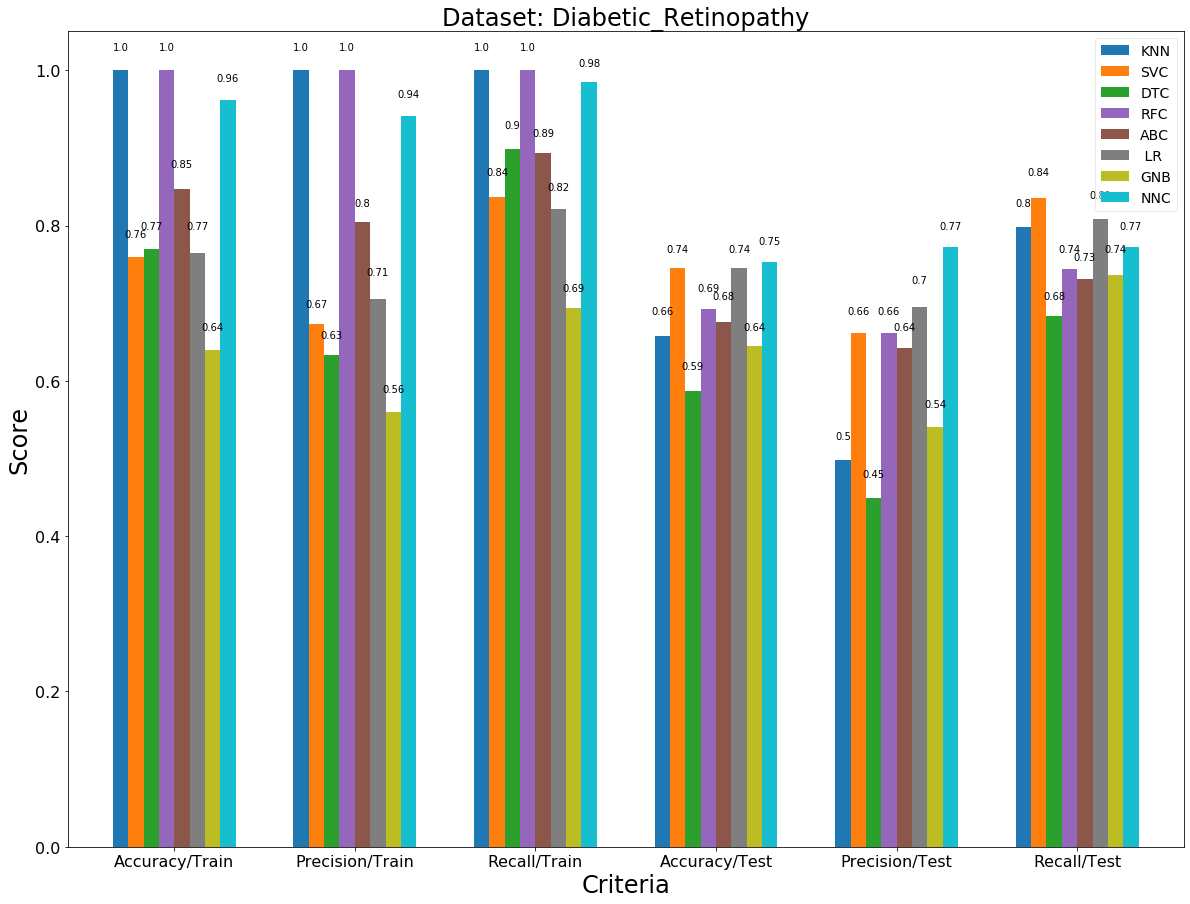

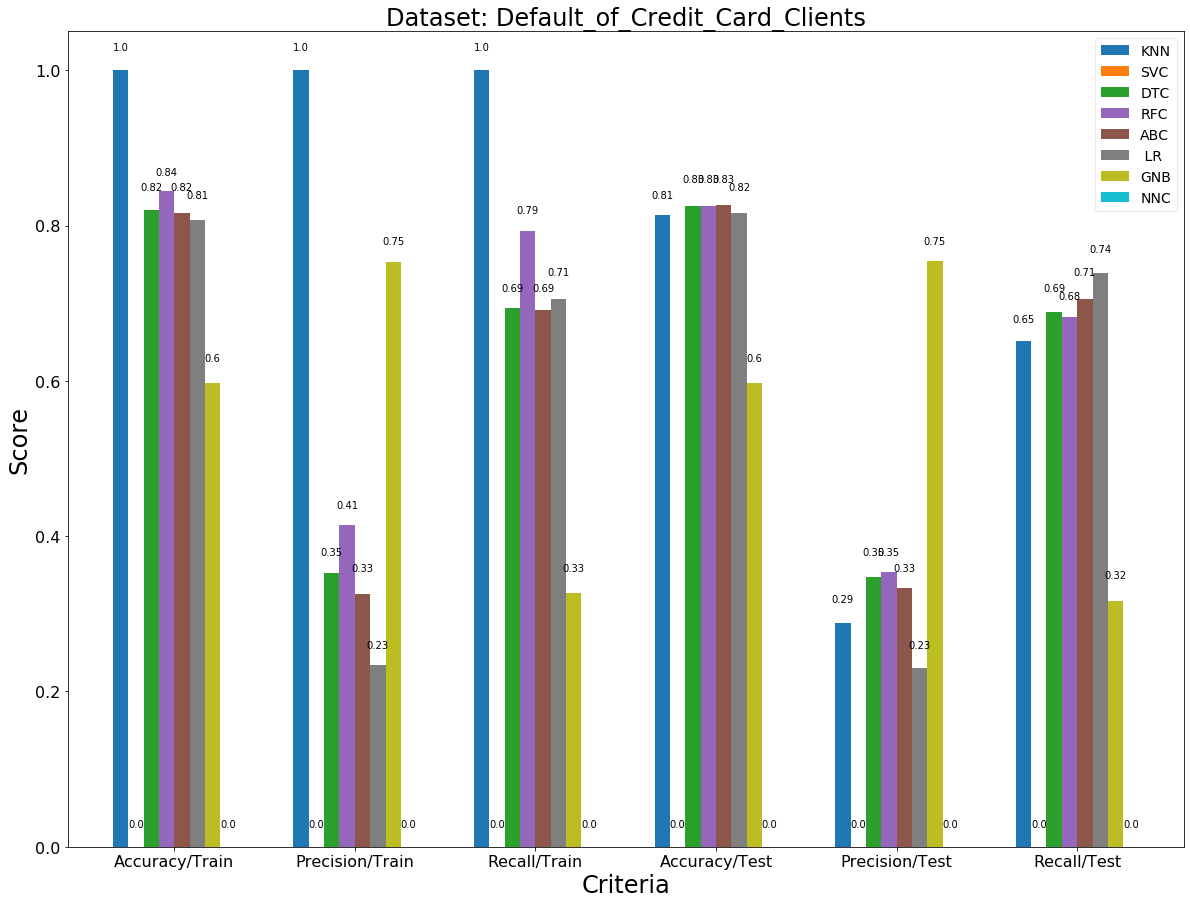

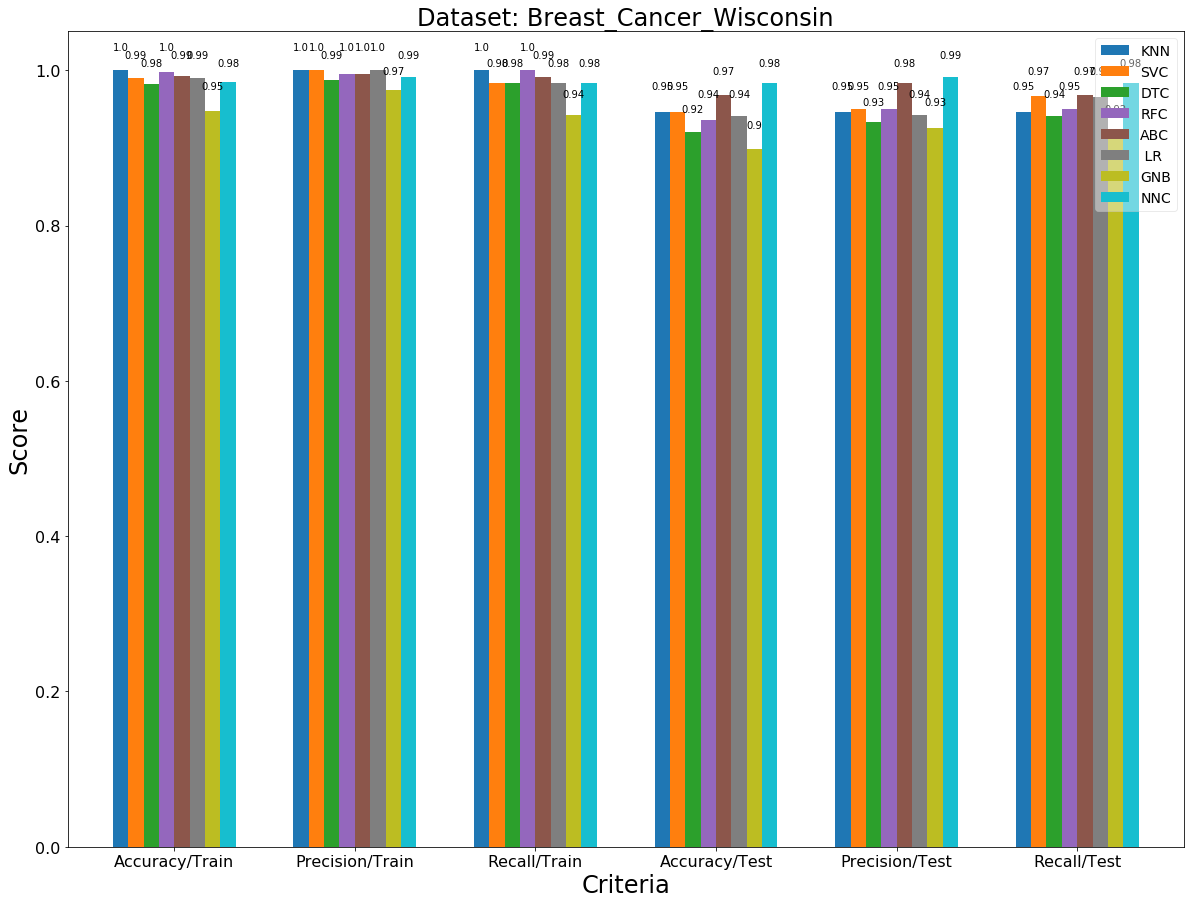

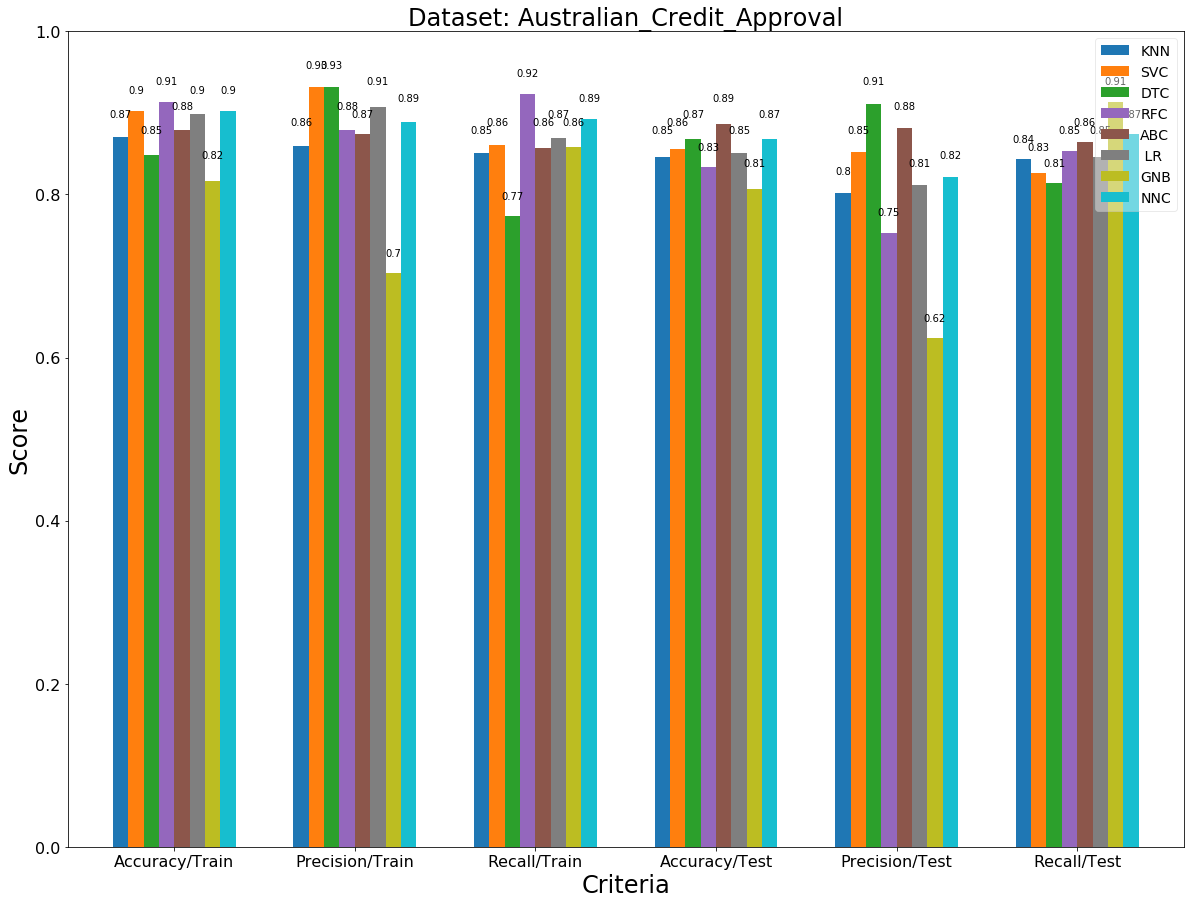

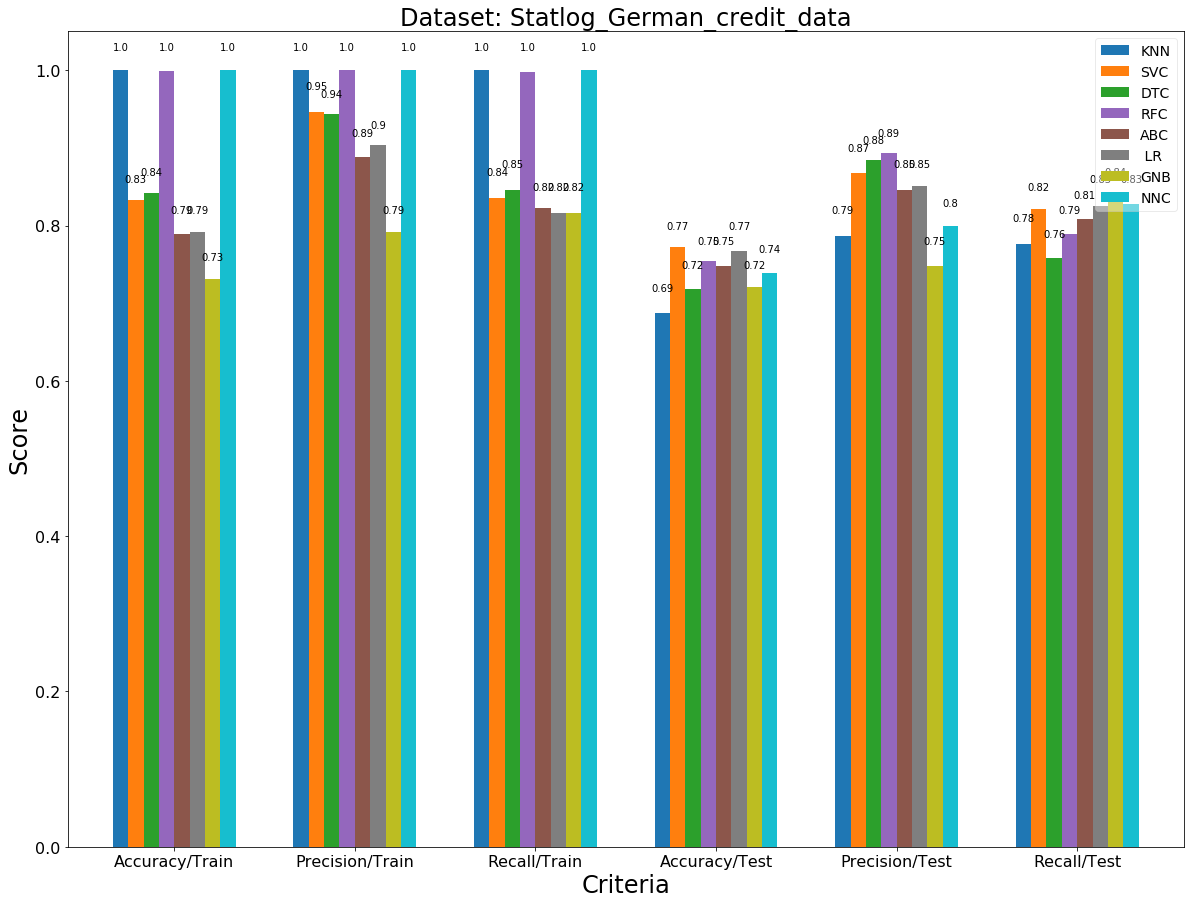

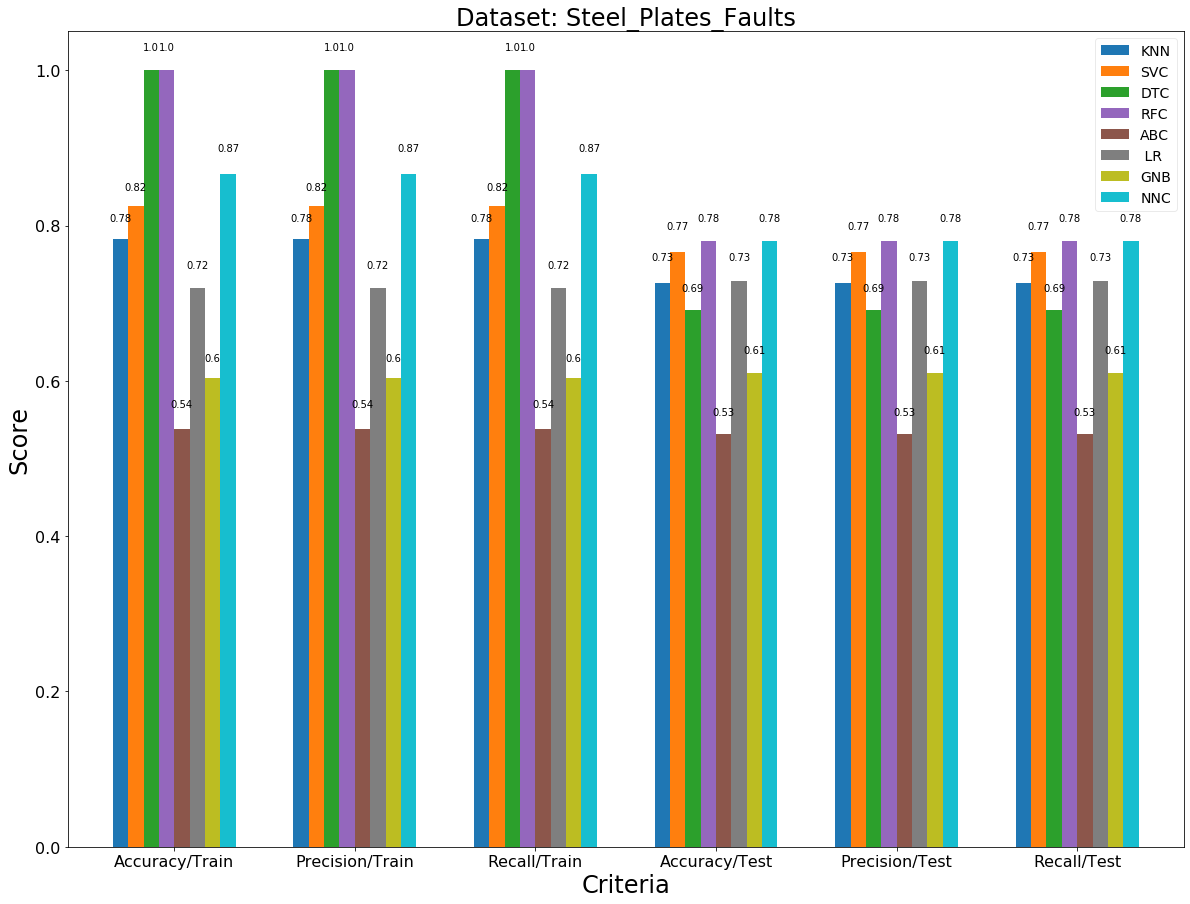

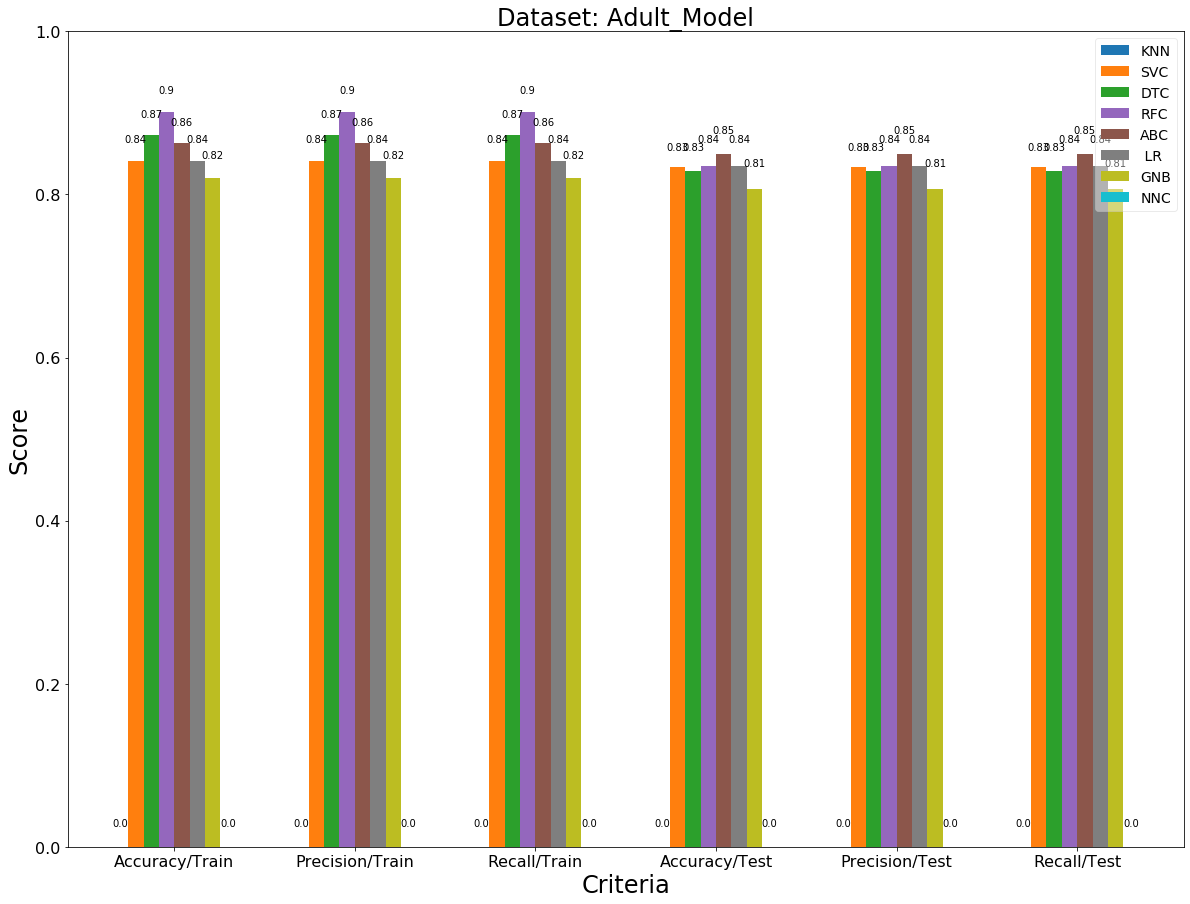

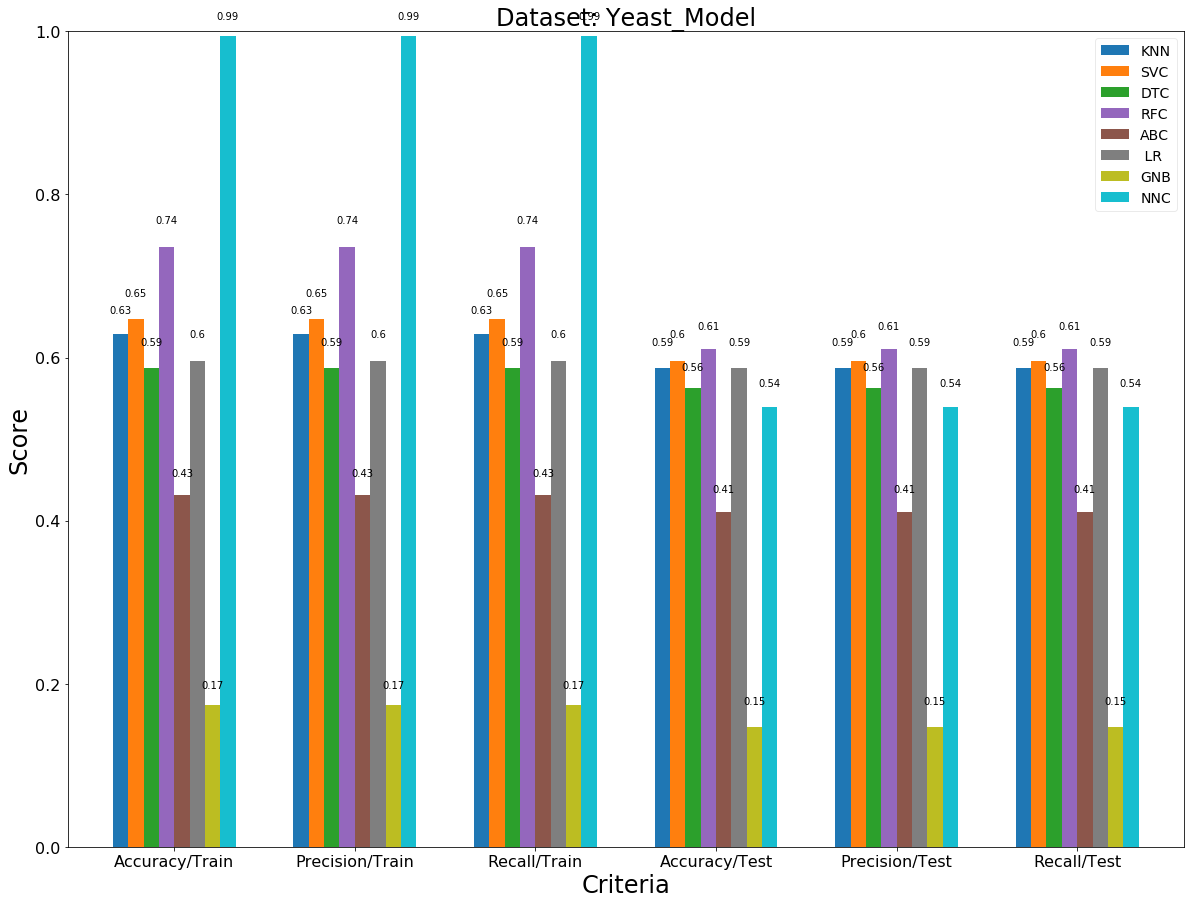

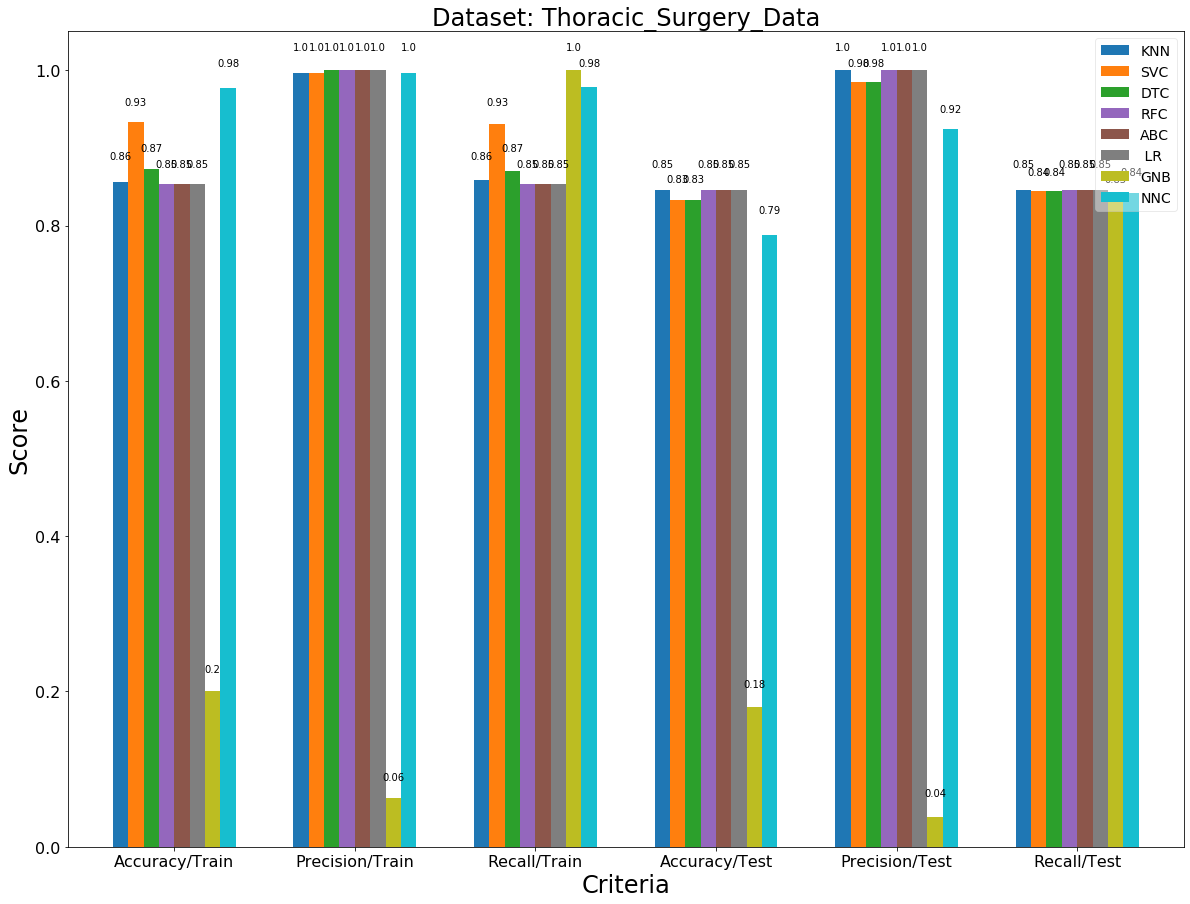

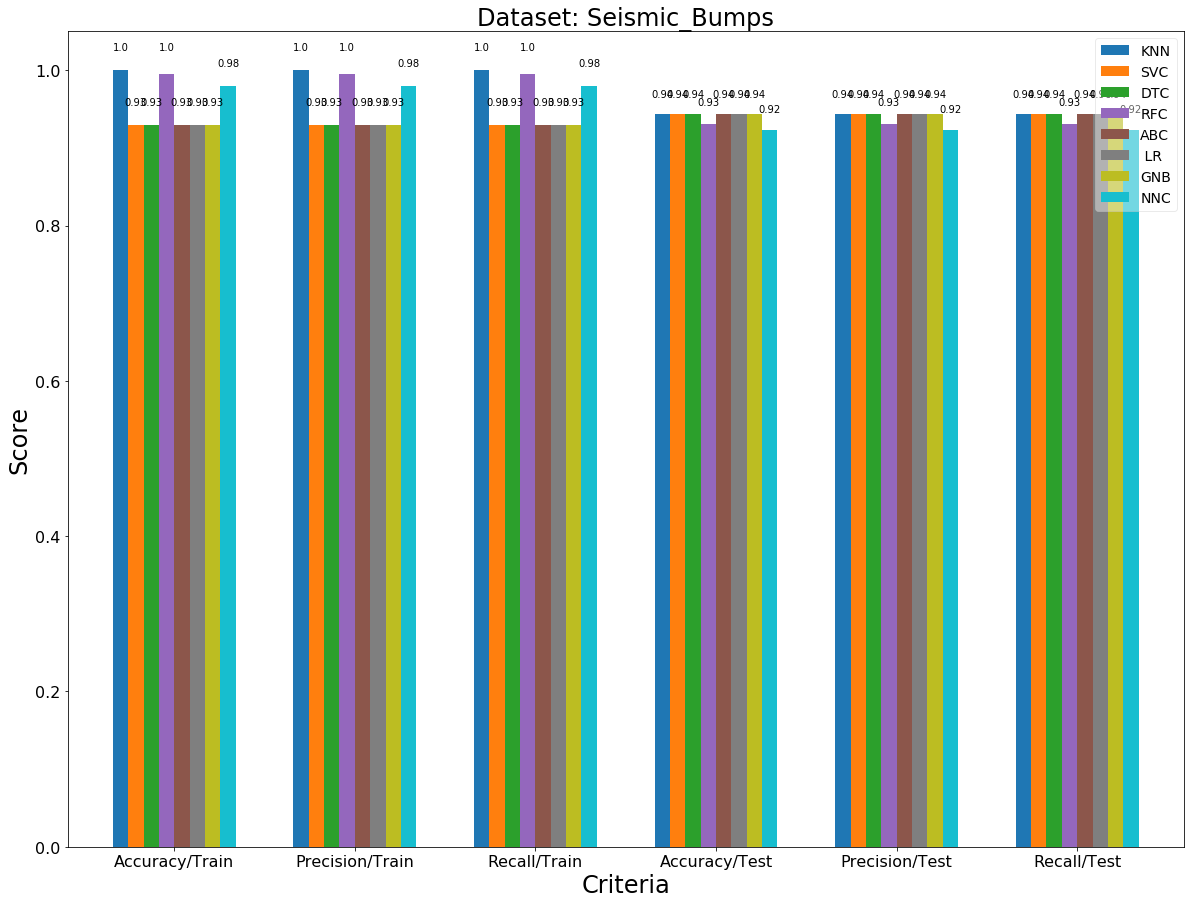

In [16]:
for dataset_name,score in rs_classification.items():
    df = gen_rs(score,index_classification,classifiers_classification)
    title = str("Dataset: %s" % dataset_name)
    plot_bar(df,title,"Criteria","Score")

### 1.11.3  **Plot Result Histograms by according to classifiers**

In this part, the result will be plotted as histograms according to different classifiers. 

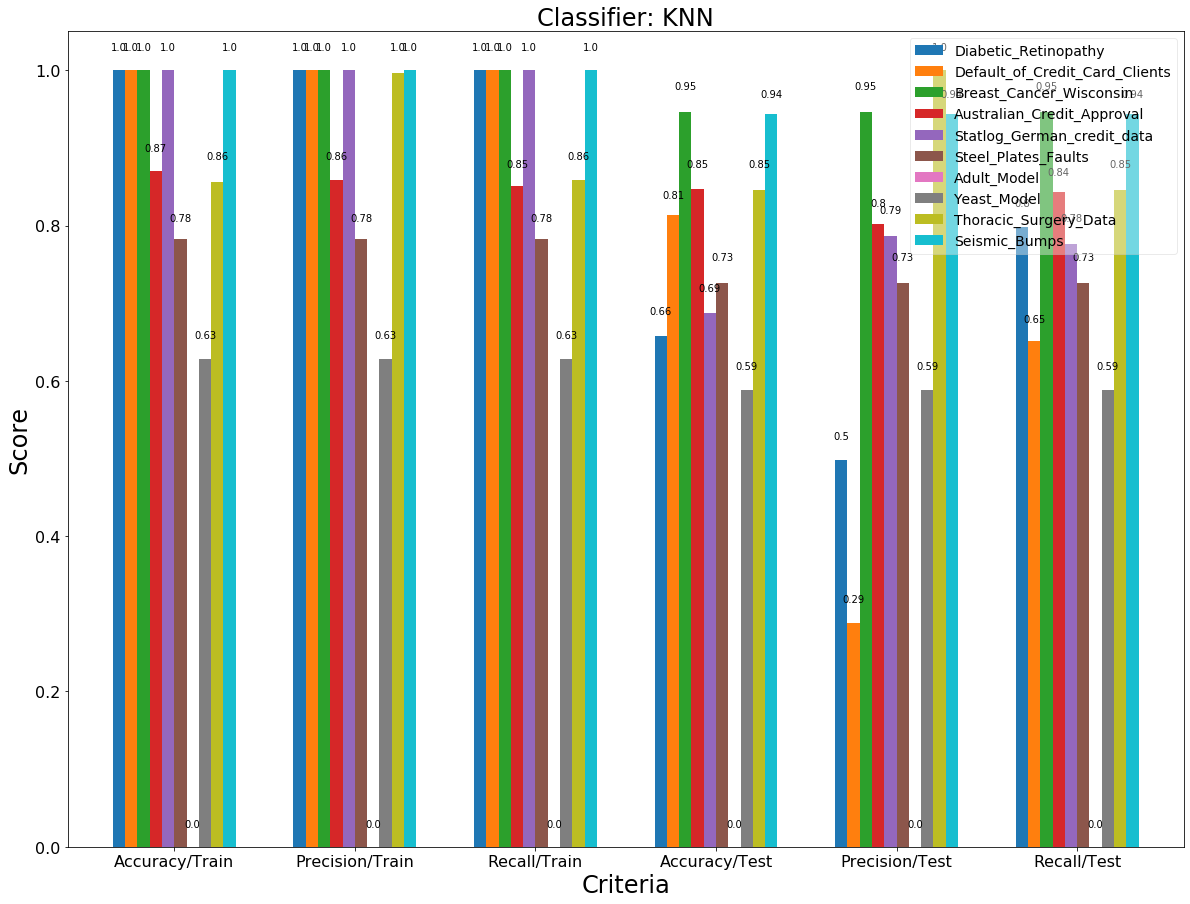

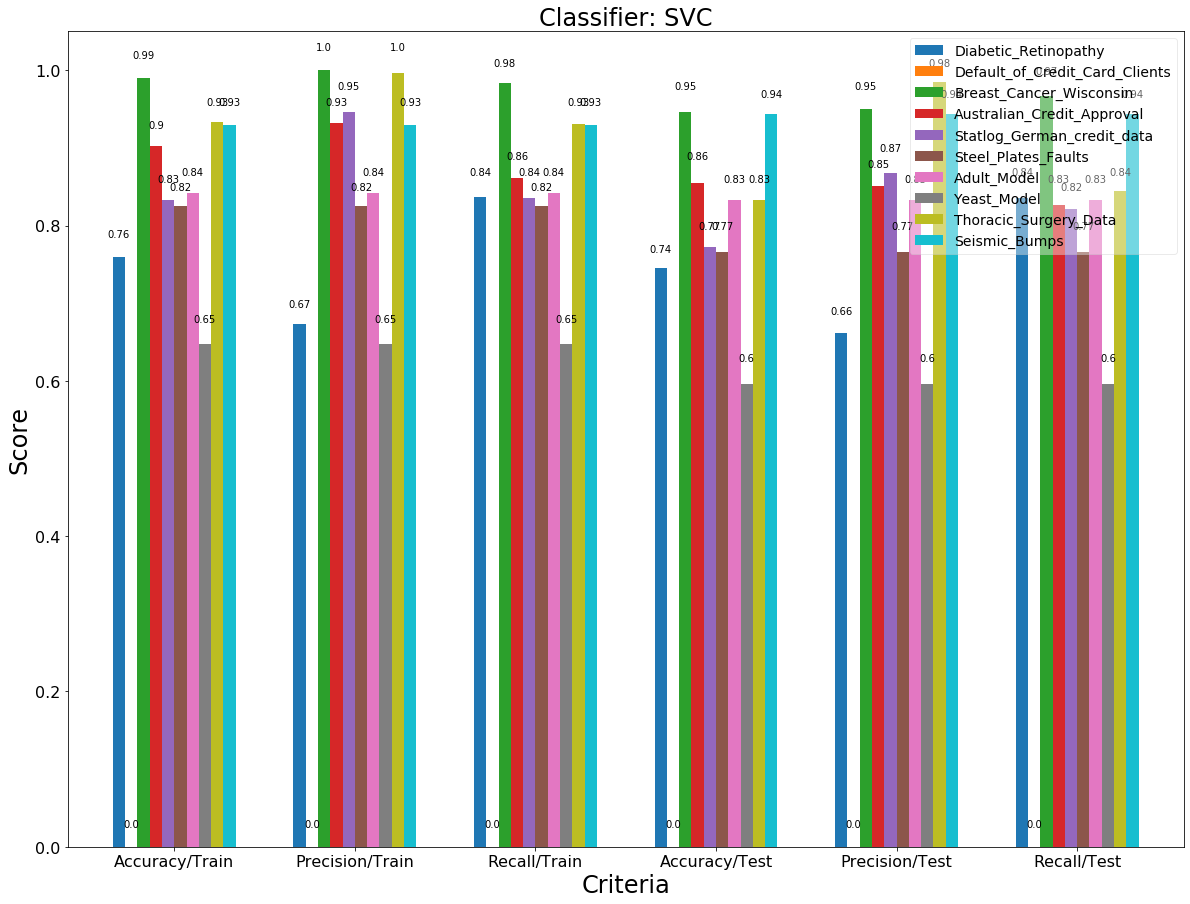

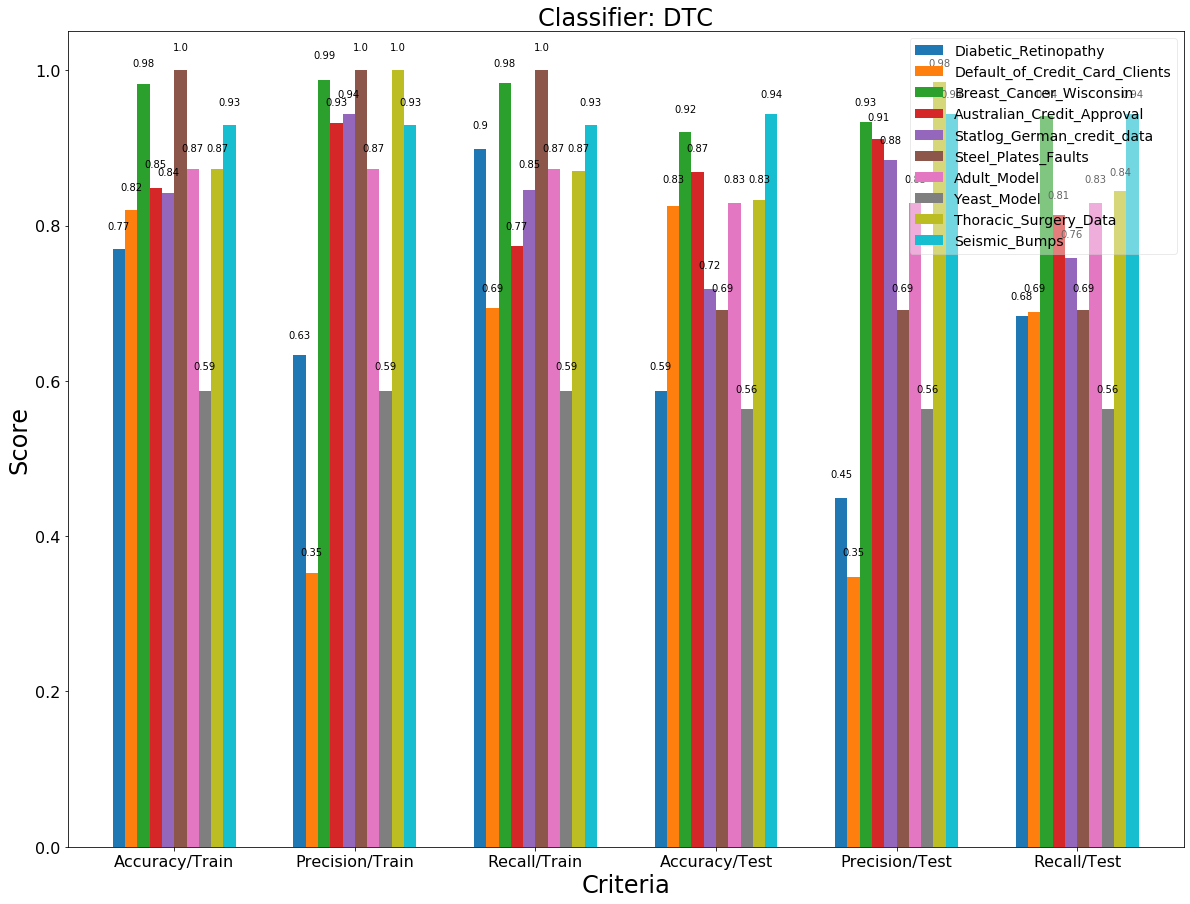

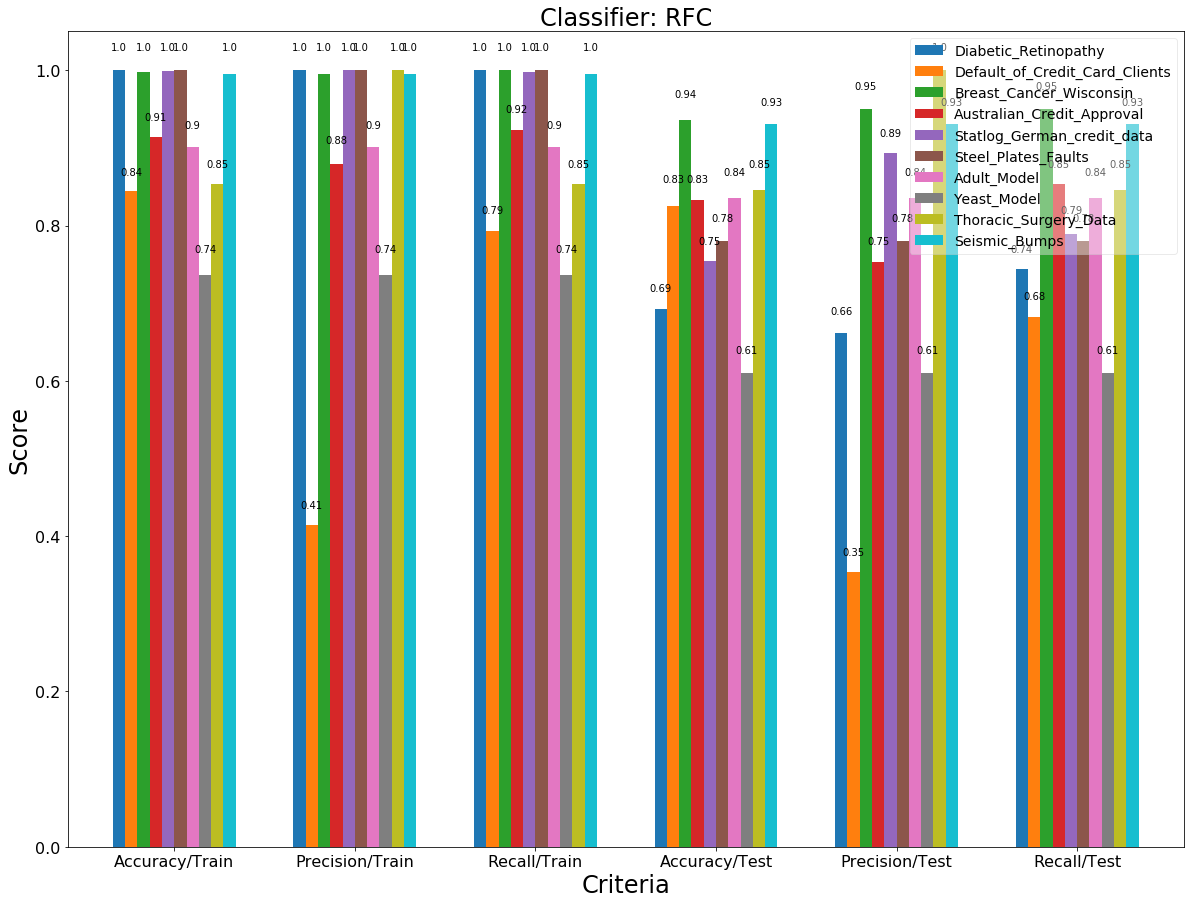

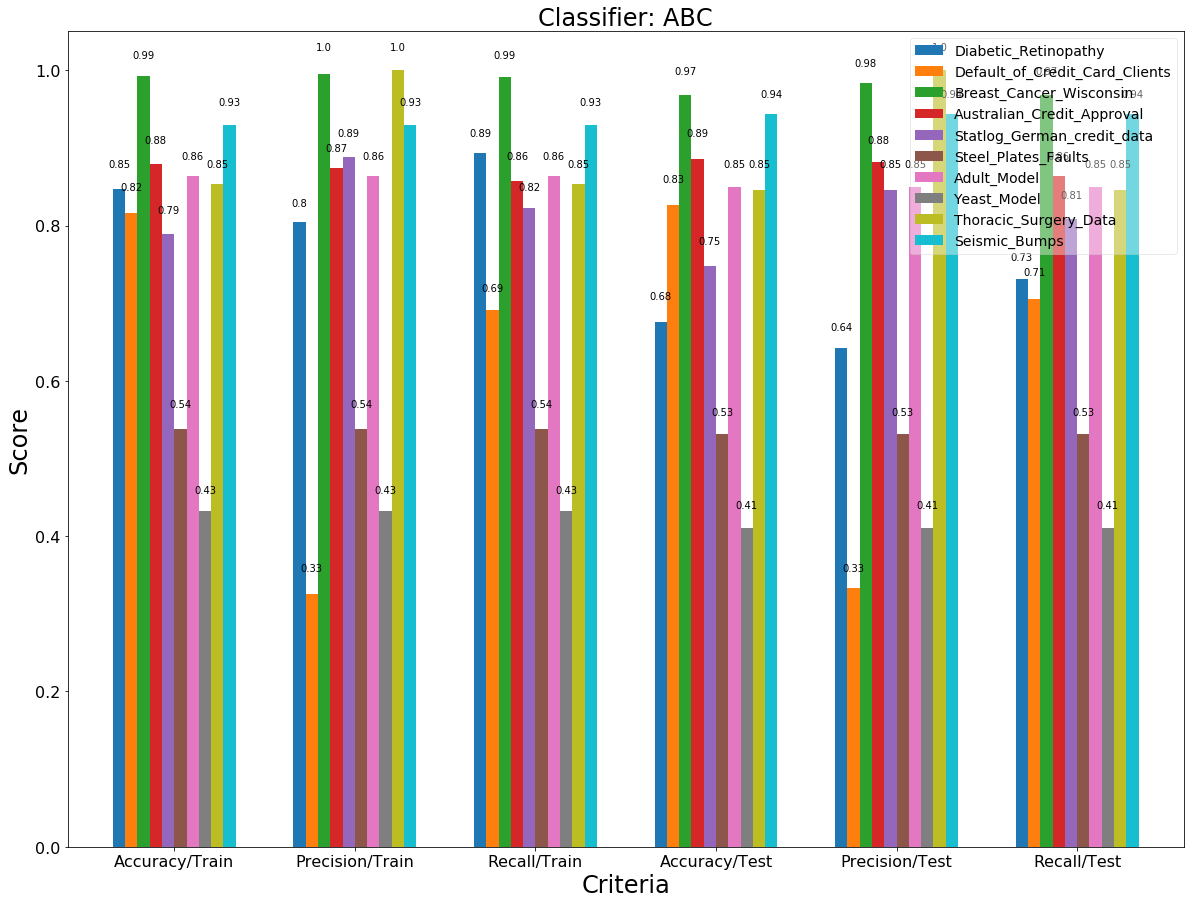

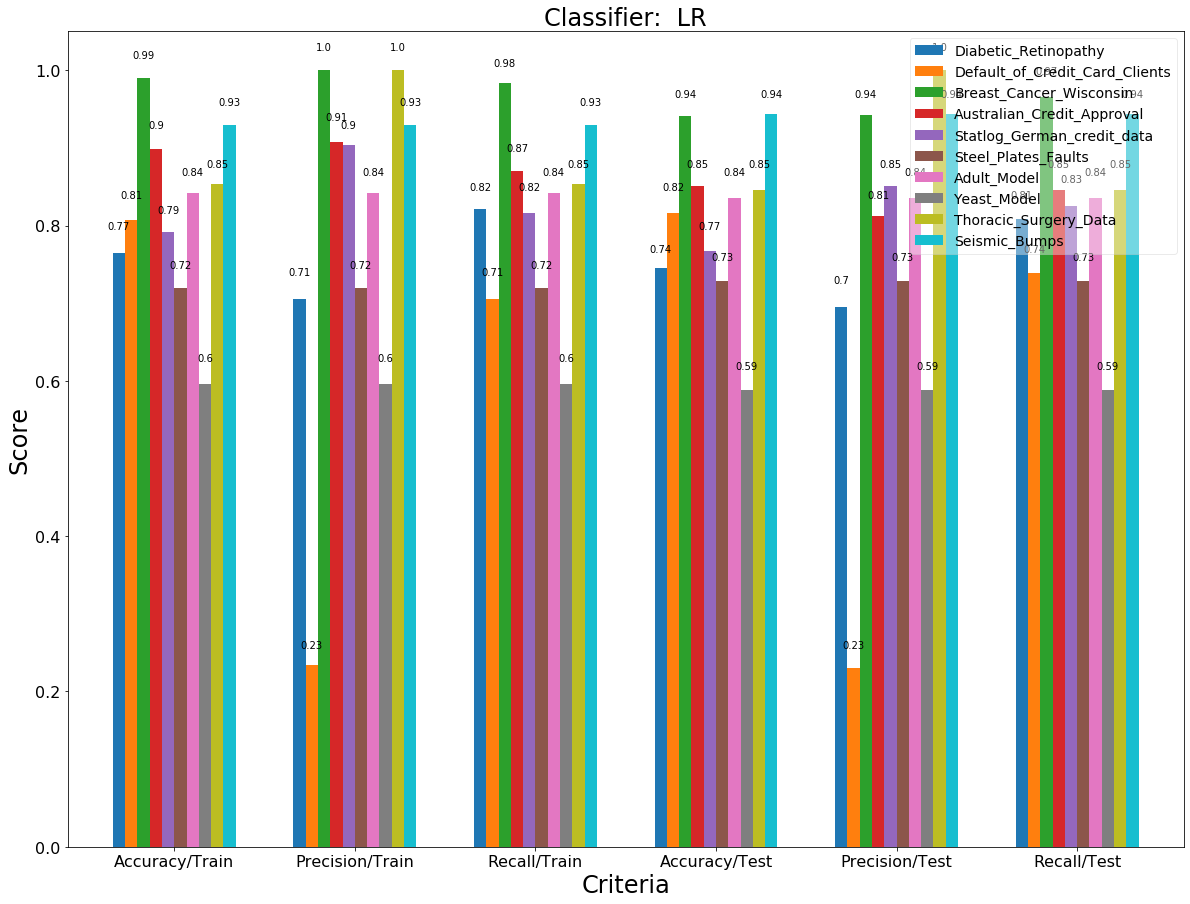

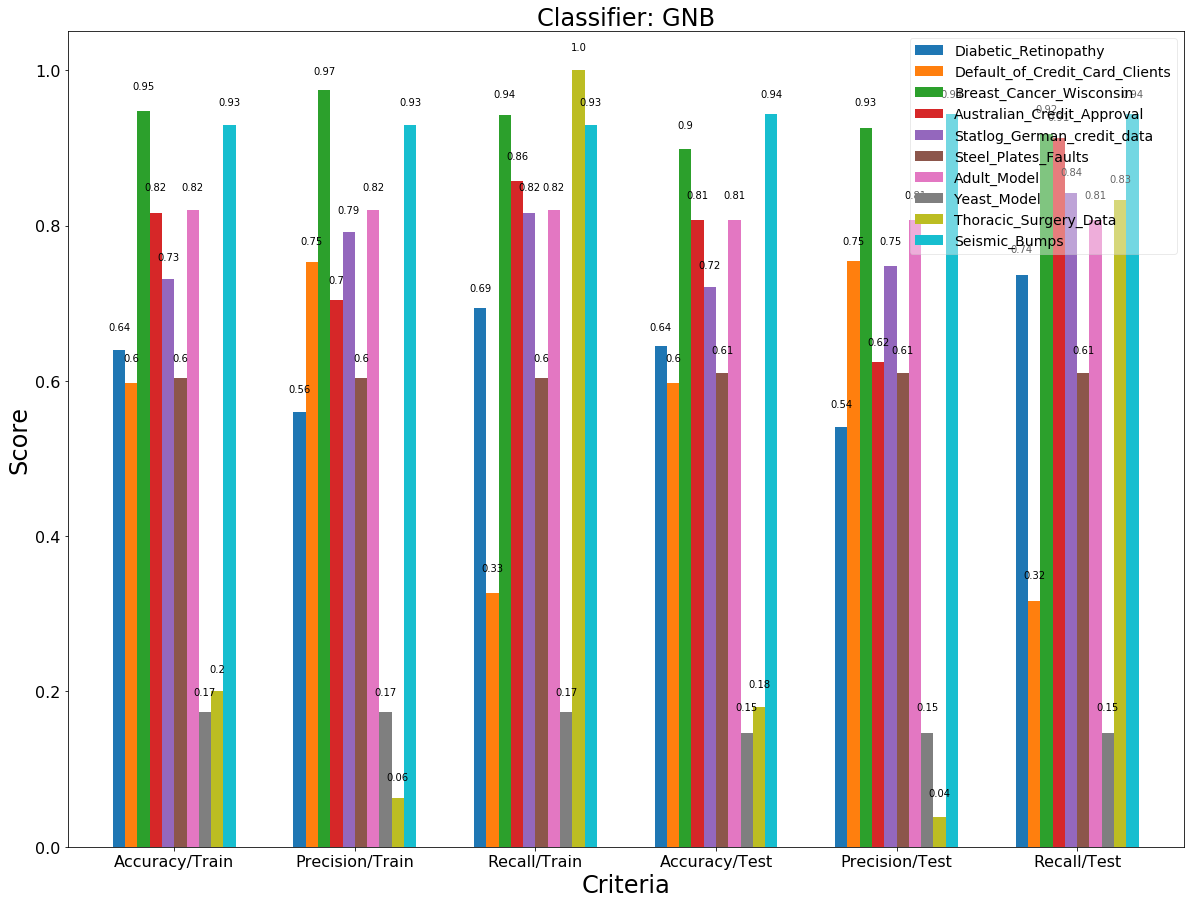

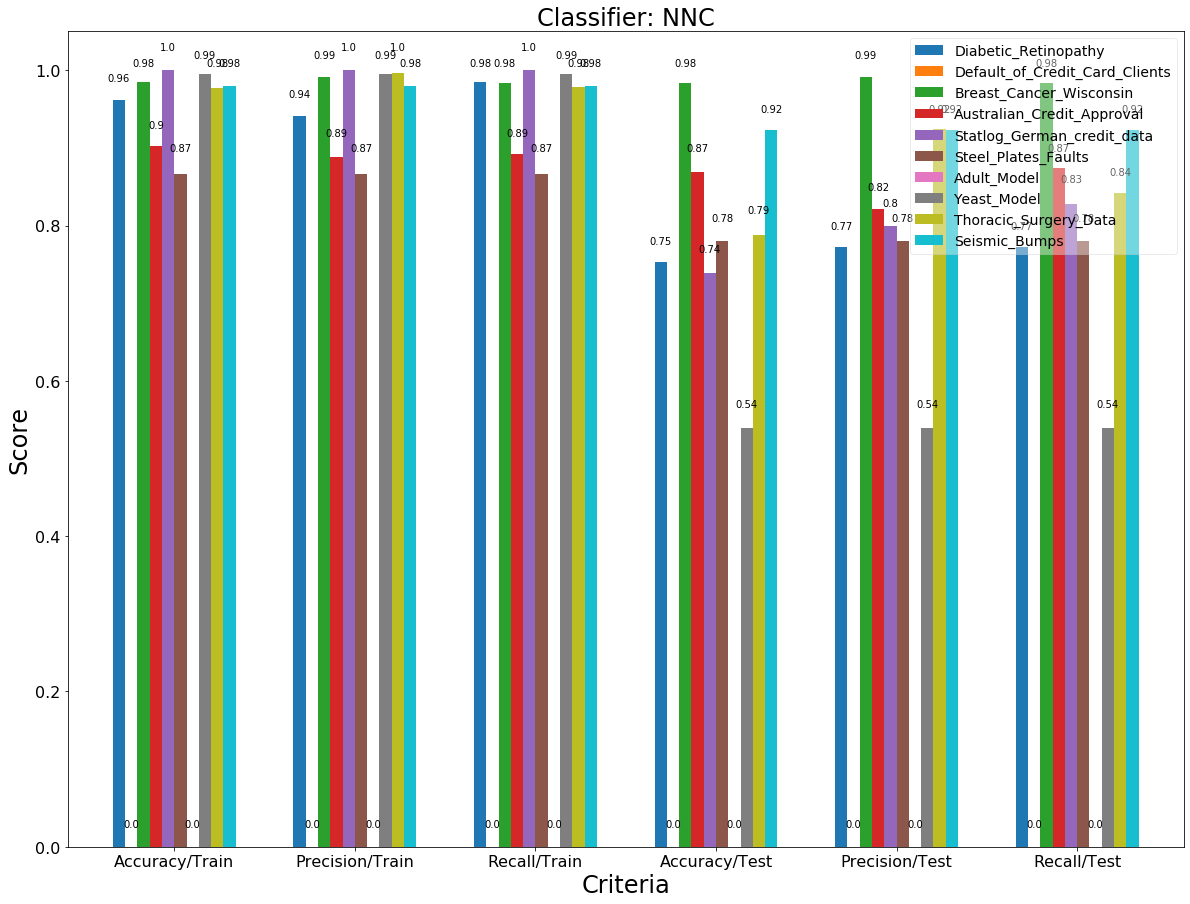

In [17]:
for classifier,classifier_rs in rs_classifiers.items():
    df = gen_rs(classifier_rs,index_classification,data_classification)
    title = str("Classifier: %s" % classifier)
    plot_bar(df,title,"Criteria","Score")

### 1.11.4  **Plot Result Histograms by averaging all Data sets**

In this part, the result will be plotted as histograms according to averaged result.

**run the code below** to show the averaged result table and hisograms.

,Accuracy/Train,Precision/Train,Recall/Train,Accuracy/Test,Precision/Test,Recall/Test
KNN,0.904,0.918,0.902,0.784,0.731,0.791
SVC,0.851,0.866,0.854,0.810,0.828,0.826
DTC,0.853,0.824,0.846,0.778,0.754,0.776
RFC,0.924,0.892,0.920,0.804,0.777,0.802
ABC,0.794,0.765,0.787,0.769,0.742,0.766
LR,0.819,0.784,0.814,0.806,0.763,0.813
GNB,0.646,0.637,0.716,0.636,0.614,0.707
NNC,0.958,0.957,0.960,0.797,0.819,0.818


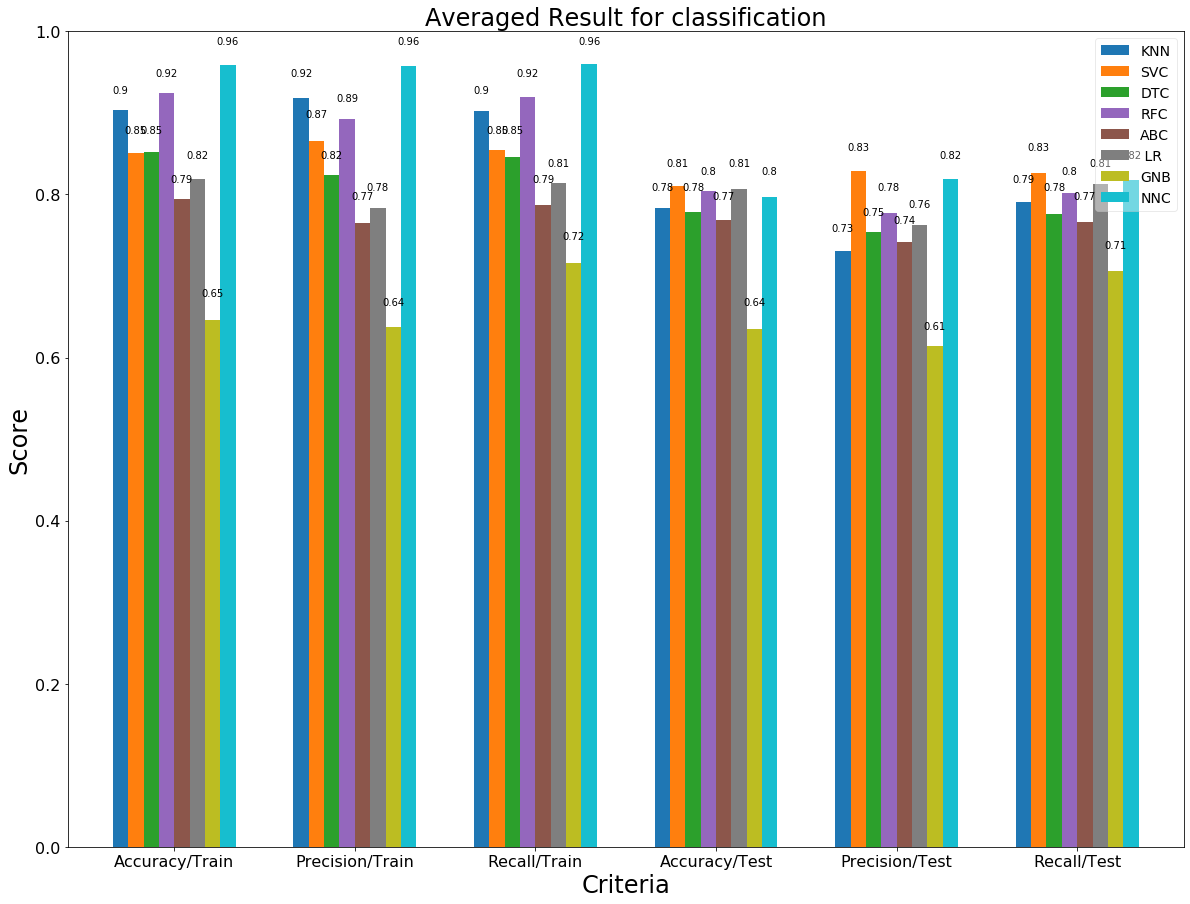

In [18]:
rs_avg = np.zeros((8,6))
den = rs_avg + 10
for classifier,classifier_rs in rs_classification.items():
    classifier_rs[classifier_rs ==None] = 0.0
    den[classifier_rs == 0.0] = den[classifier_rs == 0.0] - 1
    classifier_rs = classifier_rs.astype(np.float)
    rs_avg = rs_avg  +  classifier_rs
df_avg = gen_rs(rs_avg/den,index_classification,classifiers_classification)
title = str("Averaged Result for classification")
plot_table(df_avg)
plot_bar(df_avg,title,"Criteria","Score")

**run the code below** to generate the table and hitgrams to show the score reduction ratio.

Averaged Result Reduction Ratio for classification


,Accuracy,Precision,Recall
KNN,0.133,0.204,0.123
SVC,0.048,0.043,0.033
DTC,0.087,0.085,0.083
RFC,0.129,0.129,0.128
ABC,0.032,0.030,0.027
LR,0.016,0.027,0.001
GNB,0.016,0.037,0.013
NNC,0.168,0.144,0.148


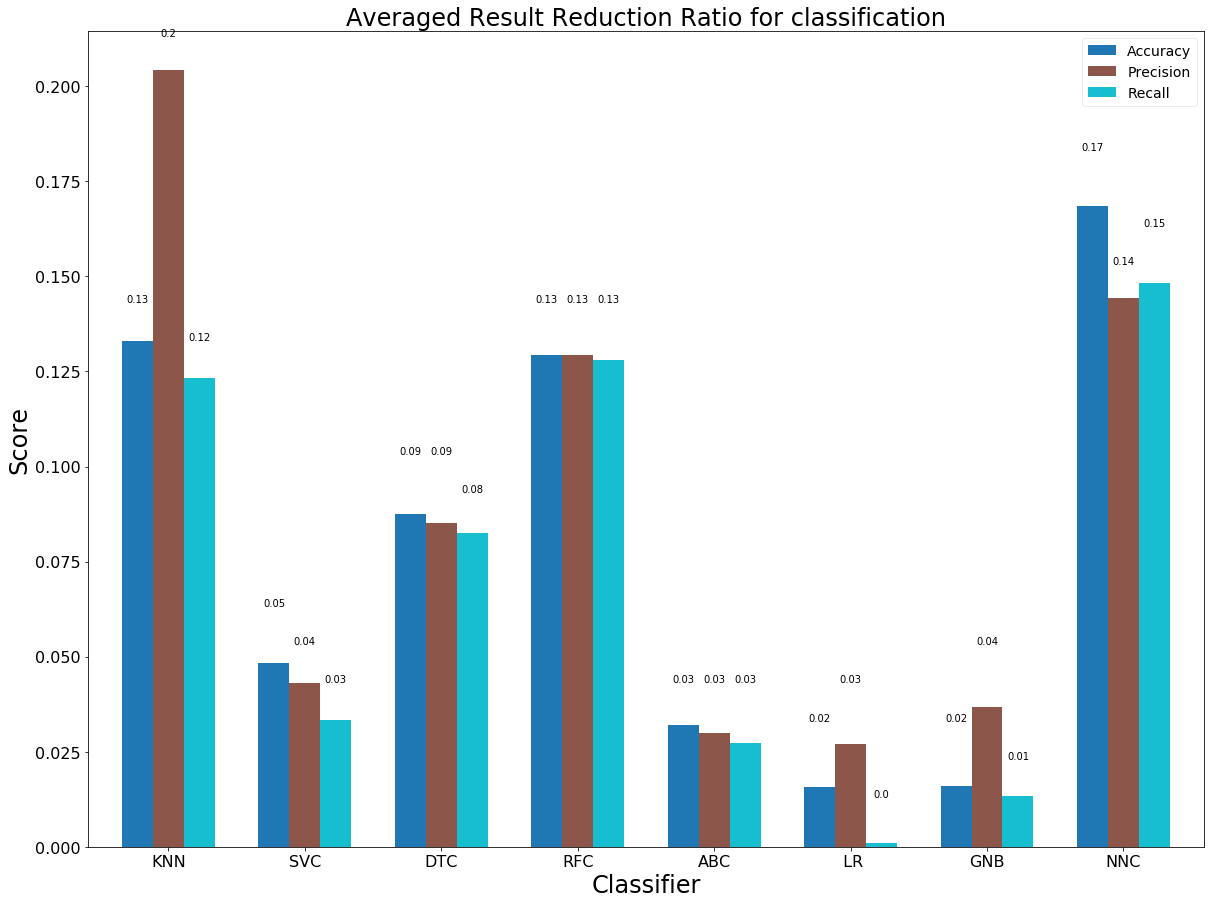

In [19]:
rs_avg_dif = ((rs_avg/den)[:,:3] - (rs_avg/den)[:,3:])/(rs_avg/den)[:,:3] 
df_avg_dif = gen_rs(rs_avg_dif,["Accuracy","Precision","Recall"],classifiers_classification)
title = str("Averaged Result Reduction Ratio for classification")
print(title)
plot_table(df_avg_dif)
plot_bar(df_avg_dif.T,title,"Classifier","Score",True)

# 2. Regression

\*means that there are special situation for this particular data set, and the specific illustration are list just below the subtitle.

## 2.1 Dataset: *Wine_Quality* (Regression 1)
**run the code** below to train the models and get the results.

In [20]:
from models.regression.Wine_Quality import Wine_quality

wq = Wine_quality()
rs_wq_1 = train_regression(wq)
rs_regression["Wine_Quality"] = rs_wq_1

## 2.2 Dataset: *Communities_and_Crime* (Regression 2)
**run the code** below to train the models and get the results.

In [21]:
from models.regression.Communities_and_Crime import Communities_and_crime

cac = Communities_and_crime()
rs_cac = train_regression(cac)
rs_regression["Communities_and_Crime"] = rs_cac

## 2.3 Dataset: *QSAR_Aquatic_Toxicity* (Regression 3)
**run the code** below to train the models and get the results.

In [22]:
from models.regression.QSAR_Aquatic_Toxicity import QSAR_aquatic_toxicity

qat = QSAR_aquatic_toxicity()
rs_qat = train_regression(qat)
rs_regression["QSAR_Aquatic_Toxicity"] = rs_qat

## 2.4 Dataset: *Parkinson_Speech* (Regression 4)
**run the code** below to train the models and get the results.

In [23]:
from models.regression.Parkinson_Speech import Parkinson_speech

ps = Parkinson_speech()
rs_ps = train_regression(ps)
rs_regression["Parkinson_Speech"] = rs_ps

## 2.5* Dataset: *Facebook_Metrics* (Regression 5)


*The result for this dataset is super bad. It contains 12 columns of output, the MSE and $R^2$ both performed pretty terrible in this one. We averged the score among all the attributes to output the result just below this ceel.We have tried every effort to make it work. But reality is really cruel. Since the MSE is super high, we decide not to add it to our result comparasion.*

**run the code** below to train the models and get the results.

In [24]:
from models.regression.Facebook_Metrics import Facebook_metrics

fm = Facebook_metrics()
rs_fm = train_regression(fm)
rs_fm = avg_output(rs_fm)

**run the code below** to generate result table and hitgram for this particular data set.

,Training $R^2$,Testing $R^2$
SVR,-0.031,-0.031
DTR,0.014,-0.201
RFR,0.850,-0.947
ABR,0.500,0.500
GPR,0.999,0.999
LLR,0.041,0.041
NNR,0.027,-0.024


,Training MSE,Testing MSE
SVR,1.185857e+09,1.185857e+09
DTR,1.098028e+09,2.720176e+08
RFR,2.076150e+08,4.286018e+08
ABR,3.647435e+08,3.647435e+08
GPR,1.564937e+04,1.564937e+04
LLR,1.100460e+09,1.100460e+09
NNR,1.156757e+09,2.363324e+08


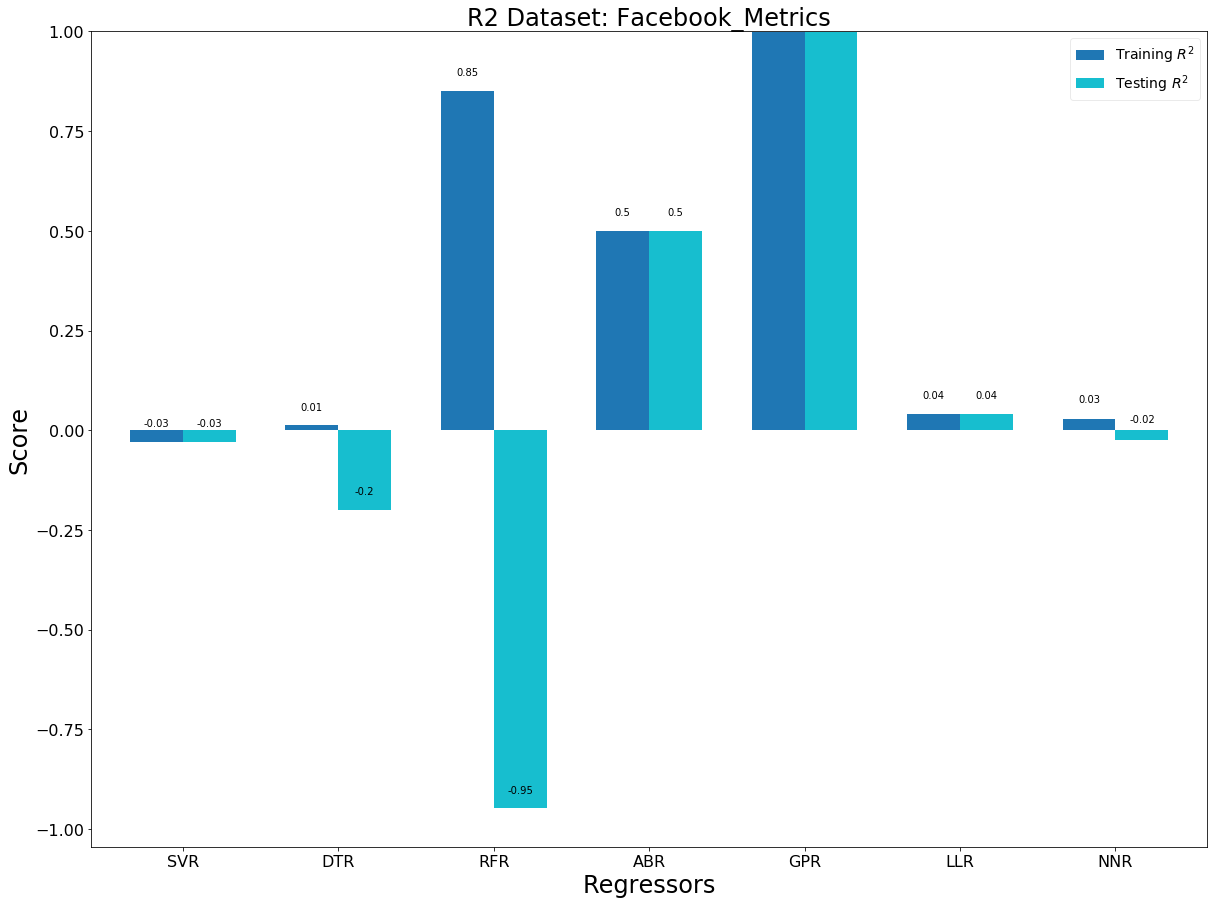

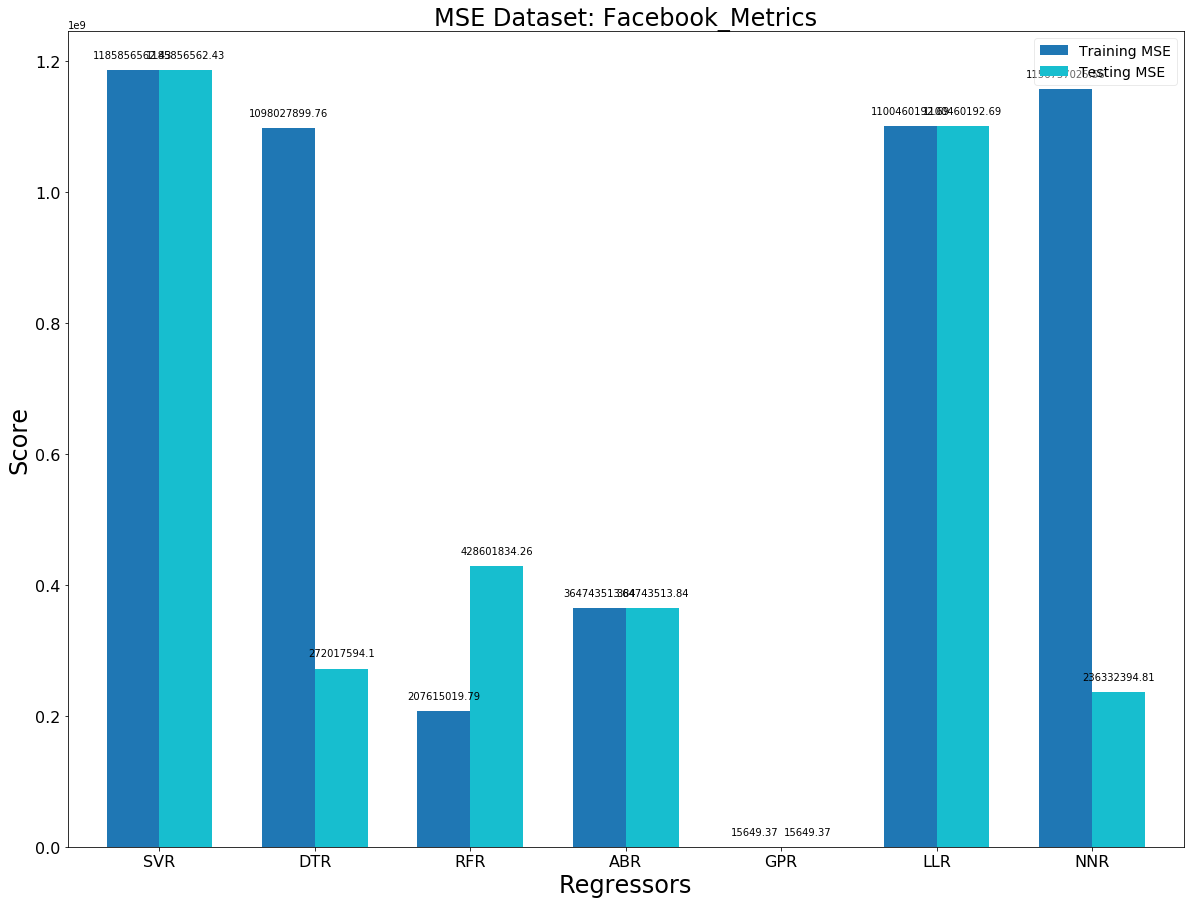

In [25]:
plot_reg_per_data(rs_fm,"Facebook_Metrics")

## 2.6* Dataset: *Bike_Sharing* (Regression 6)

*Because when we tune the models of this data set, we always found that the Gaussian Process Regressor and Adaboost Regressor model can not be trained and return, we decided to sub-sample the data to out put the results.*

**run the code** below to train the models and get the results.

In [26]:
from models.regression.Bike_Sharing import Bike_sharing

bs = Bike_sharing()
rs_bs = train_regression(bs)
rs_regression["Bike_Sharing"] = rs_bs

## 2.7 Dataset: *Student_Performance* (Regression 7)
**run the code** below to train the models and get the results.

In [27]:
from models.regression.Student_Performance import Student_performance

sp = Student_performance()
rs_sp = train_regression(sp)
rs_regression["Student_Performance"] = rs_sp


svr timed out after 300.000000 seconds. We consider it as a failure.


## 2.8 Dataset: *Concrete_Compressive_Strength* (Regression 8)
**run the code** below to train the models and get the results.

In [28]:
from models.regression.Concrete_Compressive_Strength import Concrete_compressive_strength

ccs = Concrete_compressive_strength()
rs_ccs = train_regression(ccs)
rs_regression["Concrete_Compressive_Strength"] = rs_ccs

## 2.9* Dataset: *SGEMM_GPU_Kernel_Performance* (Regression 9)

*Since this data set contains around 29k data instances,which are too big to output result for each regressor in this part. We decided to sub-sample it to 4000 instances by using randomly selecting strategy.
**run the code** below to train the models and get the results.

In [29]:
from models.regression.SGEMM import Sgemm

sgemm = Sgemm()
rs_sgemm = train_regression(sgemm)
rs_sgemm = avg_output(rs_sgemm)
rs_regression["SGEMM"] = rs_sgemm


gpr timed out after 300.000000 seconds. We consider it as a failure.


**run the code below** to generate result table and hitgram for this particular data set.

,Training $R^2$,Testing $R^2$
SVR,0.998,0.988
DTR,1.000,0.995
RFR,0.999,0.996
ABR,0.798,0.797
GPR,NaN,NaN
LLR,0.789,0.787
NNR,0.984,0.981


,Training MSE,Testing MSE
SVR,1.646,8.714
DTR,0.009,3.860
RFR,0.527,3.221
ABR,146.249,148.898
GPR,NaN,NaN
LLR,153.118,156.480
NNR,11.731,14.002


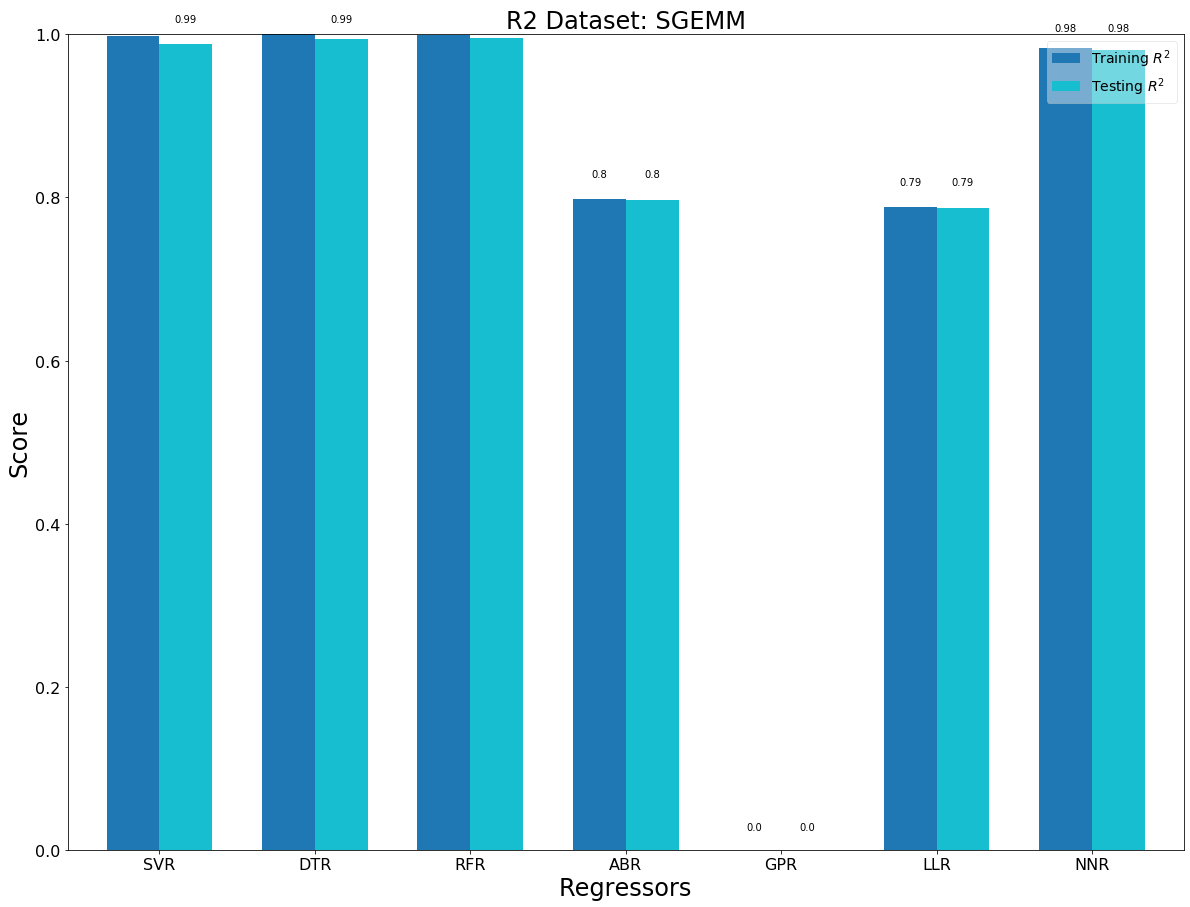

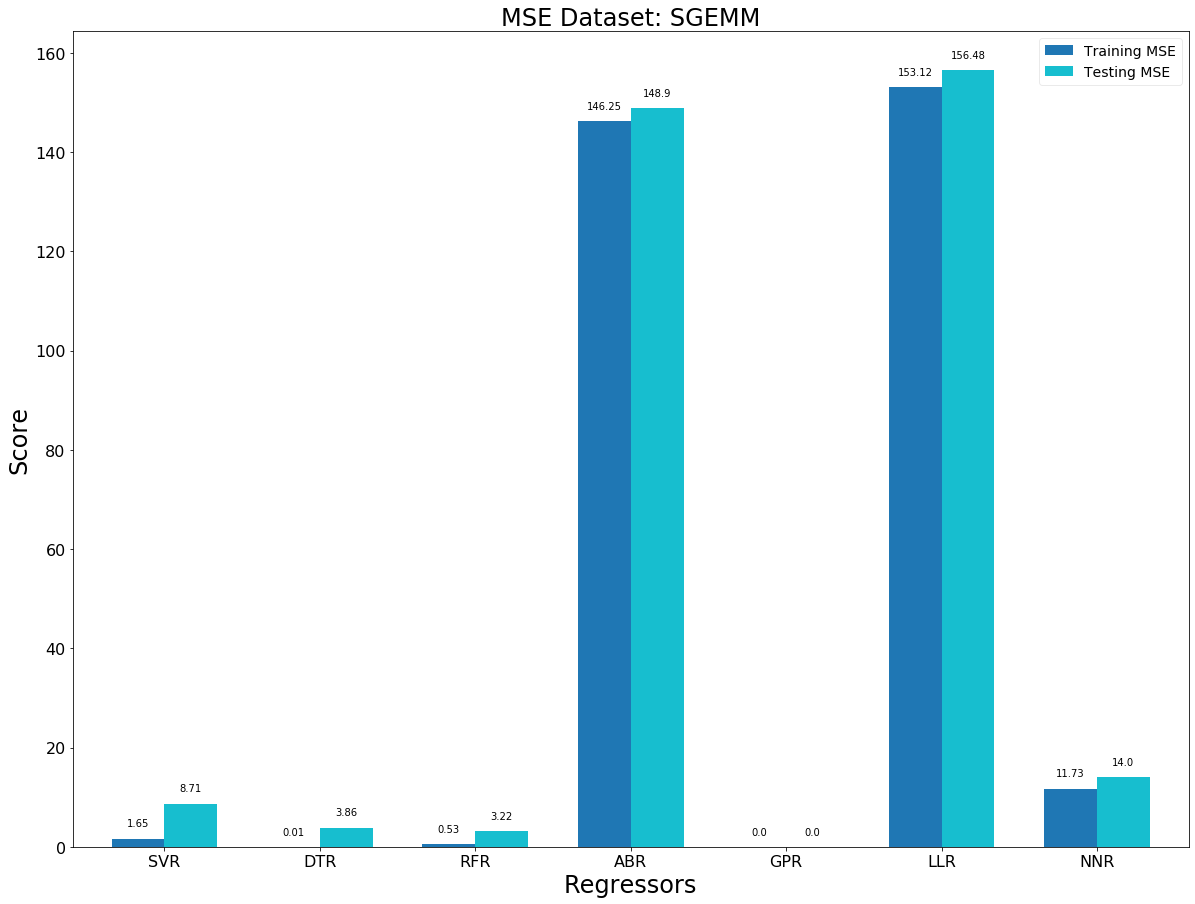

In [30]:
plot_reg_per_data(rs_sgemm,"SGEMM")

## 2.10* Dataset: *Merck_Molecular_Activity_Challenge* (Regression 10) 

Since the the processing time for this data is pretty slow, we randomly sub-sampled 2000 instense of the data to training for both this part and **Novelty** part.

**run the code** below to train the models and get the results.

In [31]:
from models.regression.Merck_Molecular import Merck_molecular

mm1 = Merck_molecular(1)
mm2 = Merck_molecular(2)
rs_mm1 = train_regression(mm1,shape = (7,2))
rs_mm1[rs_mm1 == None] = 0.0
rs_mm2 = train_regression(mm2,shape = (7,2))
rs_mm2[rs_mm1 == None] = 0.0
rs_mm = (rs_mm1+rs_mm2)/2

\*The Merck challenge from kaggle are formed by two datasets *ACT2* and *ACT4* by using a different evaluation matrix which is the __average of squared pearson correlation__ between predictions __$\bar y$__ and __$yi$__.


<center>$R^2 = \frac{1}{2}\sum_{s=1}^{2} r^2_s$</center>

where:

<center>$r^2_s =\frac{ [\sum_{i=1}^{N_s} (x_i-\bar x)(y_i-\bar y) ]^2}{ \sum_{i=1}^{N_s} (x_i-\bar x)^2 \sum_{i=1}^{N_s}(y_i-\bar y)^2  }$</center>

Here, we are going to print the result table according to the average of squared __pearson correlation__ instead of __*MSE*__ (Mean Squared Error) or __*$R^2$*__.

The result table and histograms will be showed below if you excute the code as follow:

,Training correlation $R^2$,Testing correlation $R^2$
SVR,0.705,0.569
DTR,0.602,0.429
RFR,0.948,0.609
ABR,0.573,0.511
GPR,0.763,0.616
LLR,0.634,0.559
NNR,0.907,0.361


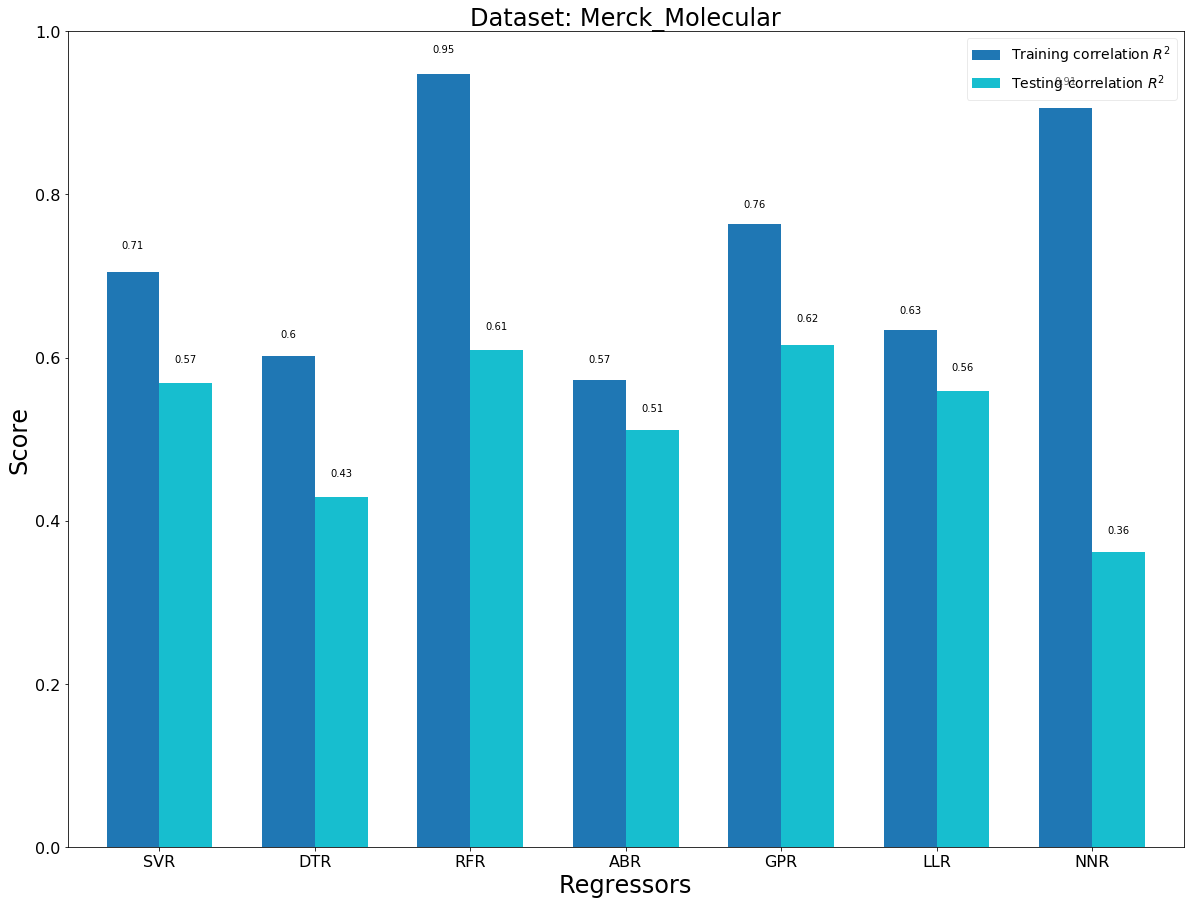

In [32]:
df_mm = gen_rs(rs_mm,["Training correlation $R^2$" ,"Testing correlation $R^2$" ],regressors_regression)
df_mm.round(3)
plot_table(df_mm)
title = str("Dataset: Merck_Molecular")
plot_bar(df_mm.T,title,"Regressors","Score")

## 2.11 Result Comparasion

In this part, the result can be output in three different ways:

* Print result tables
* Plot Result Histograms by according to Data sets
* Plot Result Histograms by according to Classifiers
* Plot Result Histograms by according to test reduction ratio

You can plot the result for the combination of datasets object you generated before.

**Run the code below** to generate nessacery pandas objects for plotting convenience.

In [33]:
data_name_regression = []

rs_mse_regressors = {}
rs_r2_regressors = {}


for regressor in regressors_regression:
    rs_mse_regressors[regressor] = [] #initialization of rs_regressors
    rs_r2_regressors[regressor] = [] #initialization of rs_regressors
    
for dataset,score in rs_regression.items():
    data_name_regression.append(dataset)
    for i in range(len(regressors_regression)):
        rs_mse_regressors[regressors_regression[i]].append([score[i,0],score[i,2]])
        rs_r2_regressors[regressors_regression[i]].append([score[i,1],score[i,3]])                                                   
        
for regressor,regressor_rs_mse in rs_mse_regressors.items():
    num_data = len(regressor_rs_mse)
    rs_mse_regressors[regressor] = np.array(regressor_rs_mse).reshape(num_data,2).astype(np.float32)

for regressor,regressor_rs_r2 in rs_r2_regressors.items():
    num_data = len(regressor_rs_r2)
    rs_r2_regressors[regressor] = np.array(regressor_rs_r2).reshape(num_data,2).astype(np.float32)

### 2.11.1 **Print Result Tables**

In this part, the result will be printed as tables according to different datasets. 



In [34]:
for dataset_name,score in rs_regression.items():
    df = gen_rs(score,index_regression,regressors_regression)
    print("Result Table for %s : " % dataset_name)
    plot_table(df)
    print("\n\n\n")

Result Table for Wine_Quality : 


,MSE/Train,$R^2$/Train,MSE/Test,$R^2$/Test
SVR,0.303,0.612,0.441,0.393
DTR,0.406,0.480,0.544,0.251
RFR,0.052,0.933,0.366,0.495
ABR,0.511,0.345,0.499,0.312
GPR,0.467,0.401,0.462,0.364
LLR,0.554,0.290,0.513,0.293
NNR,0.248,0.682,0.458,0.370






Result Table for Communities_and_Crime : 


,MSE/Train,$R^2$/Train,MSE/Test,$R^2$/Test
SVR,0.009,0.827,0.021,0.602
DTR,0.018,0.668,0.022,0.583
RFR,0.003,0.952,0.019,0.639
ABR,0.017,0.698,0.021,0.607
GPR,0.018,0.675,0.019,0.648
LLR,0.017,0.696,0.019,0.648
NNR,0.005,0.907,0.035,0.343






Result Table for QSAR_Aquatic_Toxicity : 


,MSE/Train,$R^2$/Train,MSE/Test,$R^2$/Test
SVR,0.157,0.946,1.428,0.421
DTR,0.943,0.677,1.882,0.237
RFR,0.274,0.906,1.557,0.368
ABR,1.005,0.656,1.471,0.403
GPR,0.002,0.999,2.279,0.076
LLR,1.494,0.488,1.327,0.462
NNR,1.119,0.616,1.297,0.474






Result Table for Parkinson_Speech : 


,MSE/Train,$R^2$/Train,MSE/Test,$R^2$/Test
SVR,101.850,0.600,245.880,0.006
DTR,209.690,0.177,241.829,0.023
RFR,87.283,0.657,220.379,0.109
ABR,209.856,0.176,238.286,0.037
GPR,0.000,1.000,247.576,-0.001
LLR,219.039,0.140,227.039,0.082
NNR,145.173,0.430,238.766,0.035






Result Table for Bike_Sharing : 


,MSE/Train,$R^2$/Train,MSE/Test,$R^2$/Test
SVR,0.002,1.000,0.002,1.000
DTR,0.000,1.000,102.259,0.997
RFR,5.824,1.000,40.770,0.999
ABR,1019.222,0.971,1025.880,0.965
GPR,0.001,1.000,0.002,1.000
LLR,0.000,1.000,0.000,1.000
NNR,0.076,1.000,0.723,1.000






Result Table for Student_Performance : 


,MSE/Train,$R^2$/Train,MSE/Test,$R^2$/Test
SVR,NaN,NaN,NaN,NaN
DTR,0.914,0.913,3.248,0.682
RFR,0.380,0.964,1.932,0.811
ABR,4.536,0.569,6.658,0.348
GPR,0.000,1.000,10.144,0.007
LLR,1.556,0.852,1.713,0.832
NNR,0.020,0.998,2.598,0.746






Result Table for Concrete_Compressive_Strength : 


,MSE/Train,$R^2$/Train,MSE/Test,$R^2$/Test
SVR,0.002,1.000,0.001,1.000
DTR,0.010,1.000,0.051,1.000
RFR,0.005,1.000,0.044,1.000
ABR,0.641,0.998,0.749,0.997
GPR,0.000,1.000,0.000,1.000
LLR,3.413,0.988,2.882,0.989
NNR,0.049,1.000,0.052,1.000






Result Table for SGEMM : 


,MSE/Train,$R^2$/Train,MSE/Test,$R^2$/Test
SVR,1.646,0.998,8.714,0.988
DTR,0.009,1.000,3.860,0.995
RFR,0.527,0.999,3.221,0.996
ABR,146.249,0.798,148.898,0.797
GPR,NaN,NaN,NaN,NaN
LLR,153.118,0.789,156.480,0.787
NNR,11.731,0.984,14.002,0.981


### 2.11.2  **Plot Result Histograms by according to Data sets**

In this part, the result will be plotted as histograms according to different datasets. 

run the code below which could give you the result histogram of **MSE** fore each regressor

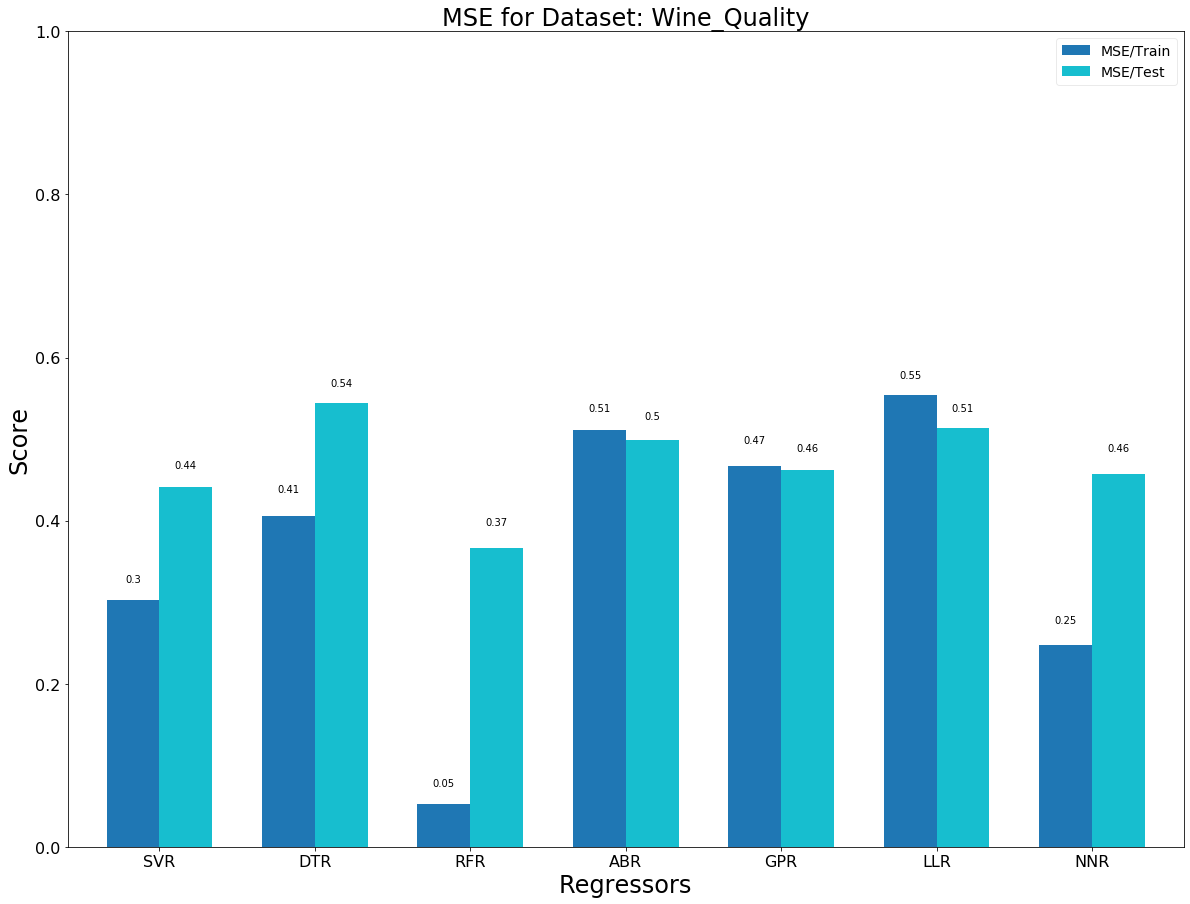

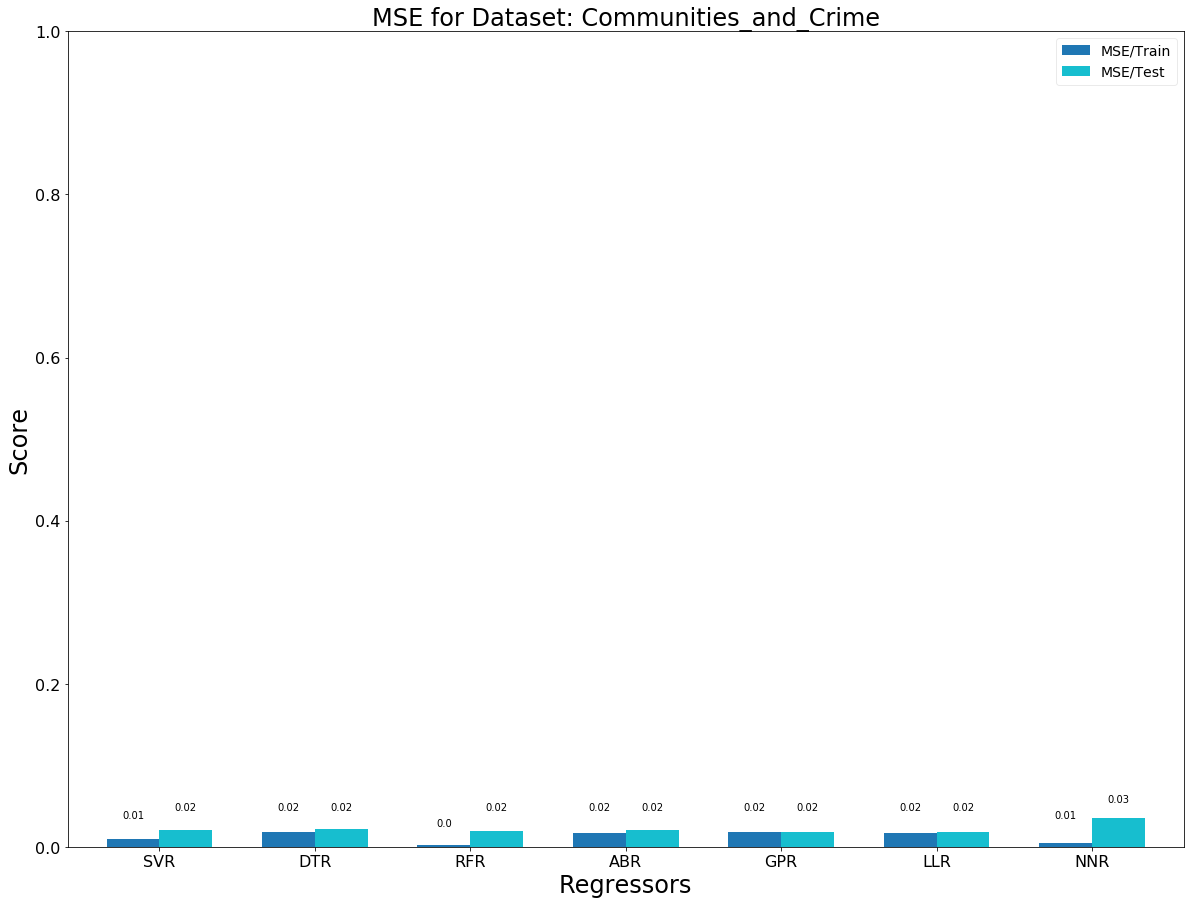

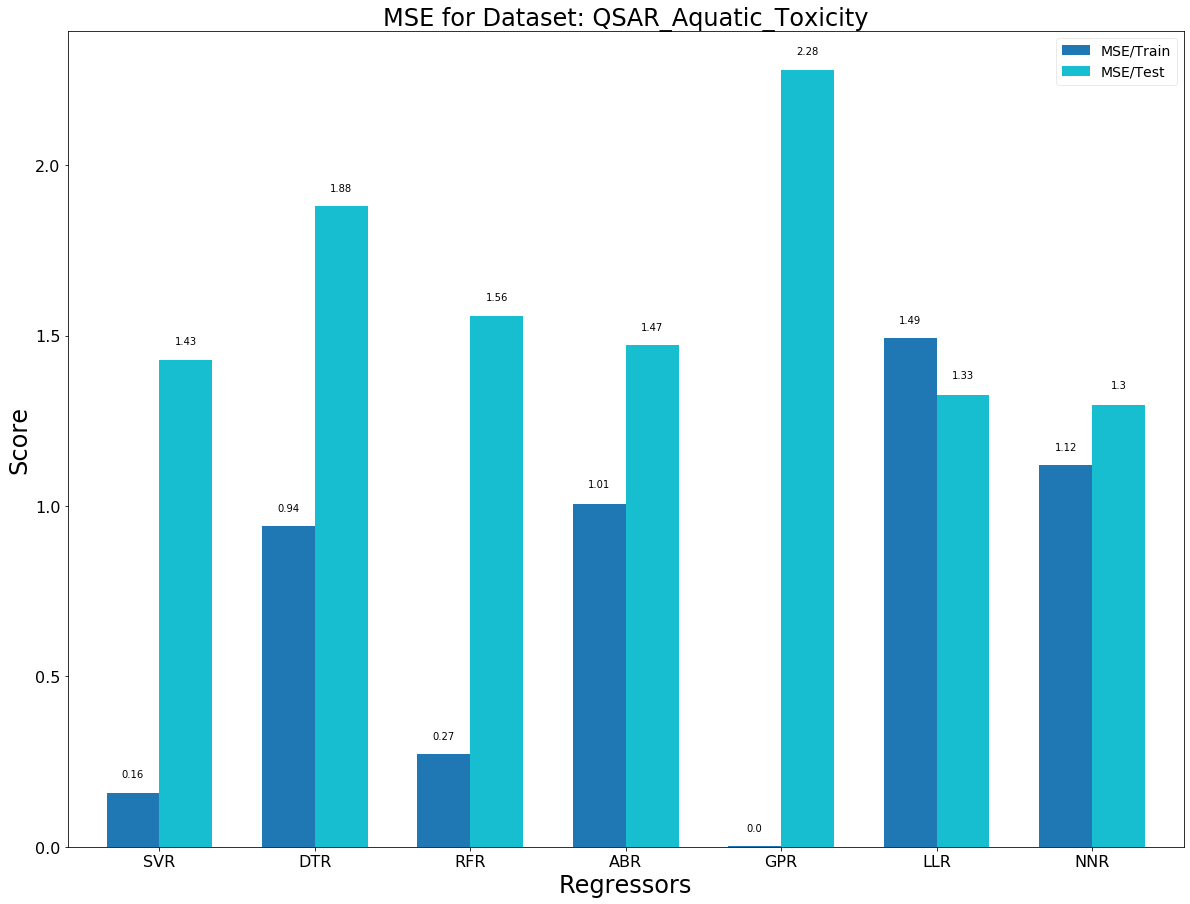

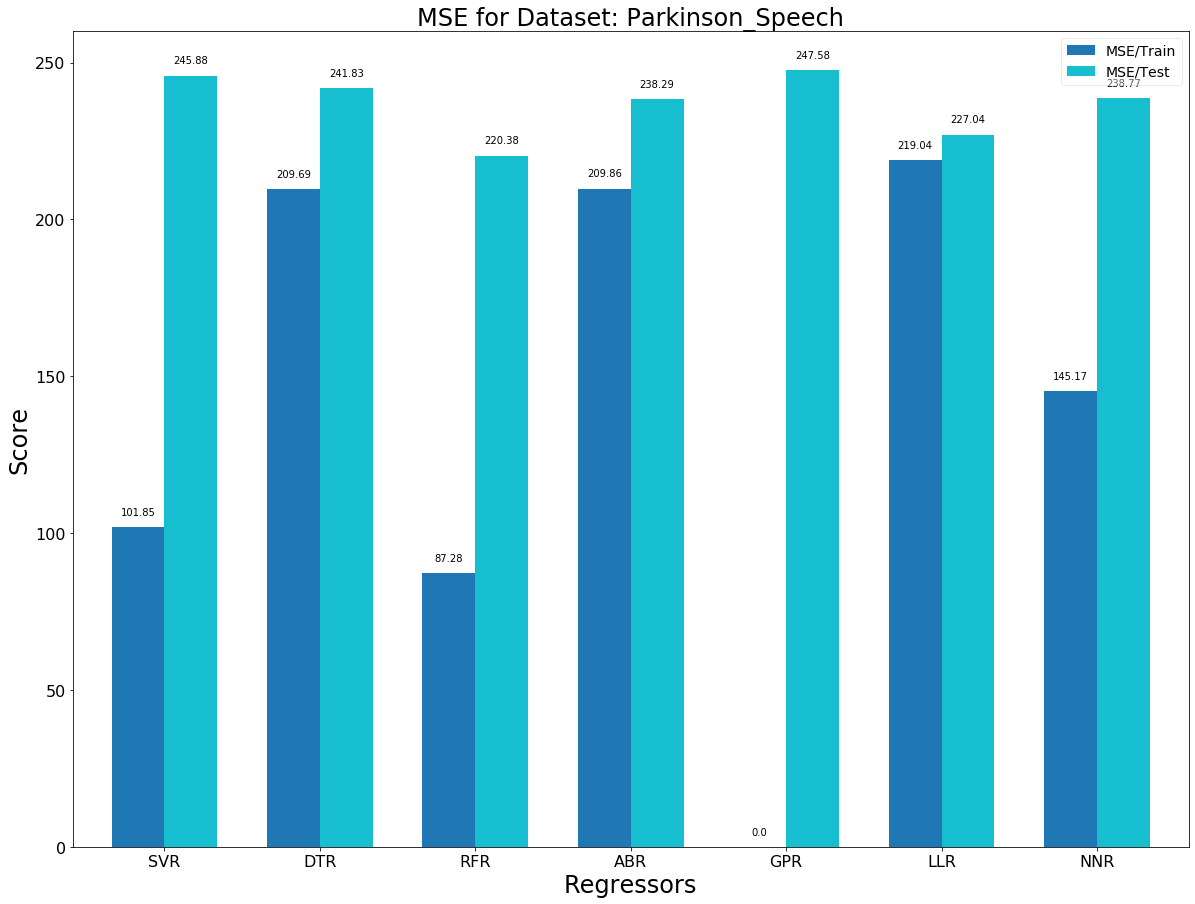

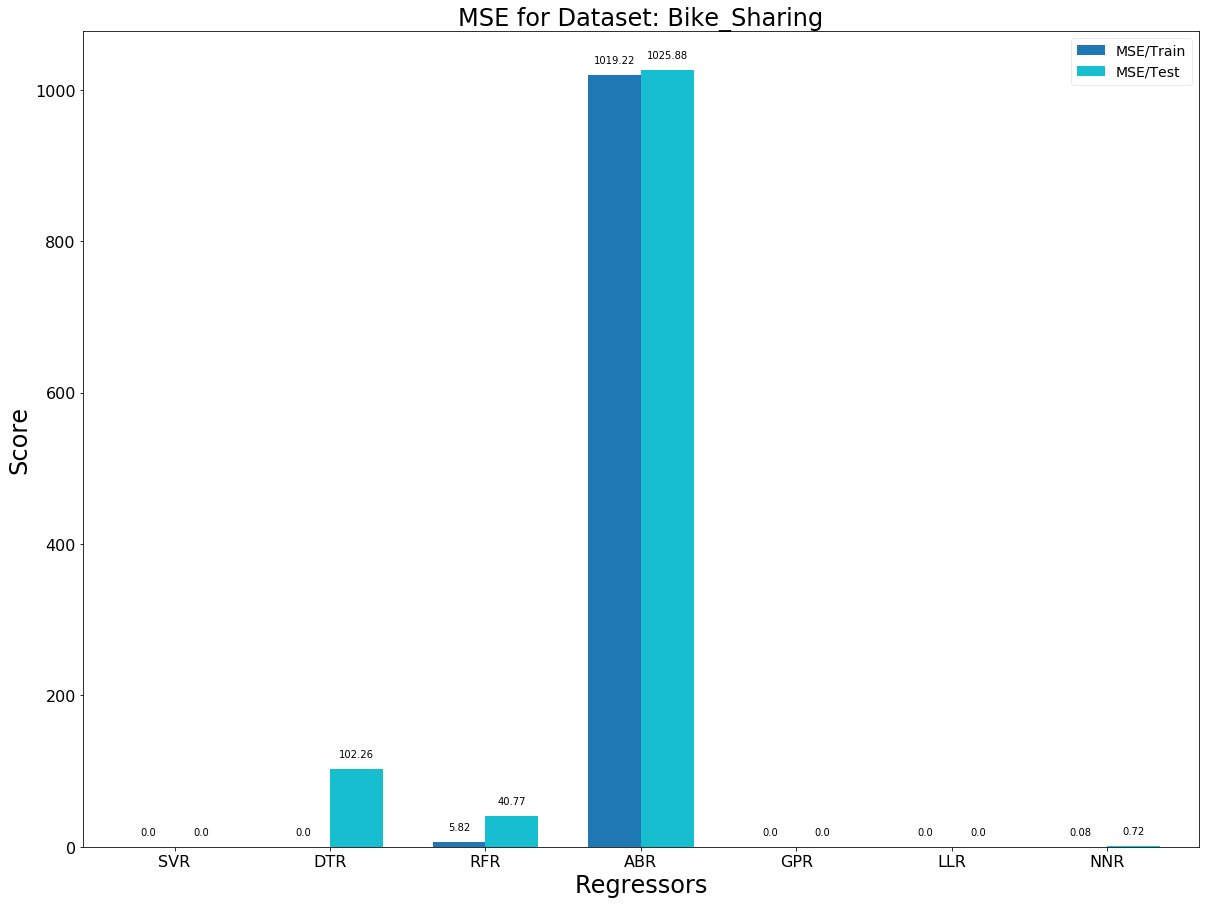

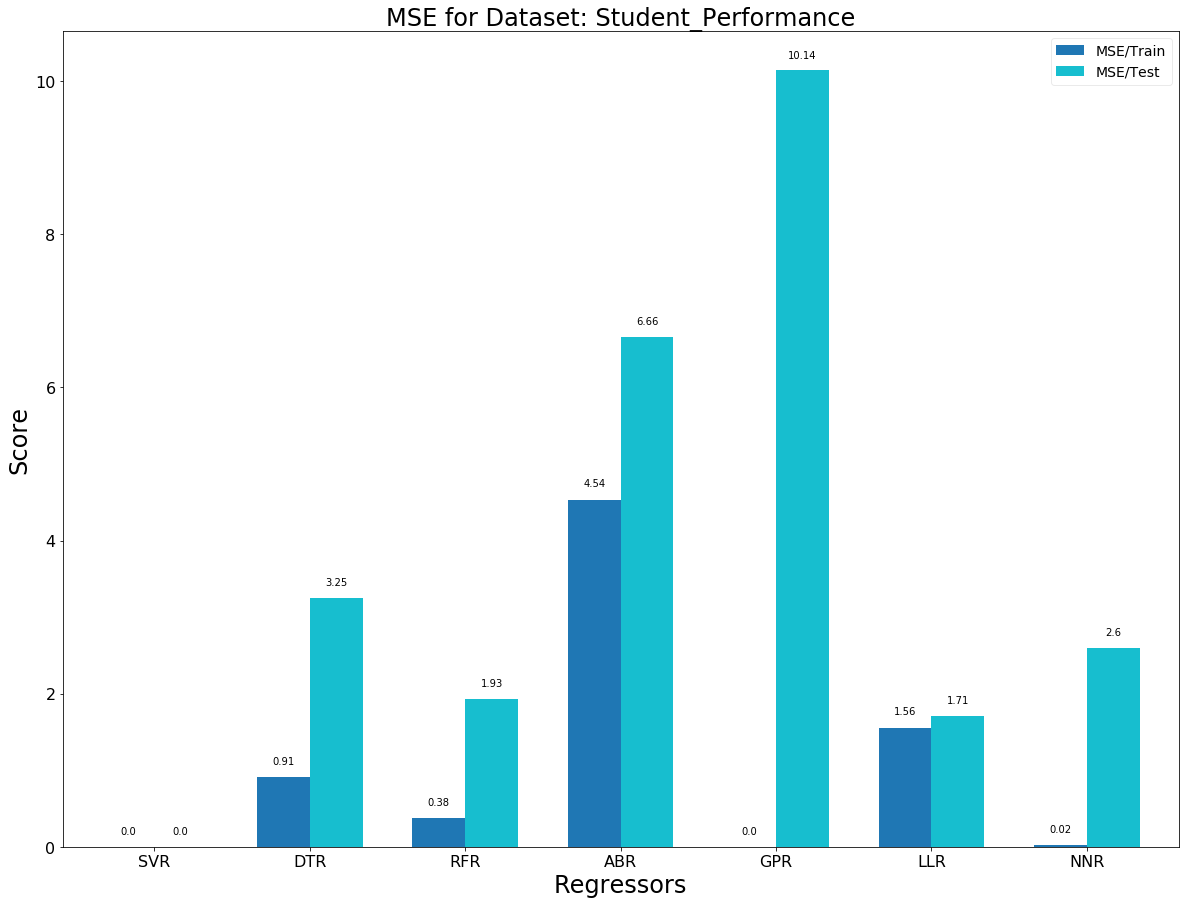

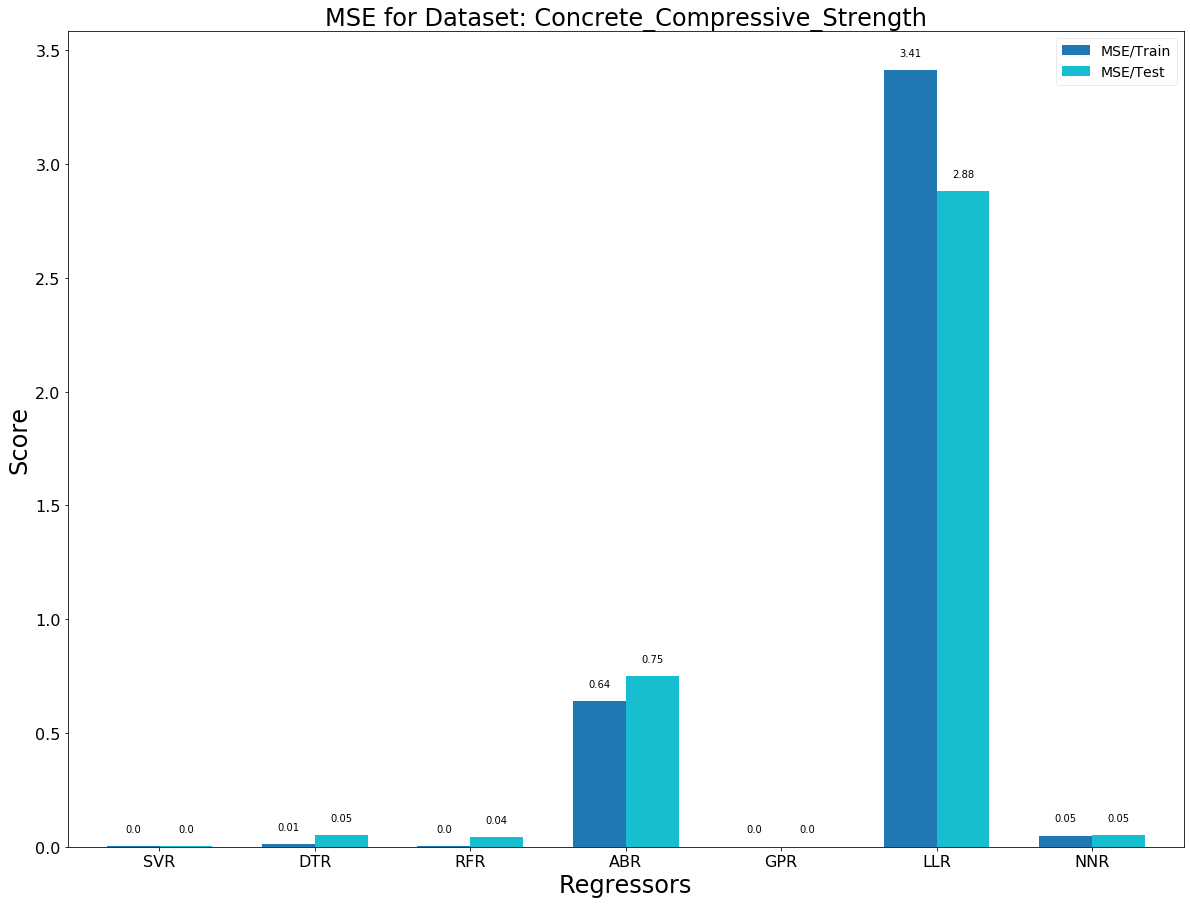

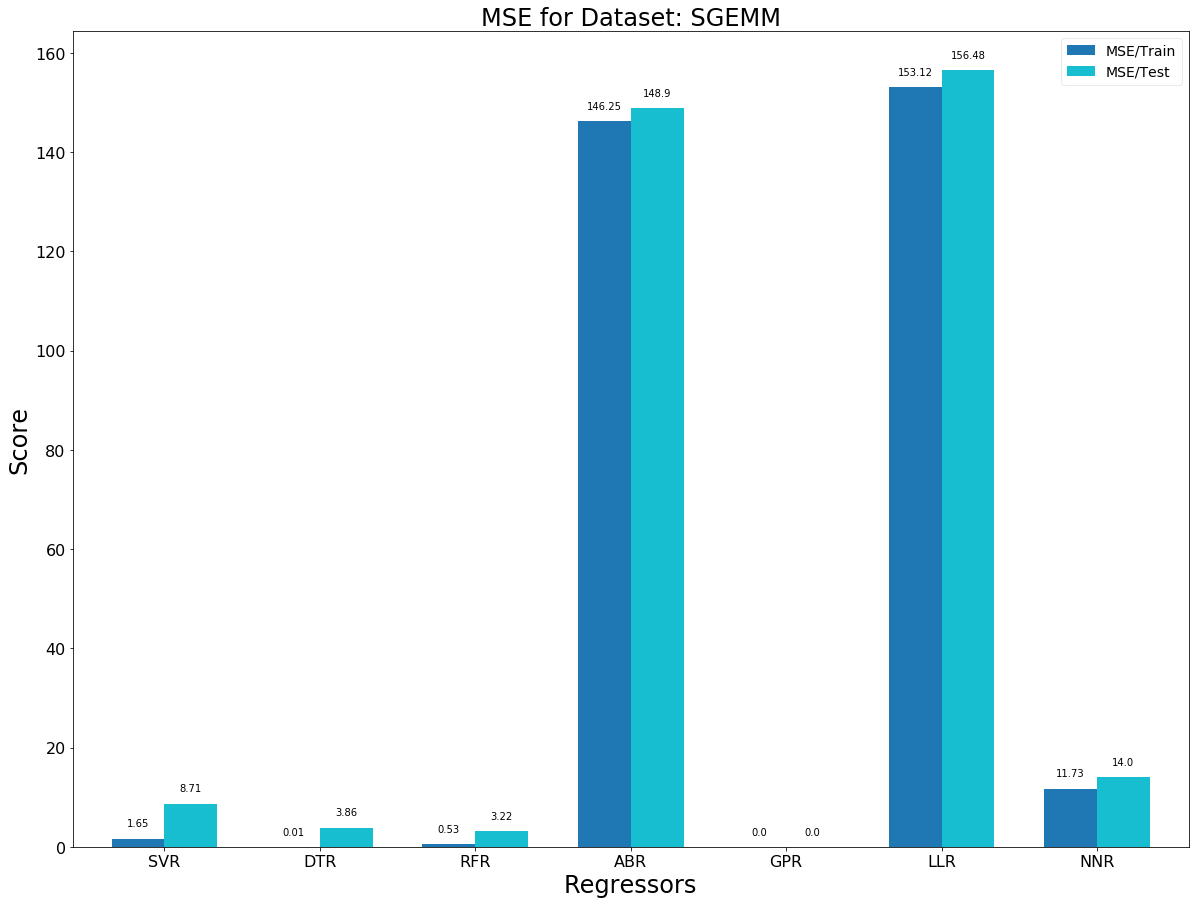

In [35]:
for dataset_name,score in rs_regression.items():
    df = gen_rs(score[:,[0,2]],["MSE/Train","MSE/Test"],regressors_regression)
    title = str("MSE for Dataset: %s" % dataset_name)
    plot_bar(df.T,title,"Regressors","Score")

run the code below which could give you the result histogram of **$R^2$** fore each regressor

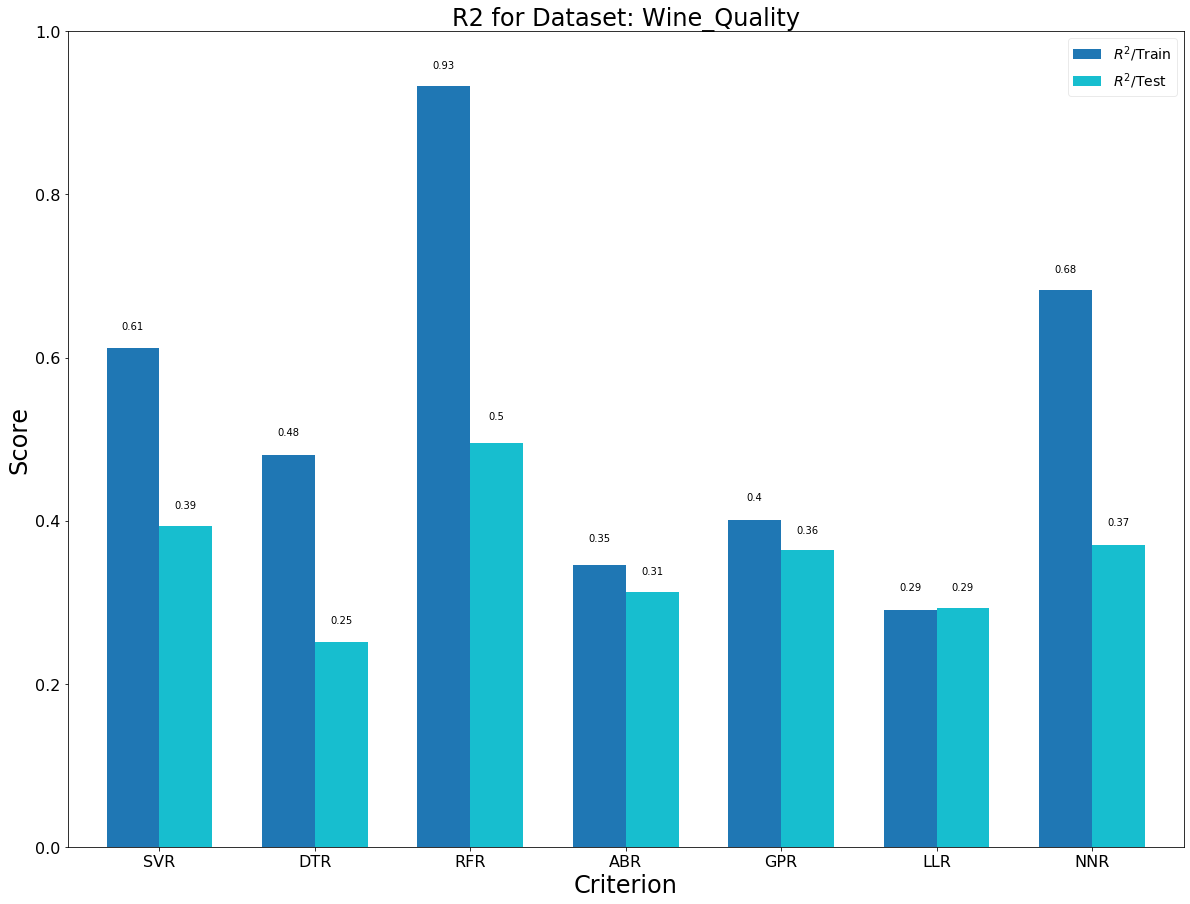

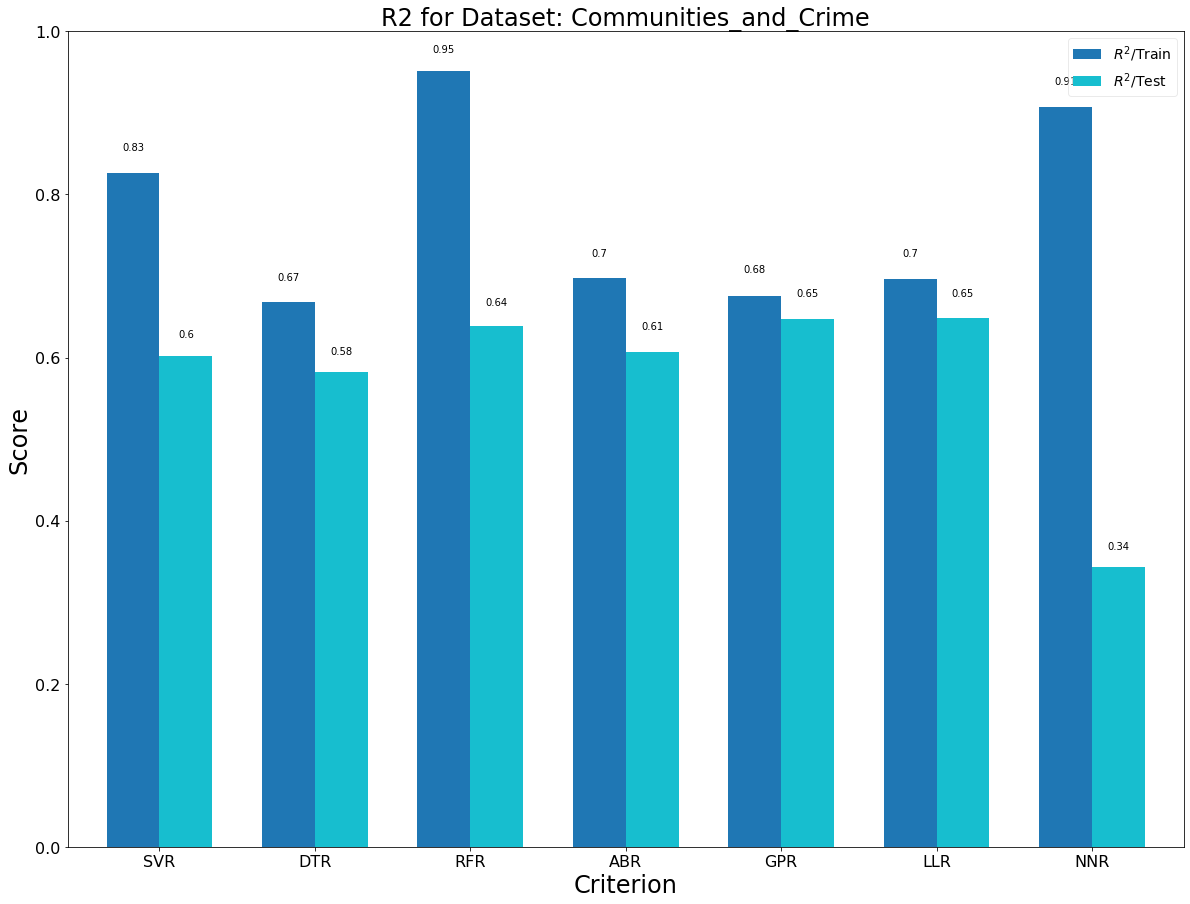

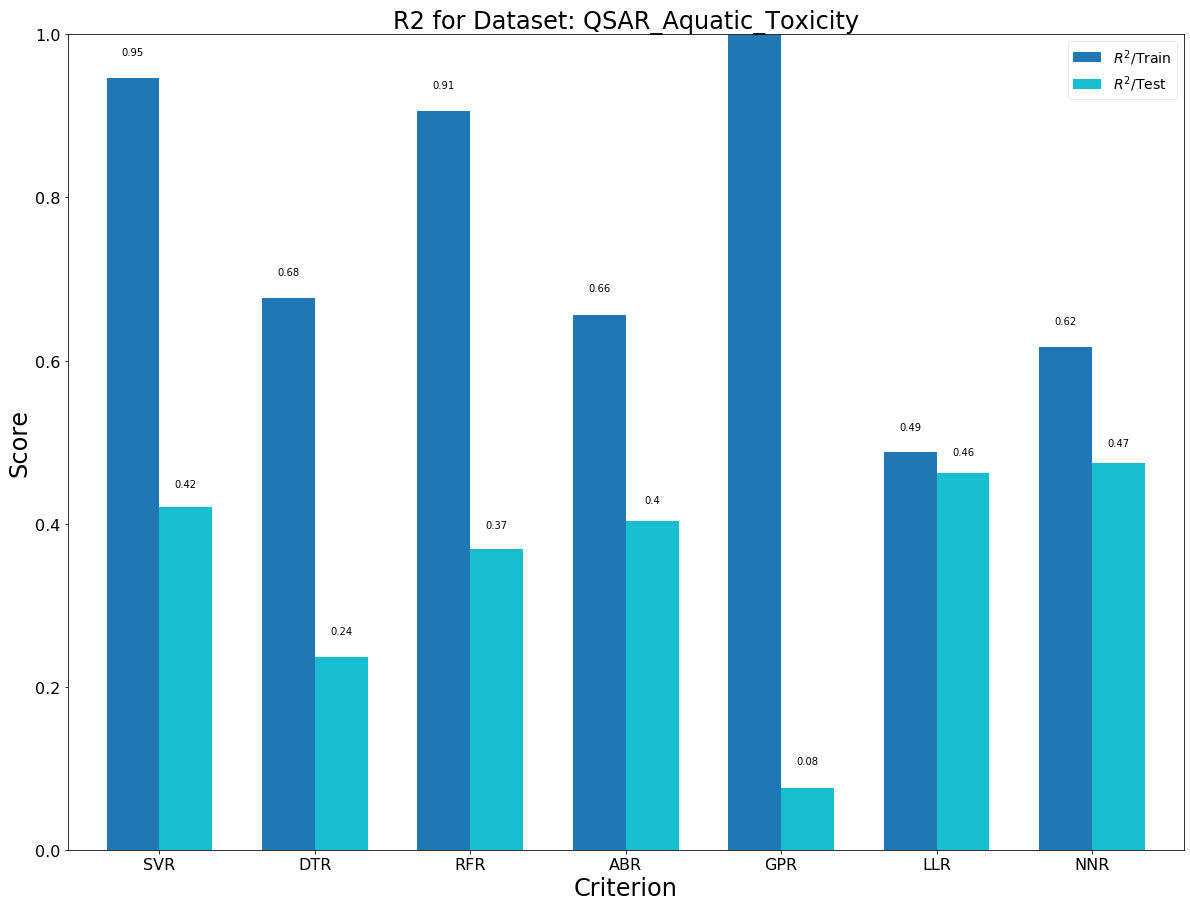

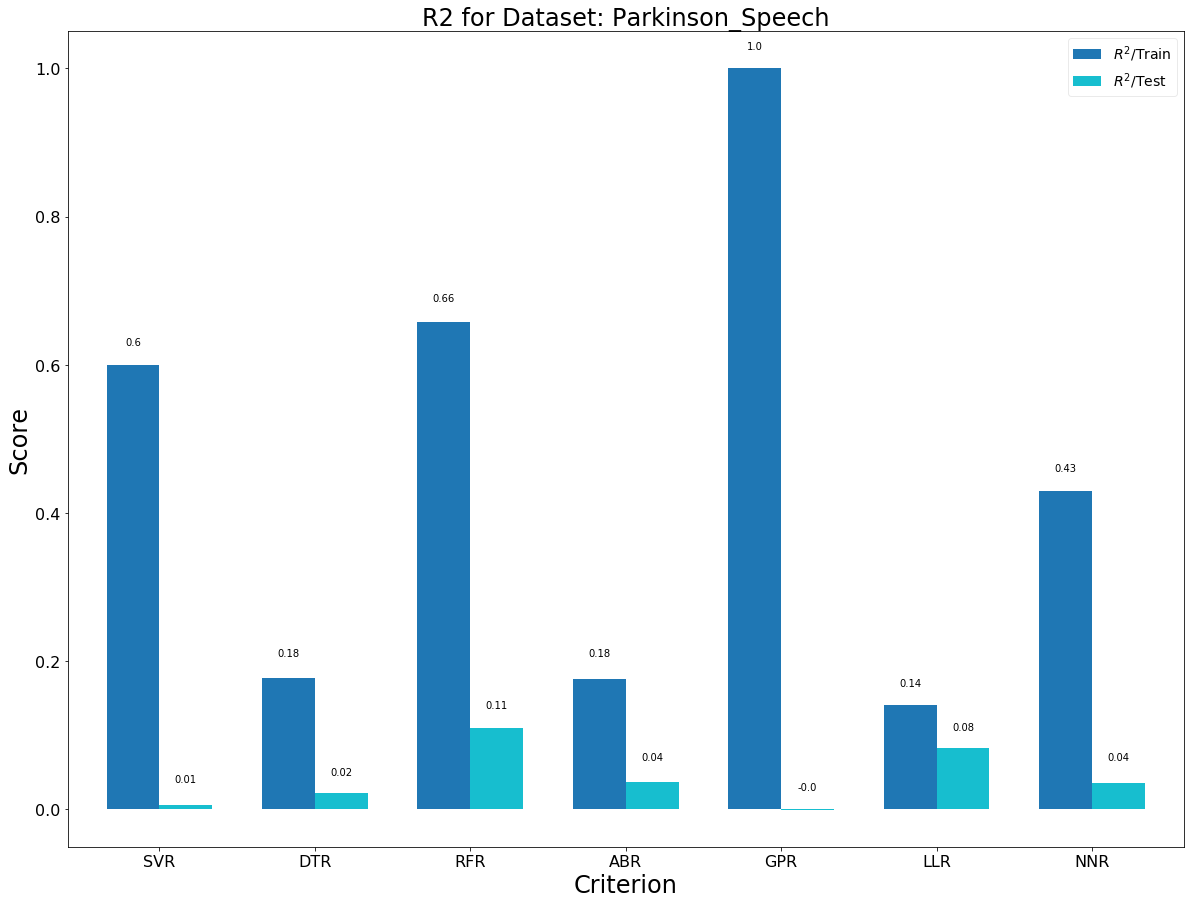

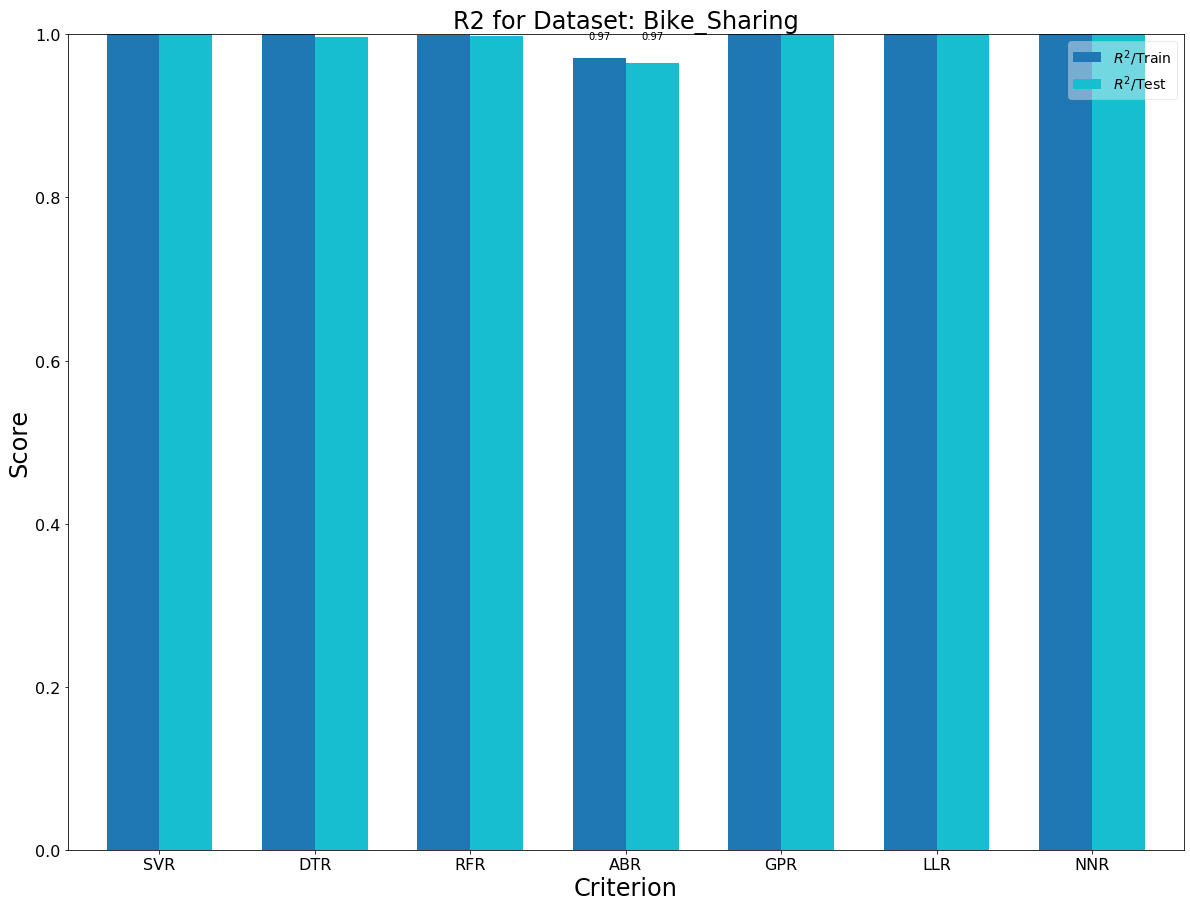

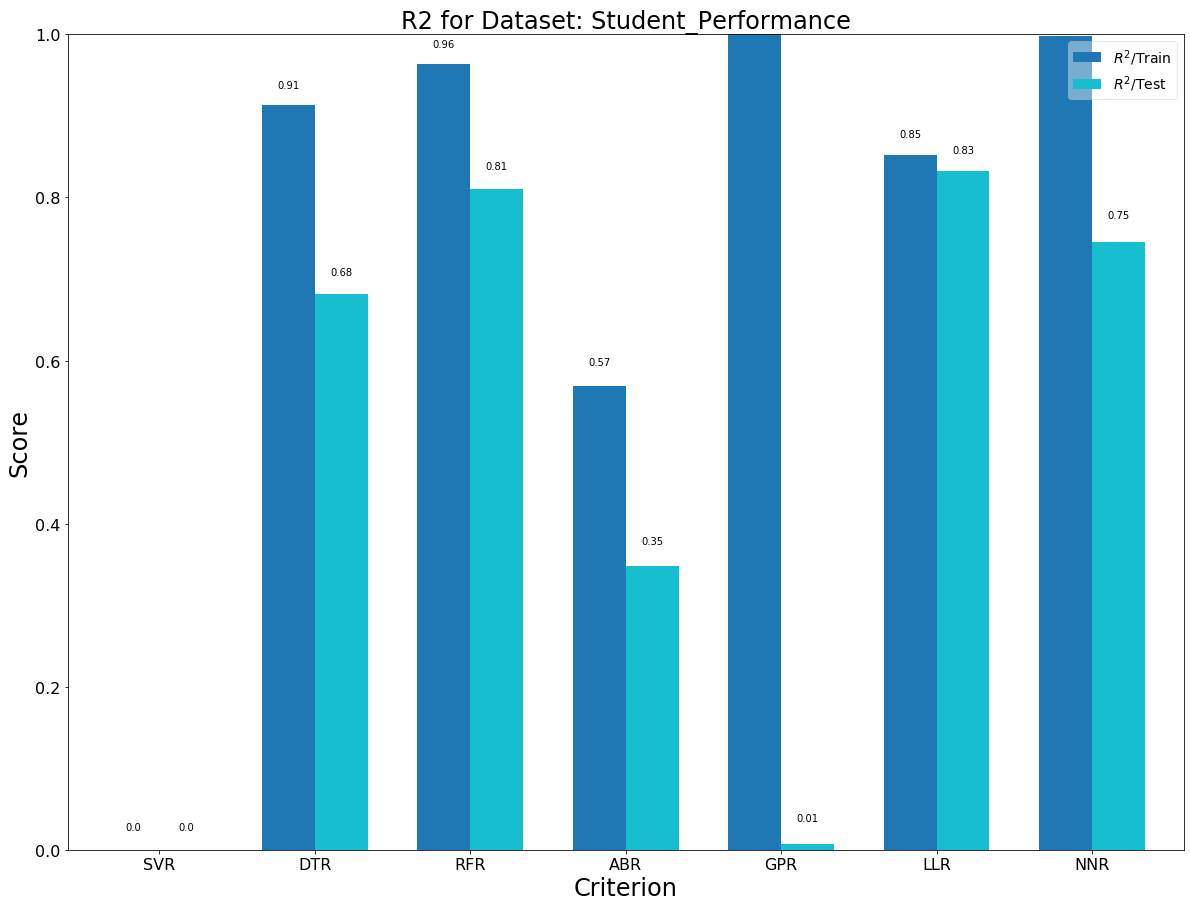

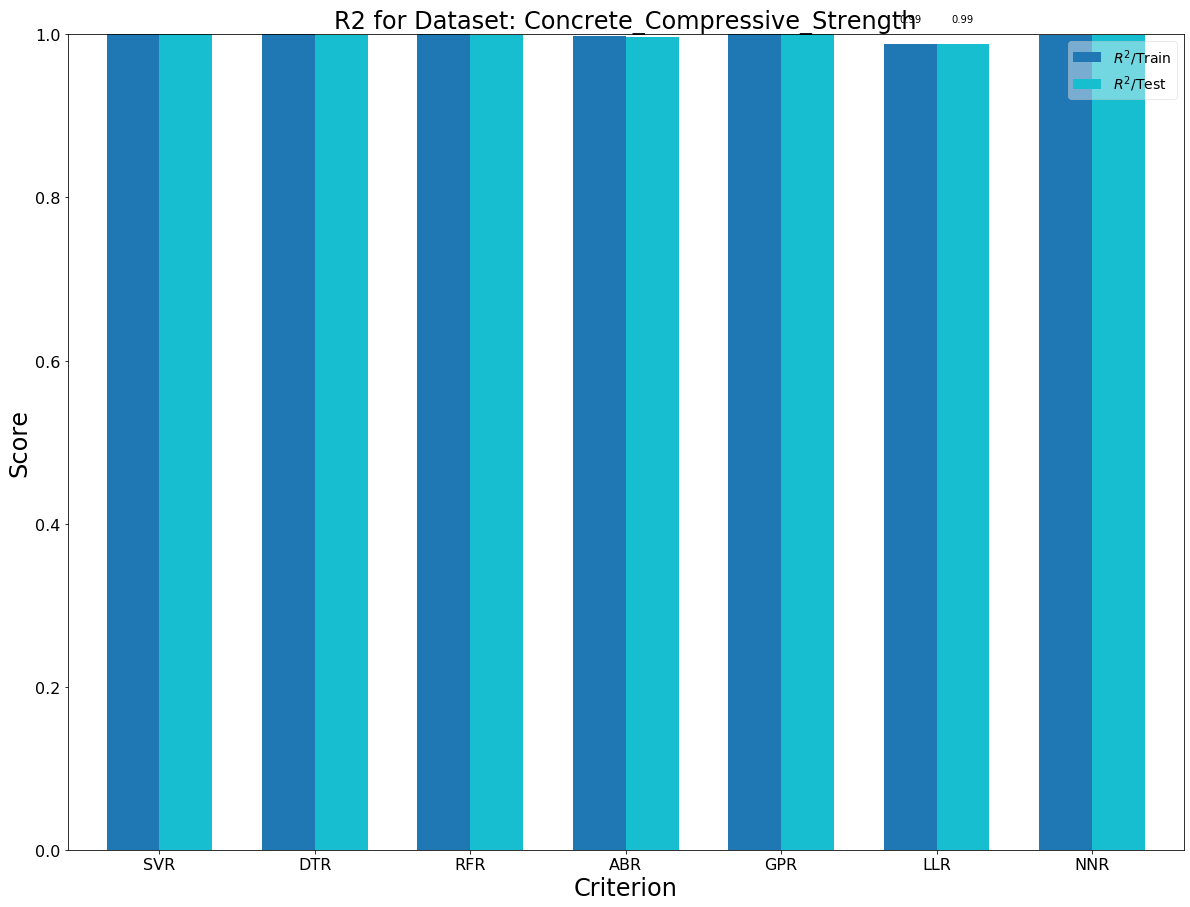

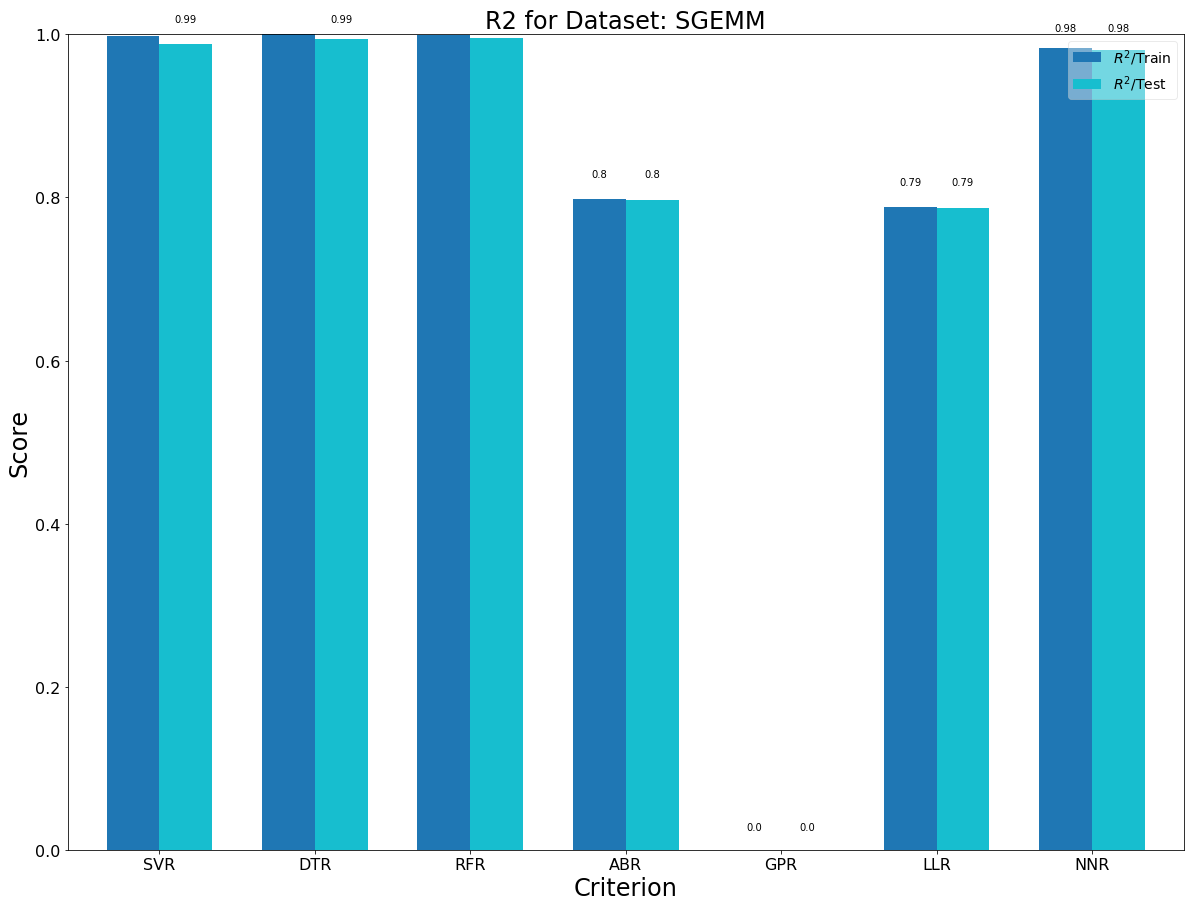

In [36]:
for dataset_name,score in rs_regression.items():
    df = gen_rs(score[:,[1,3]],["$R^2$/Train","$R^2$/Test"],regressors_regression)
    title = str("R2 for Dataset: %s" % dataset_name)
    plot_bar(df.T,title,"Regressors","Score")

### 2.11.3  **Plot Result Histograms by according to regressors**

In this part, the result will be plotted as histograms according to different regressors. 

run the code below which could give you the result histogram of **MSE** fore each regressor.

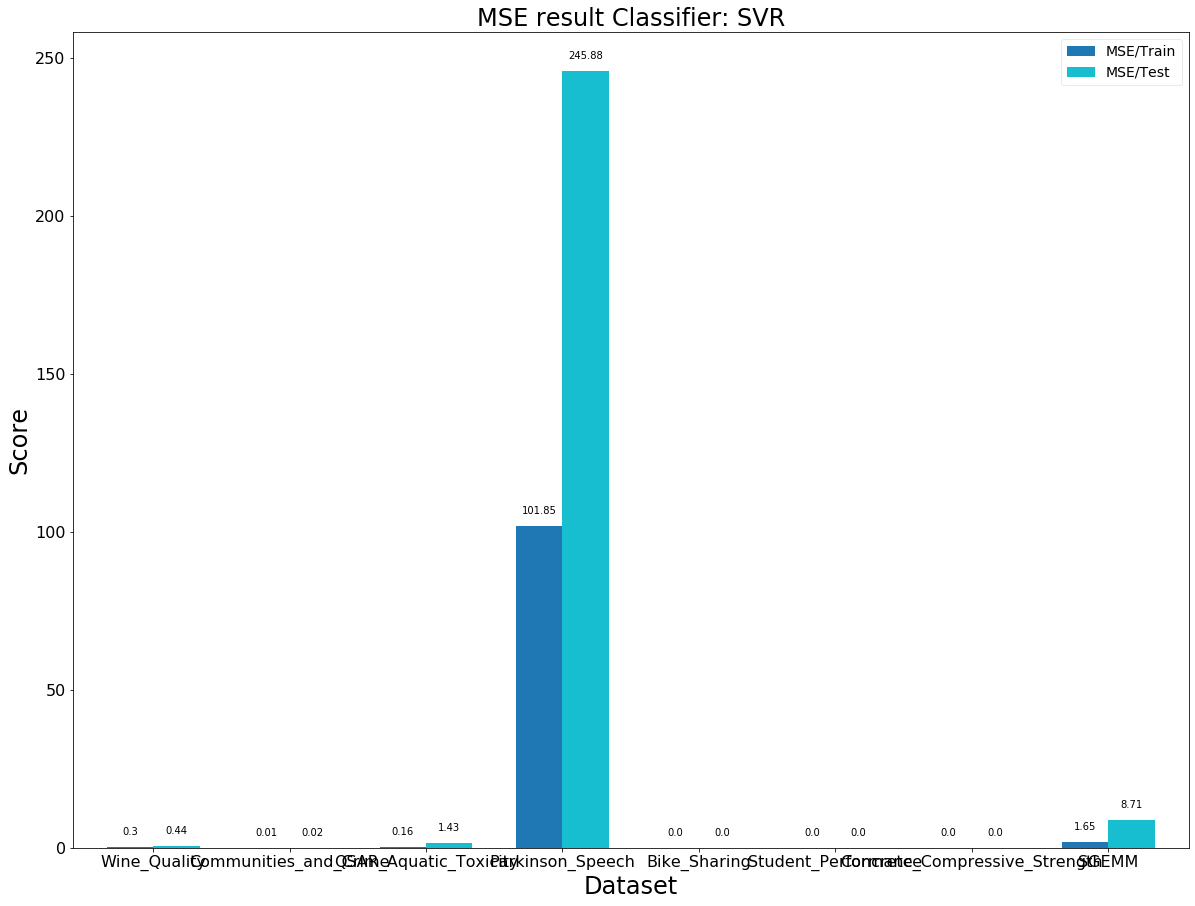

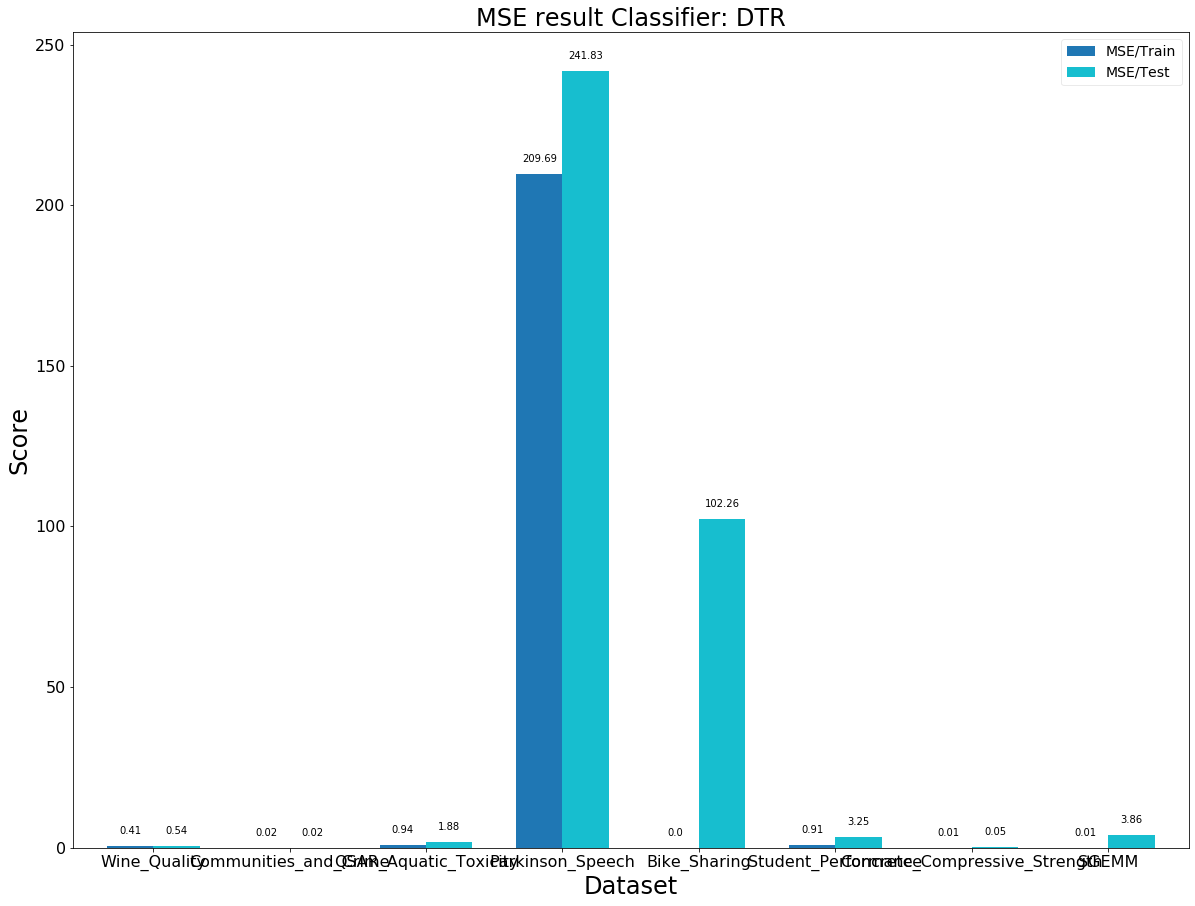

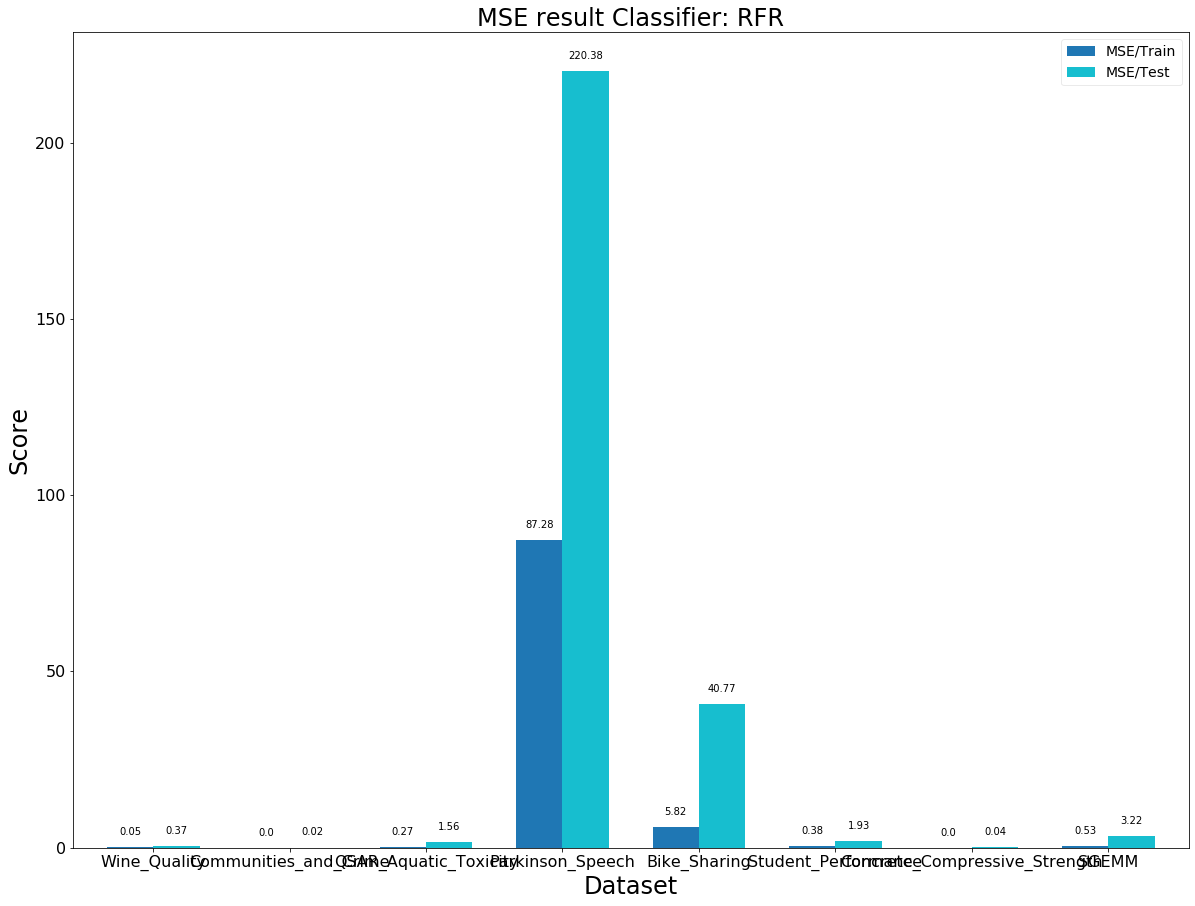

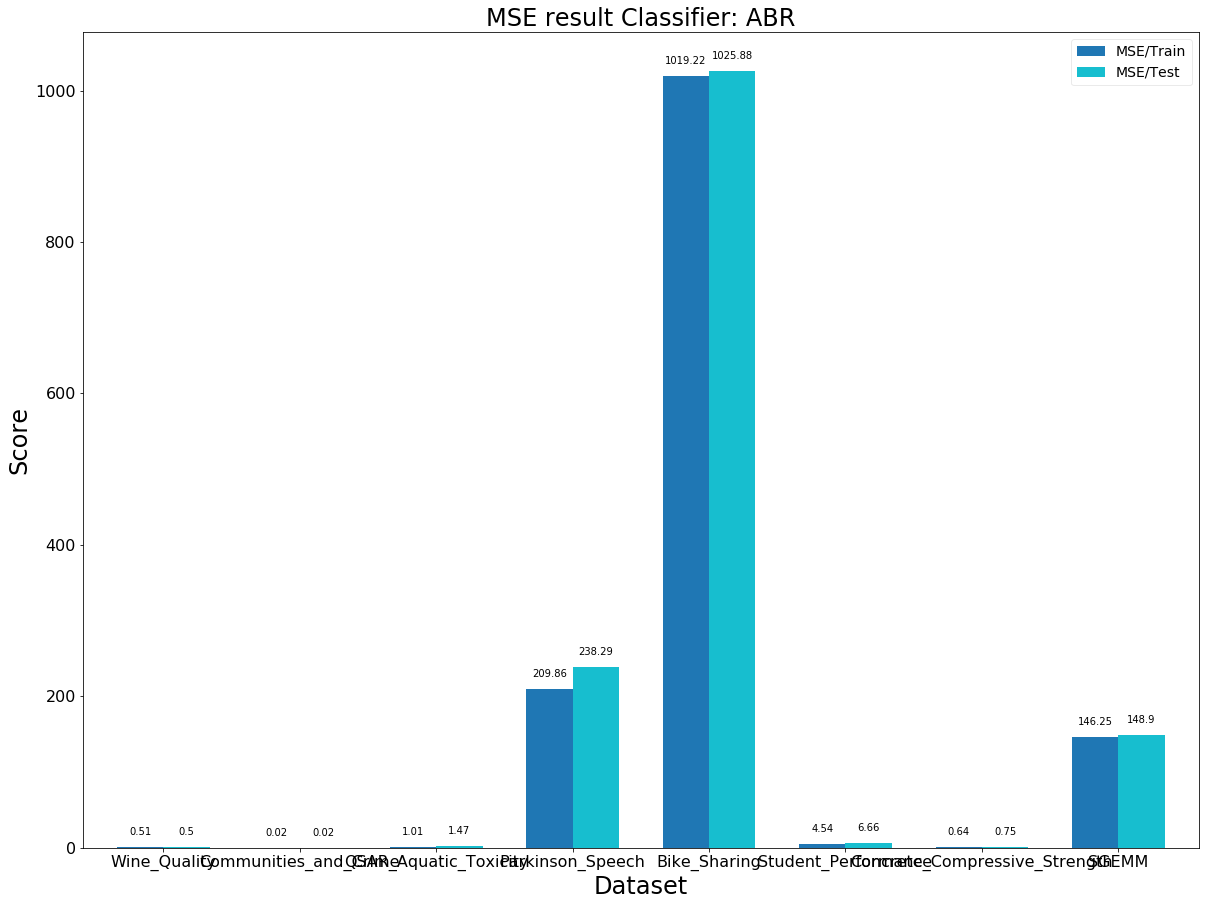

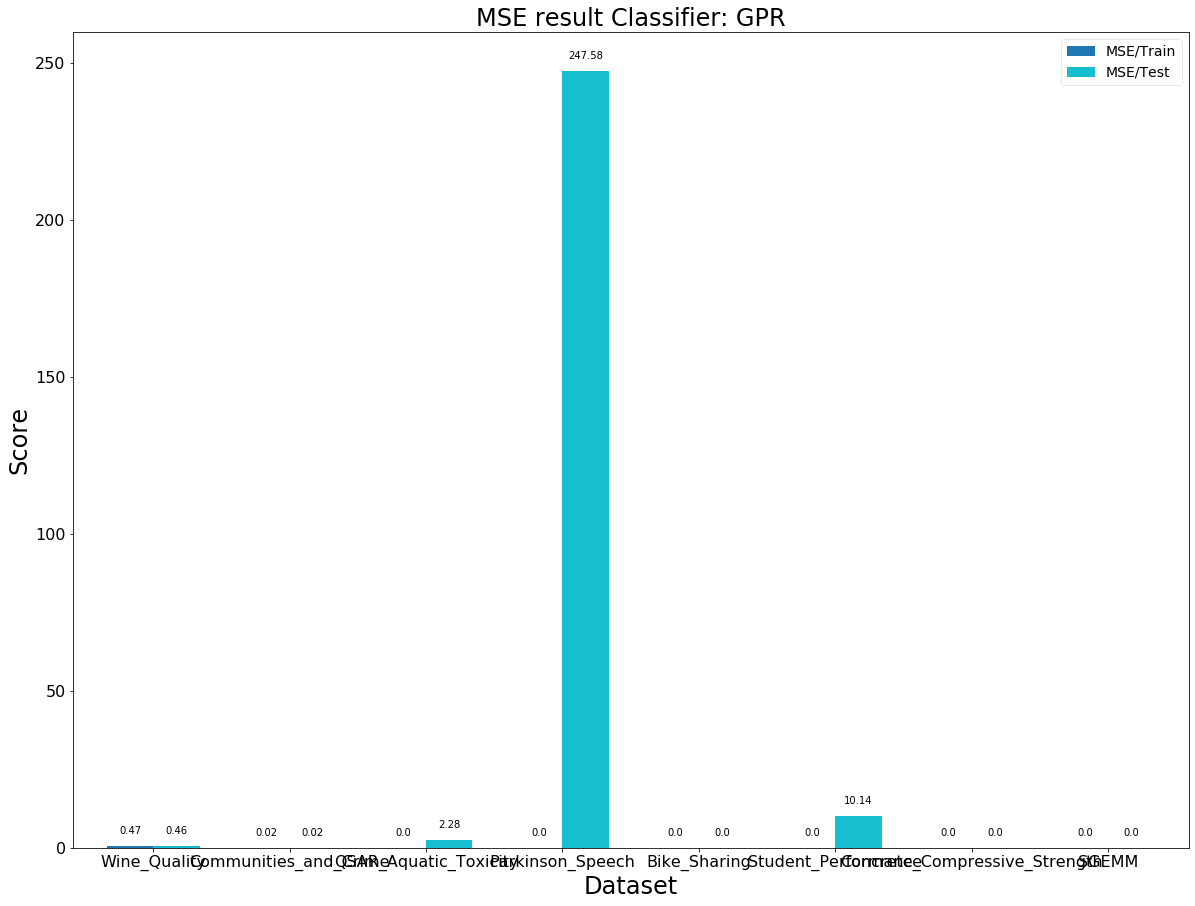

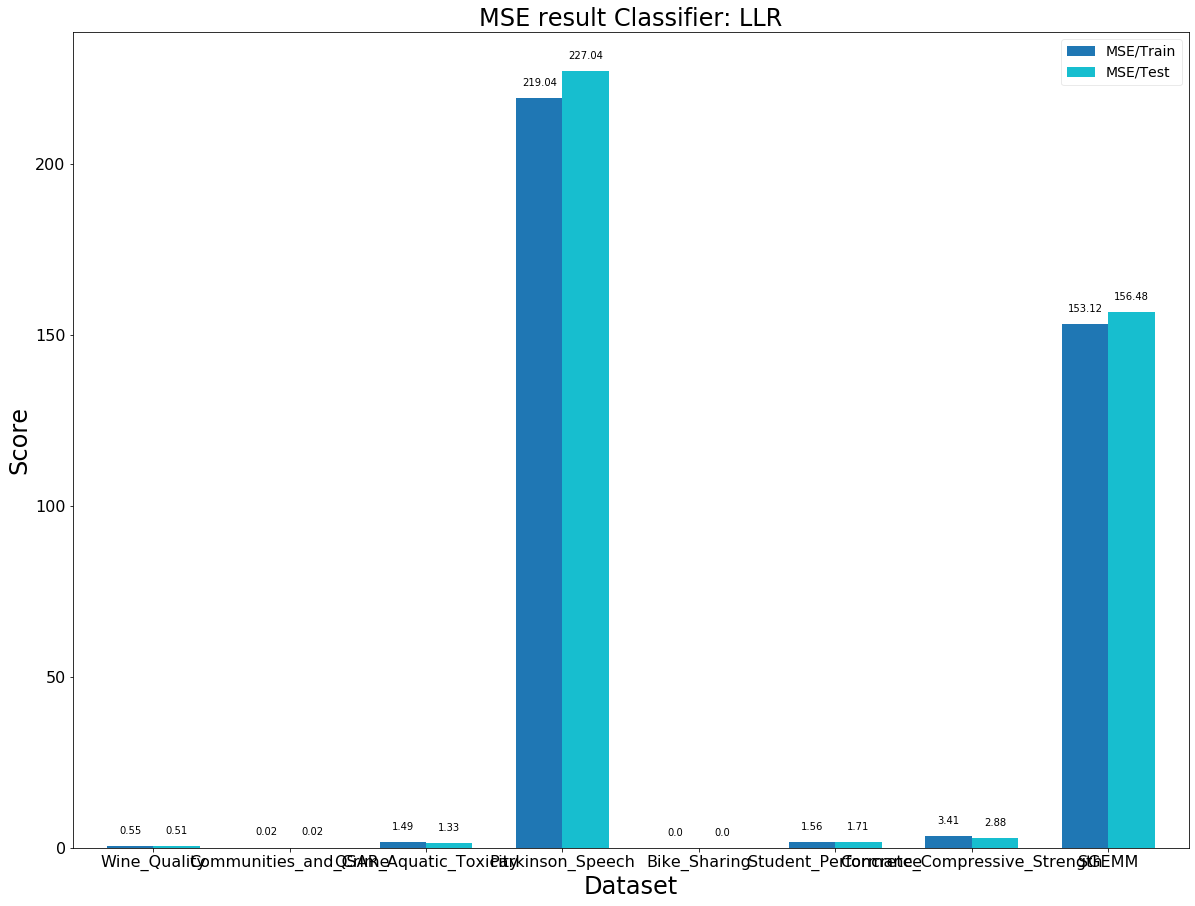

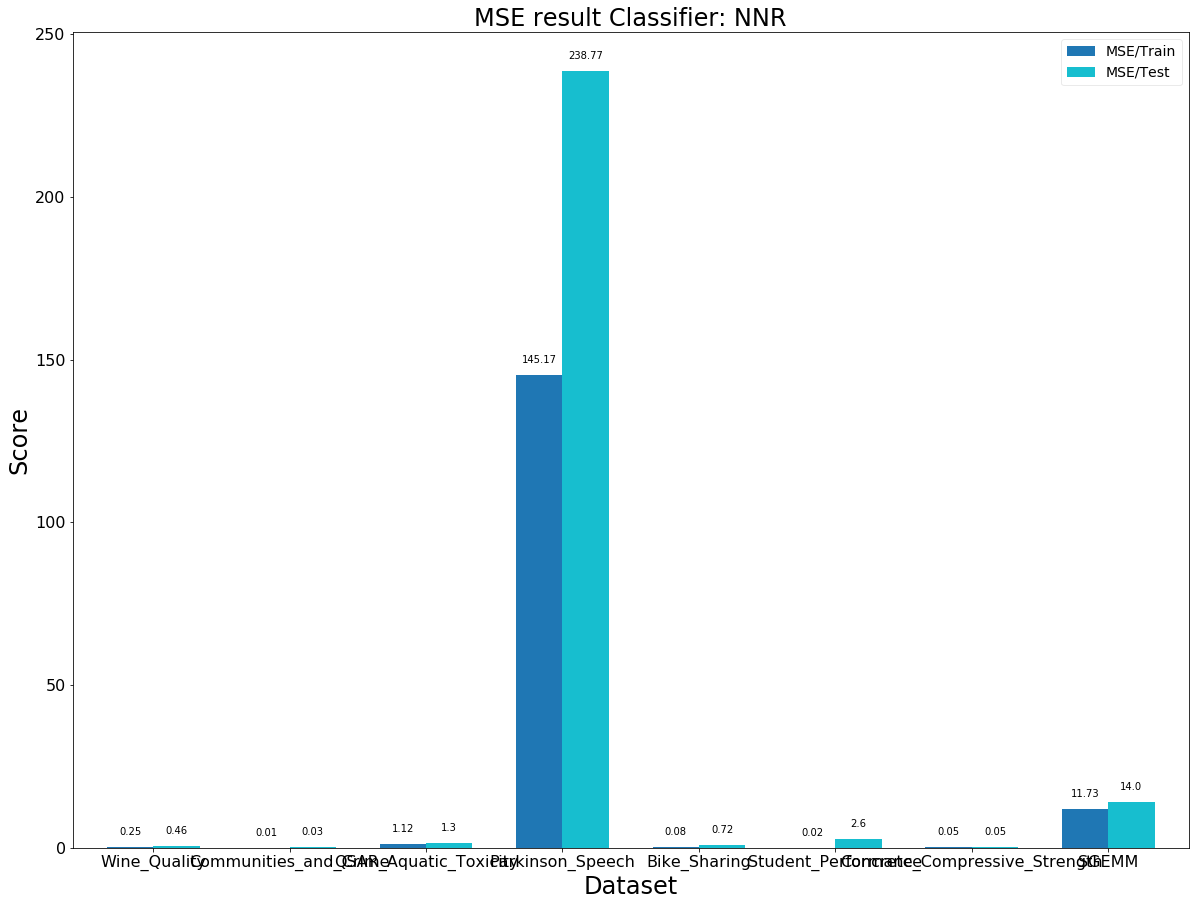

In [37]:
for classifier,classifier_rs in rs_mse_regressors.items():
    df = gen_rs(classifier_rs,["MSE/Train","MSE/Test"],data_name_regression)
    title = str("MSE result Classifier: %s" % classifier)
    plot_bar(df.T,title,"Dataset","Score")

run the code below which could give you the result histogram of **$R^2$** fore each regressor.

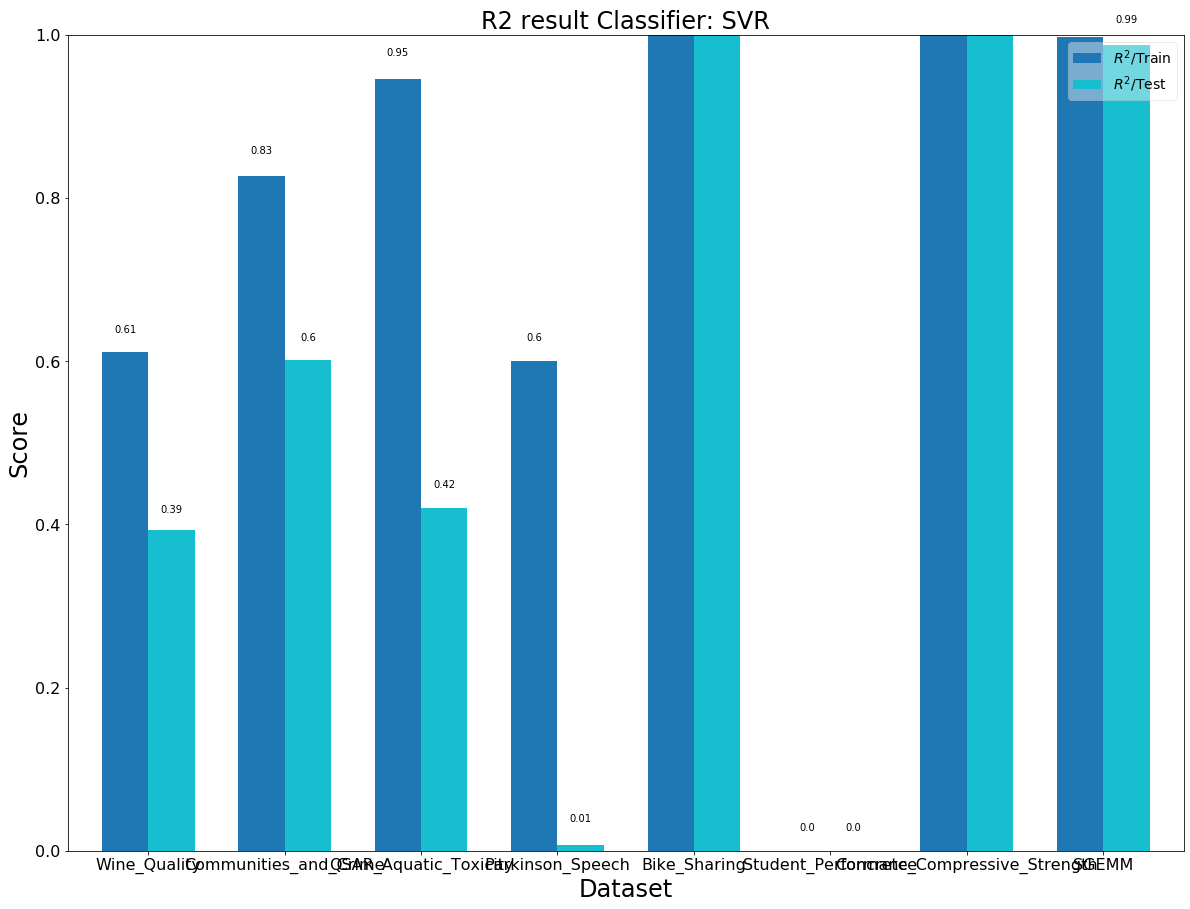

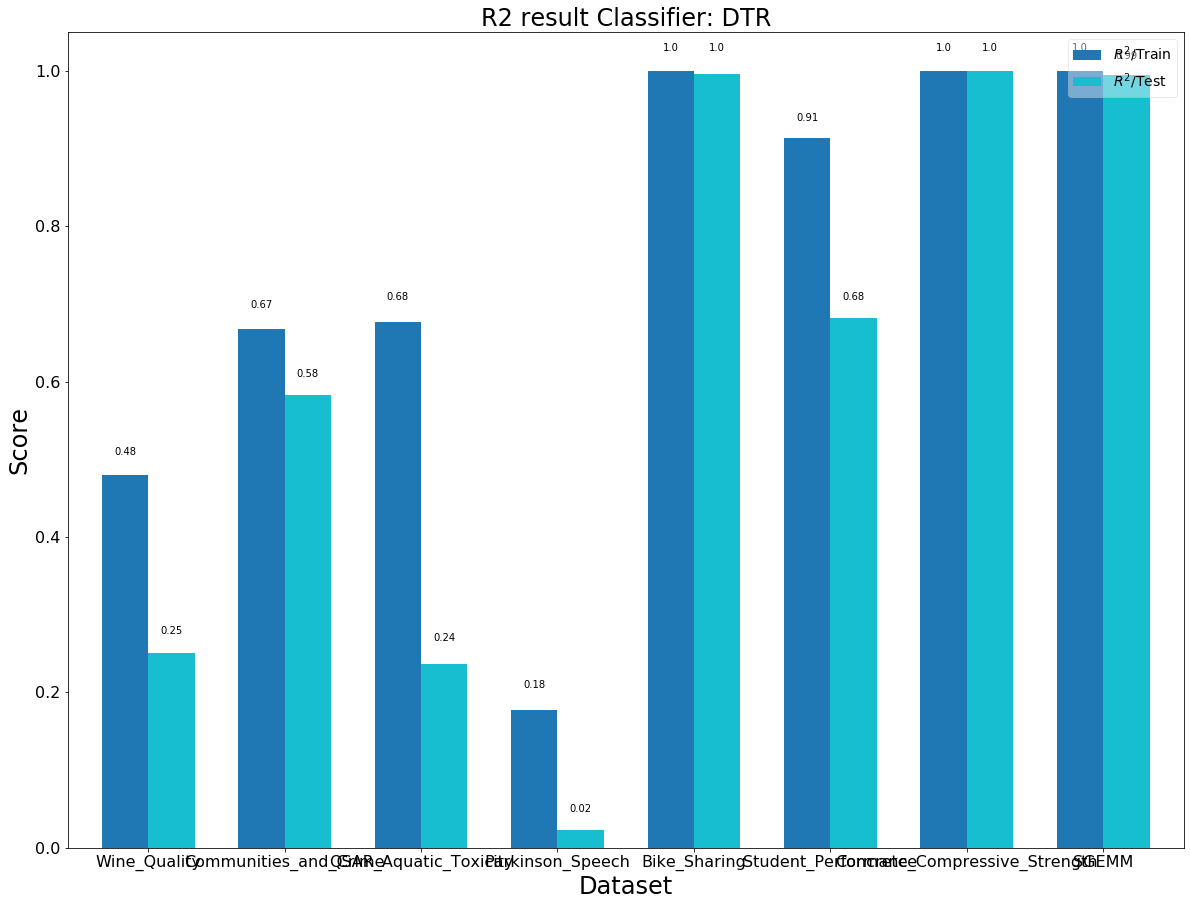

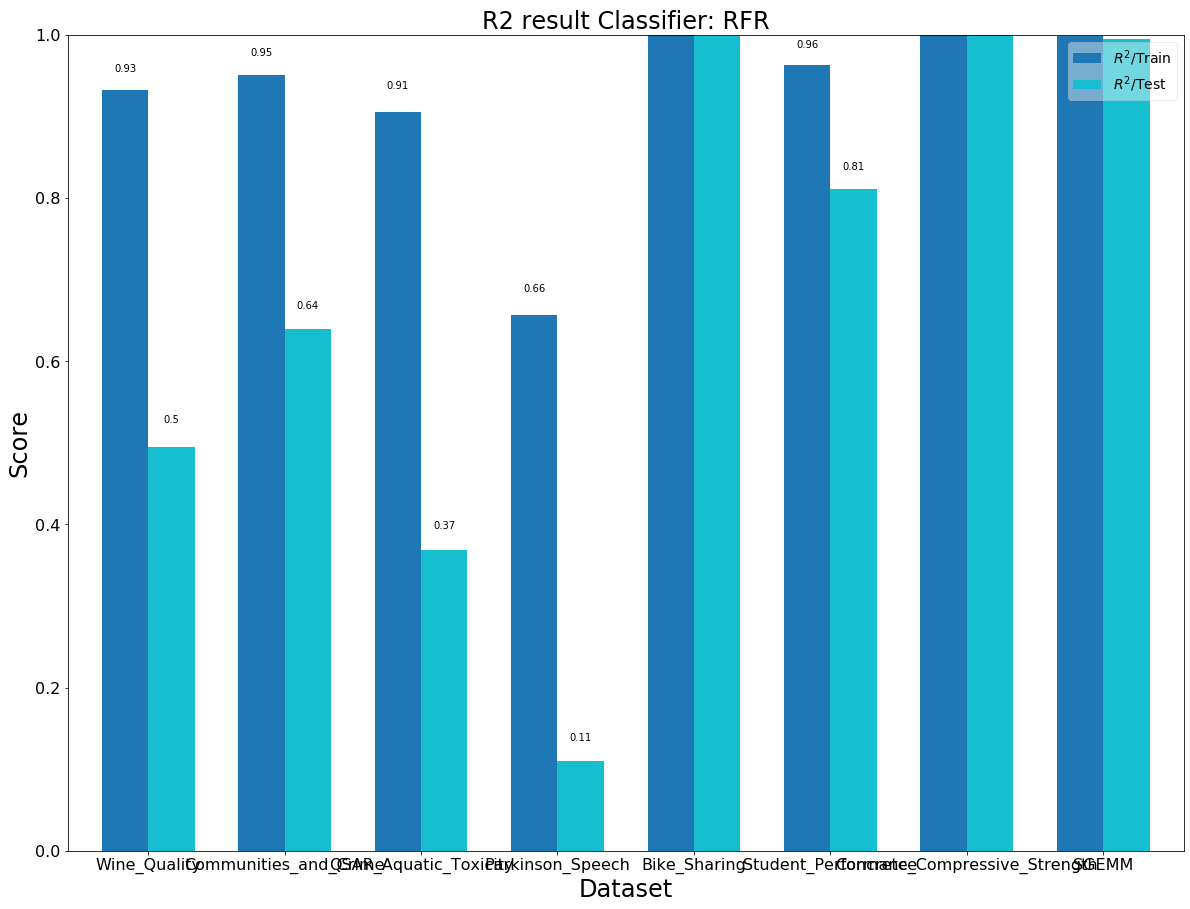

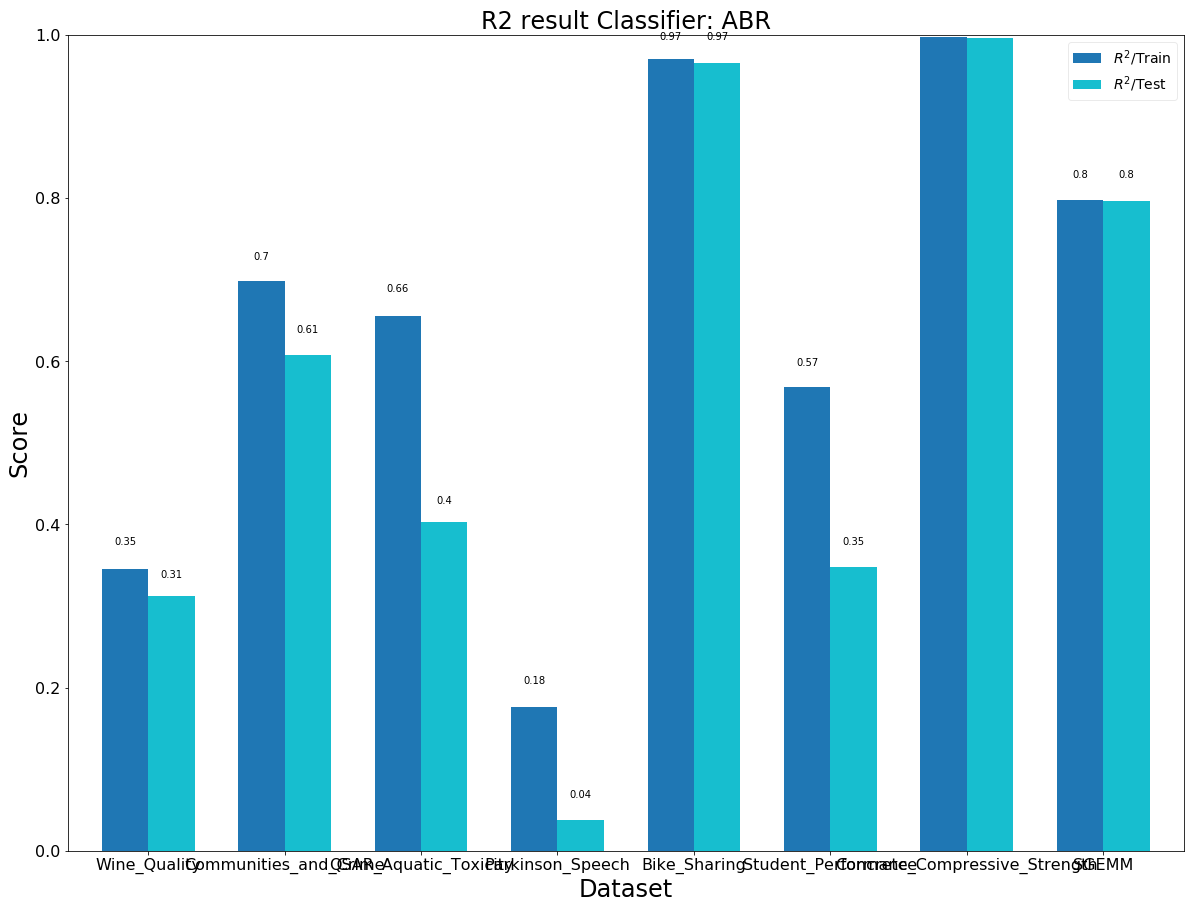

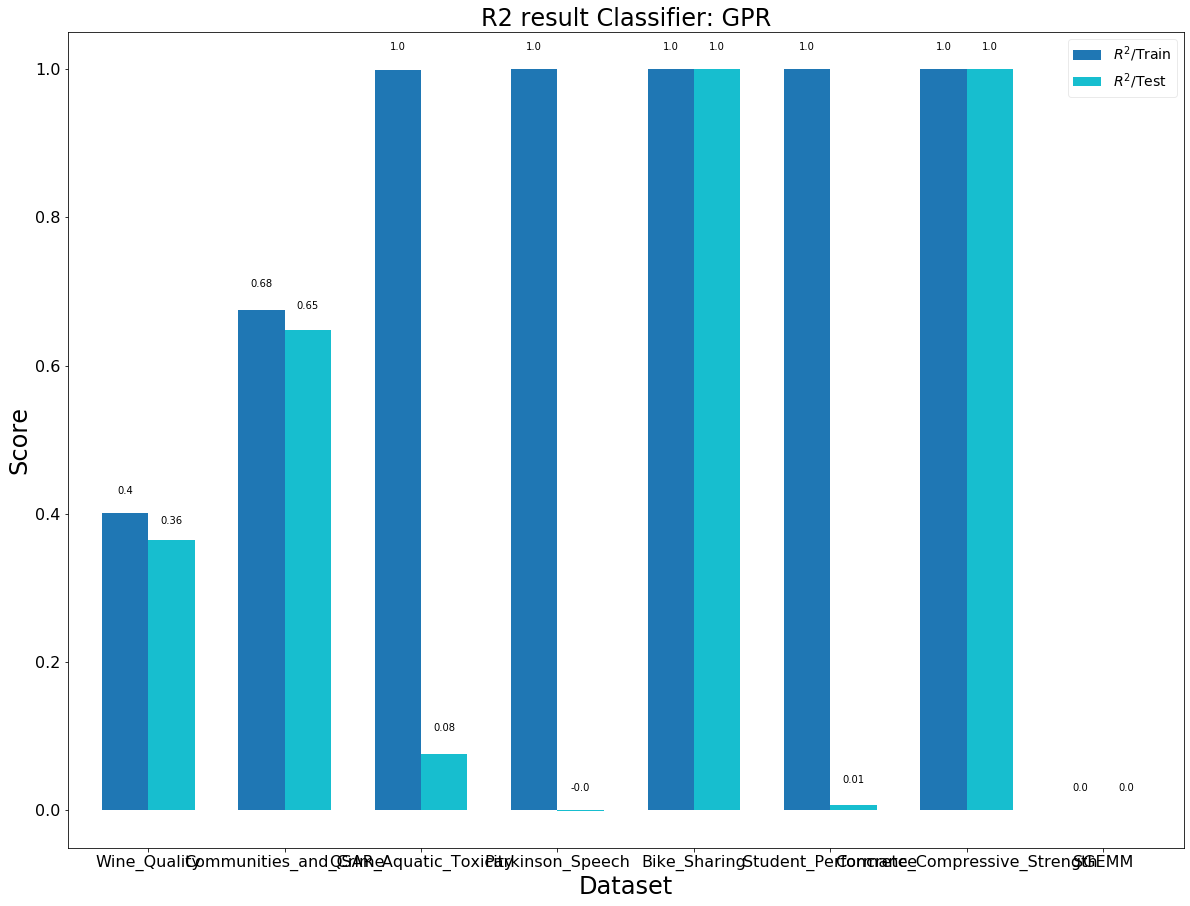

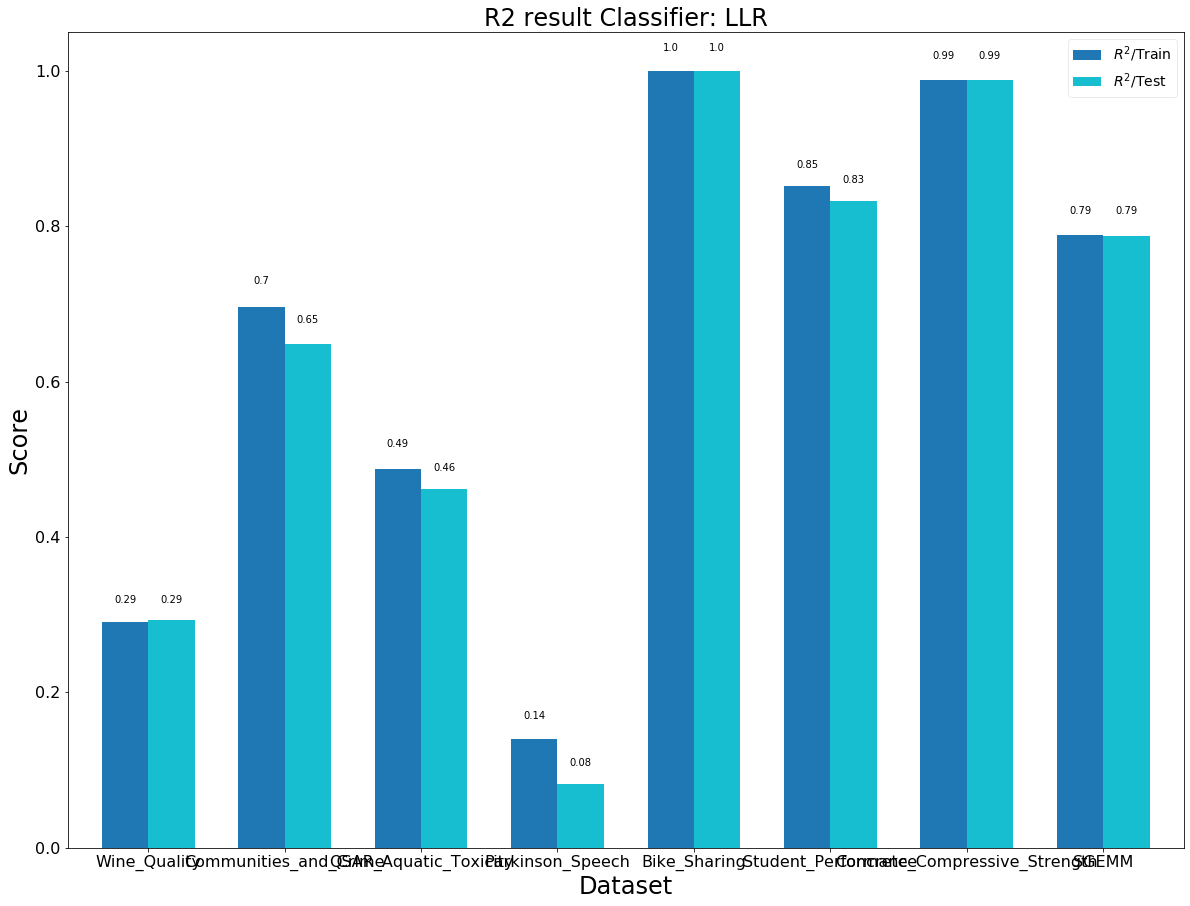

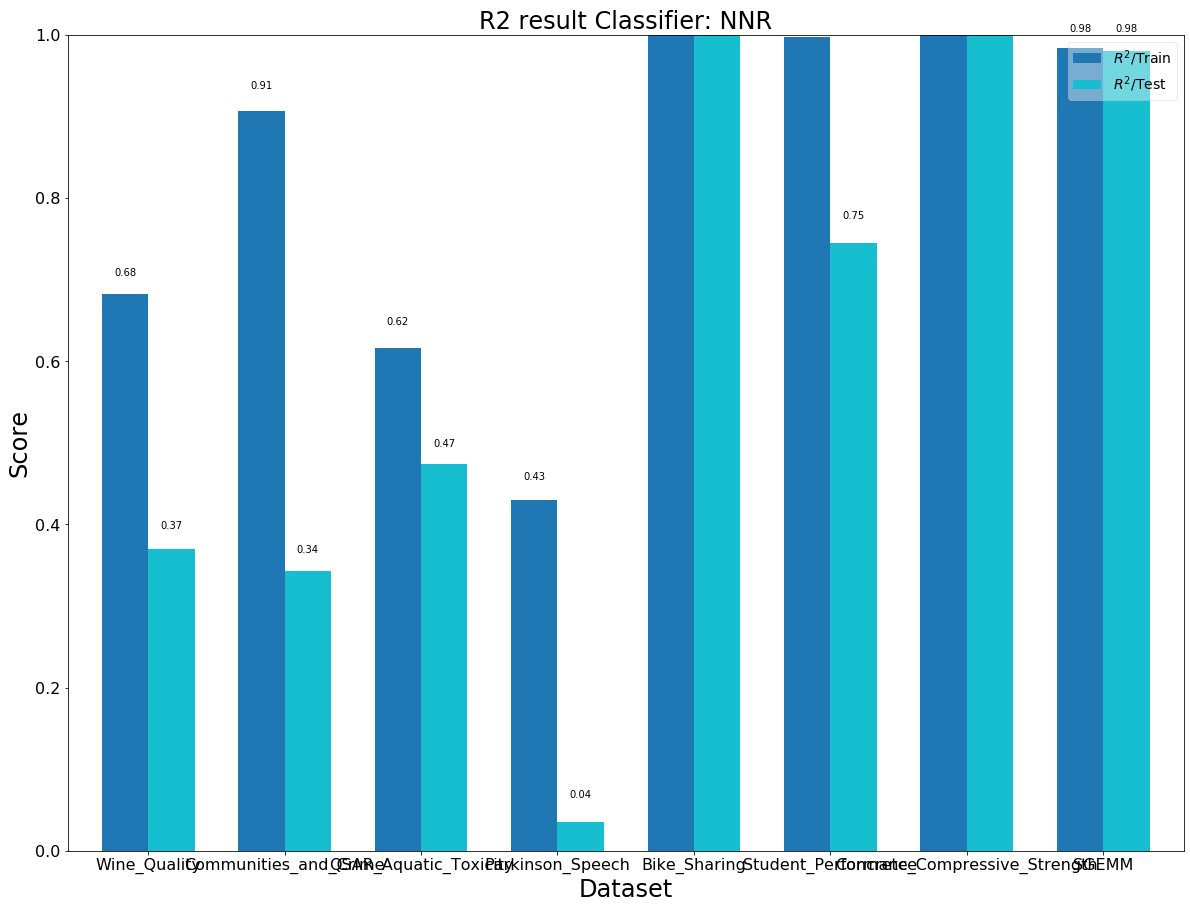

In [38]:
for classifier,classifier_rs in rs_r2_regressors.items():
    df = gen_rs(classifier_rs,["$R^2$/Train","$R^2$/Test"],data_name_regression)
    title = str("R2 result Classifier: %s" % classifier)
    plot_bar(df.T,title,"Dataset","Score")

### 2.11.4  **Plot Result Histograms by averaging all Data sets**

In this part, the result will be plotted as histograms according to averaged result.

**run the code below** to show the averaged result table and hisograms.

,MSE/Train,MSE/Test
SVR,11.552,28.499
DTR,21.199,35.369
RFR,9.435,26.829
ABR,138.204,142.246
GPR,0.054,28.942
LLR,37.919,38.997
NNR,15.842,25.793


,R2/Train,R2/Test
SVR,0.665,0.490
DTR,0.592,0.477
RFR,0.741,0.542
ABR,0.521,0.447
GPR,0.675,0.344
LLR,0.524,0.509
NNR,0.662,0.495


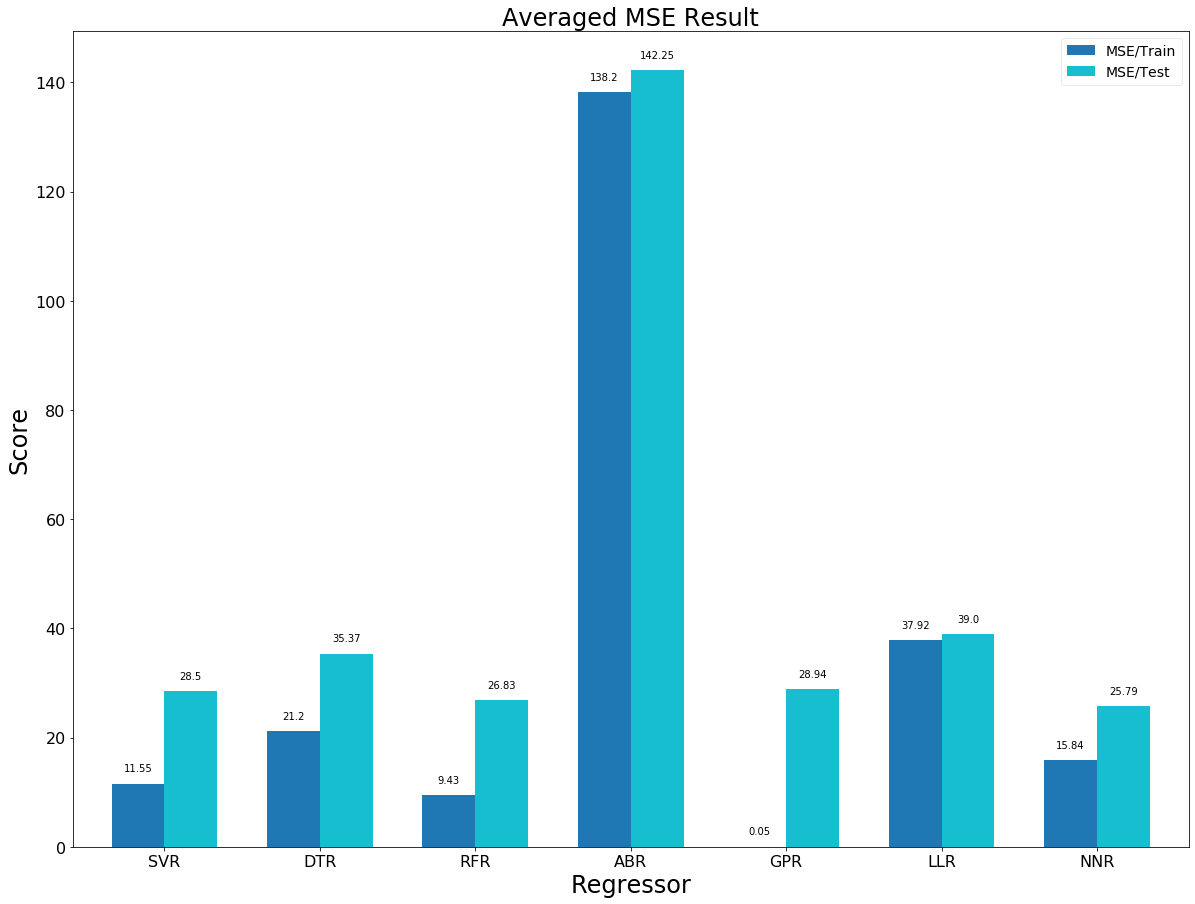

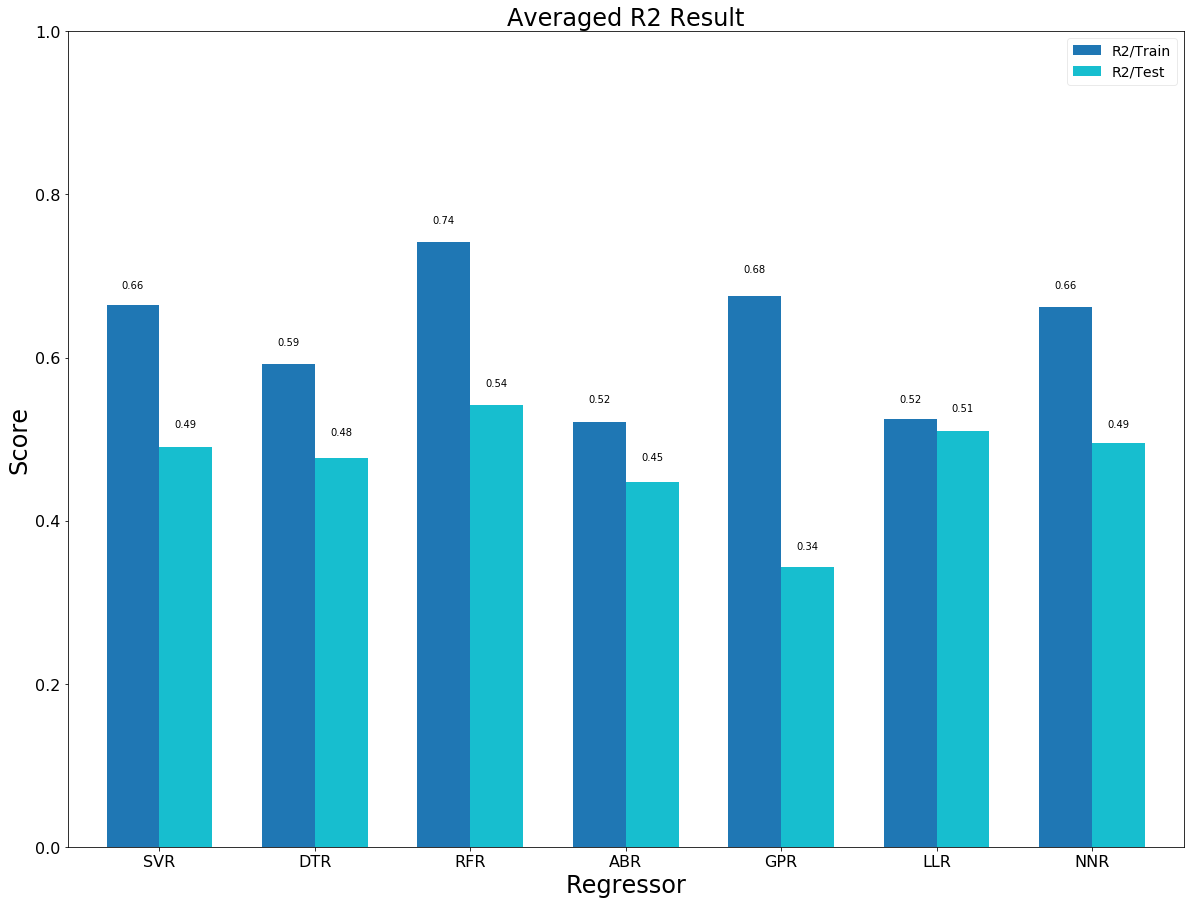

In [39]:
rs_avg_reg = np.zeros((7,4))
den_reg = rs_avg_reg + 10
for regressor,regressor_rs in rs_regression.items():
    regressor_rs[regressor_rs == None] = 0.0
    den_reg[regressor_rs == 0.0] = den_reg[regressor_rs == 0.0] - 1
    regressor_rs = regressor_rs.astype(np.float)
    rs_avg_reg = rs_avg_reg  +  regressor_rs
df_avg_reg_MSE = gen_rs((rs_avg_reg/den_reg)[:,[0,2]],["MSE/Train", "MSE/Test"],regressors_regression)
df_avg_reg_R2 = gen_rs((rs_avg_reg/den_reg)[:,[1,3]],["R2/Train", "R2/Test"],regressors_regression)
title_MSE = str("Averaged MSE Result")
title_R2 = str("Averaged R2 Result")
plot_table(df_avg_reg_MSE)
plot_table(df_avg_reg_R2)
plot_bar(df_avg_reg_MSE.T,title_MSE,"Regressor","Score")
plot_bar(df_avg_reg_R2.T,title_R2,"Regressor","Score")

**run the code below** to generate the table and hitgrams to show the score reduction ratio.

Averaged MSE Result Reduction Ratio for regressors


,MSE
SVR,0.595
DTR,0.401
RFR,0.648
ABR,0.028
GPR,0.998
LLR,0.028
NNR,0.386


Averaged R2 Result Reduction Ratio for regressors


,$R^2$
SVR,0.357
DTR,0.241
RFR,0.368
ABR,0.166
GPR,0.964
LLR,0.029
NNR,0.338


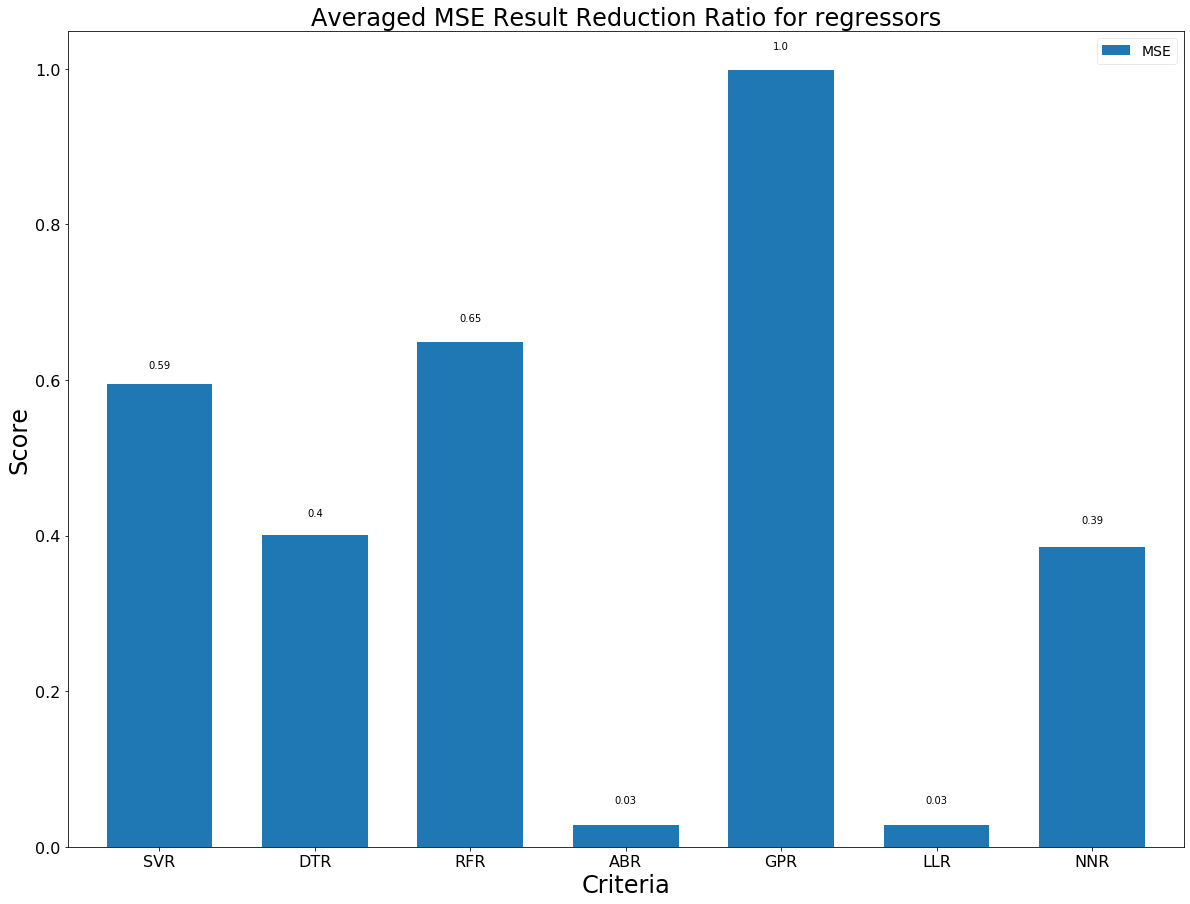

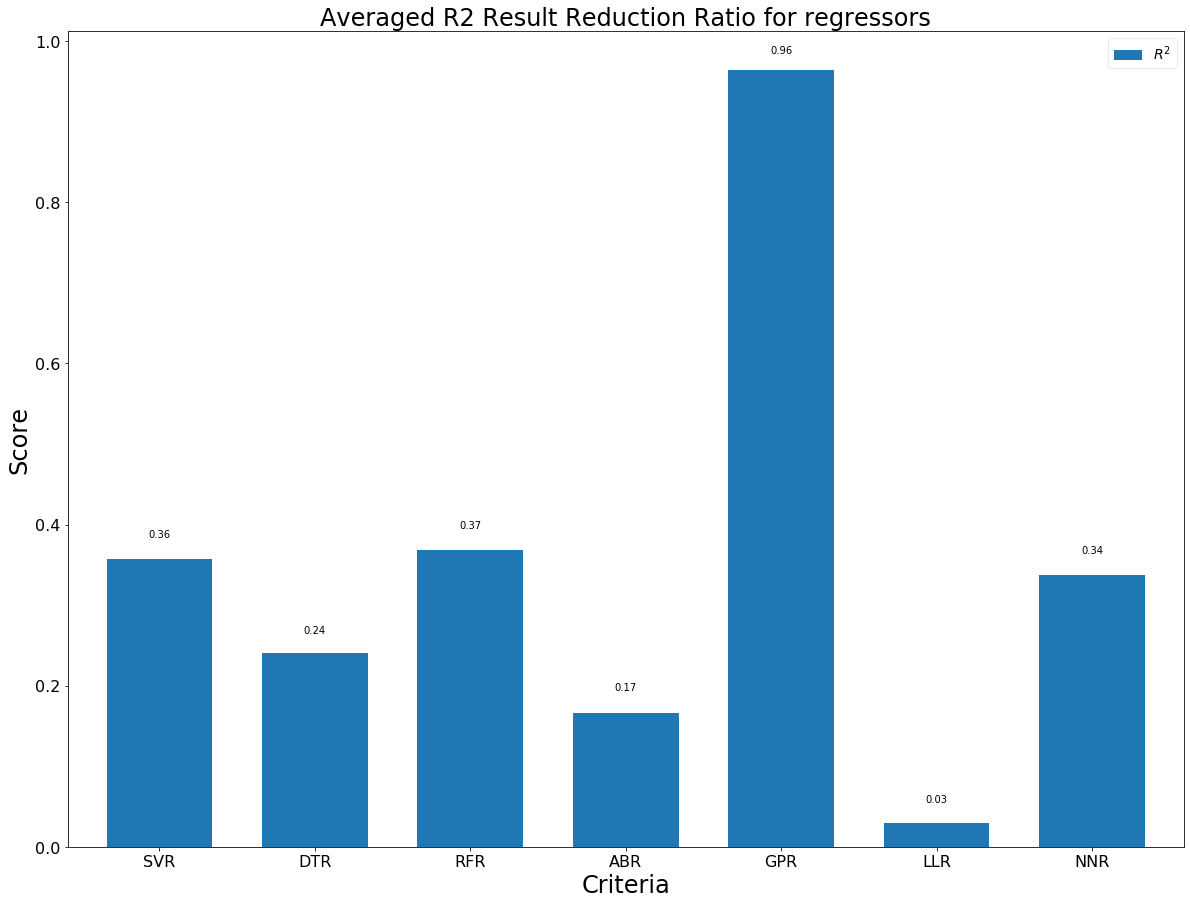

In [40]:
rs_avg_dif_reg = ((rs_avg_reg/den_reg)[:,2:] - (rs_avg_reg/den_reg)[:,:2])/(rs_avg_reg/den_reg)[:,2:] 
df_avg_dif_reg_mse = gen_rs(rs_avg_dif_reg[:,0].reshape(-1,1),["MSE"],regressors_regression)
df_avg_dif_reg_r2 = gen_rs(np.absolute(rs_avg_dif_reg[:,1].reshape(-1,1)),["$R^2$"],regressors_regression)
title_mse = str("Averaged MSE Result Reduction Ratio for regressors")
title_r2 = str("Averaged R2 Result Reduction Ratio for regressors")
print(title_mse)
plot_table(df_avg_dif_reg_mse)
plot_bar(df_avg_dif_reg_mse.T,title_mse,"Criteria","Score",True)
print(title_r2)
plot_table(df_avg_dif_reg_r2)
plot_bar(df_avg_dif_reg_r2.T,title_r2,"Criteria","Score",True)

In [41]:
end = time.time()
# output the running time for classification and regression
print ("time consumed: %.2f" % (end - start))

time consumed: 4036.67


# 3. Novelty Component

Here we are going to train four different series of models on Merck data (only **ACT2**) set by using four different strateges of dimensinal reduction. They are :

1. Set nov to  0, Cutting down attributes that contains zero occupied more than 85% of the values in that column.
2. Set nov to  1, Using sklearn.feature_selection.VarianceThreshold(0.8) to split out attributes of low variance.
3. Set nov to  2, Using sklearn.decomposition.PCA(n_components=400,random_state = 0).
4. Set nov to  3, Using sklearn.decomposition.TruncatedSVD(n_components =400,random_state =0).

*tips*: you need to run the cell **at the top of this notebook** to get the train_regression function.

**run the code** below to generate four objects of Merck Class

In [42]:
from models.regression.Merck_Molecular import Merck_molecular

nove_1 = Merck_molecular(1 , nov = 0)            # cutting down 85% of attributes are zero 
nove_2 = Merck_molecular(1 , nov = 1)    # VarianceThreshold()
nove_3 = Merck_molecular(1 , nov = 2)    # PCA()
nove_4 = Merck_molecular(1 , nov = 3)   # TruncatedSVD()



0.99 of variance explained.
0.99 of variance explained.


**run the code** cell by cell as followed to train the models ,get the excuting time and plot the result plotting. 

time consumed for 1:115.69


,Training correlation $R^2$,Testing correlation $R^2$
SVR,0.512,0.523
DTR,0.562,0.446
RFR,0.953,0.612
ABR,0.615,0.556
GPR,0.681,0.621
LLR,0.611,0.589
NNR,0.964,0.397


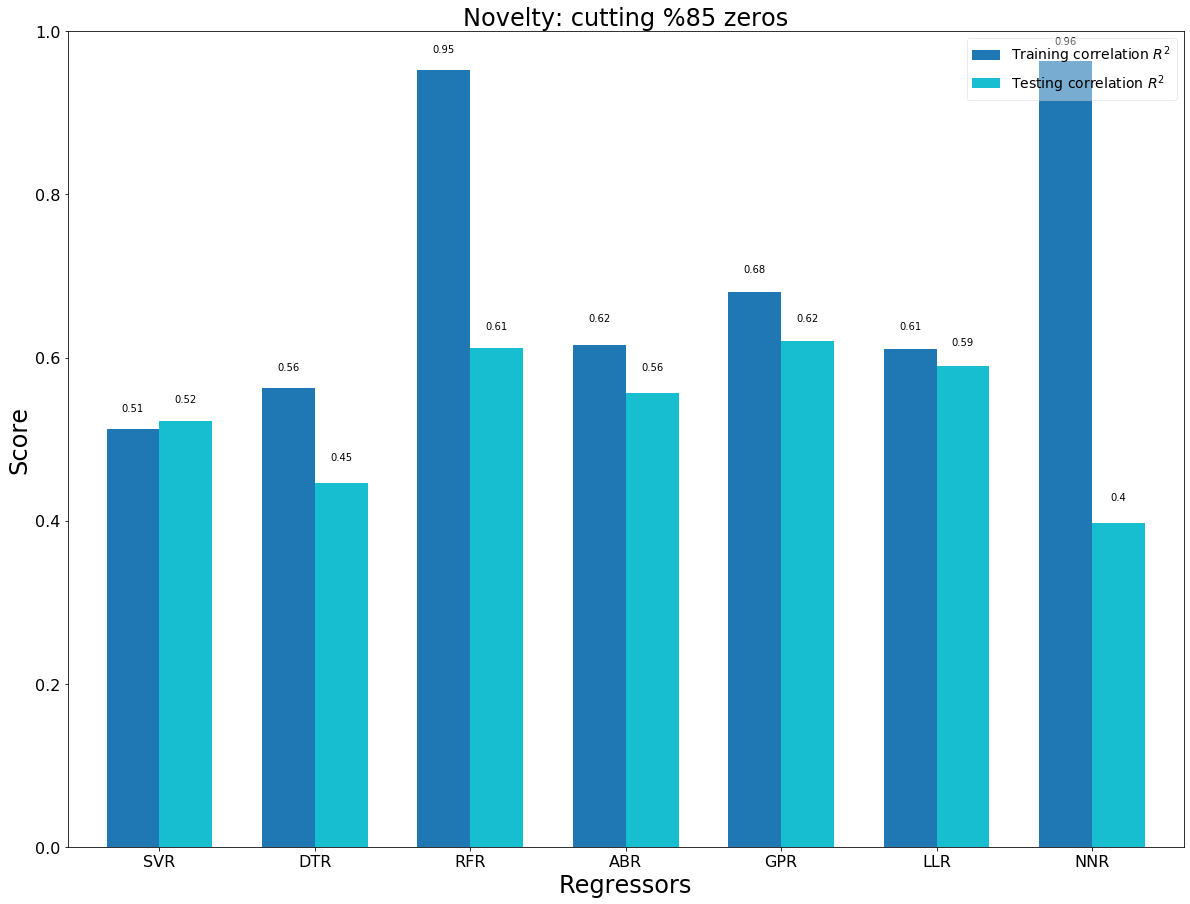

In [43]:
start = time.time()
nove_rs_1 = train_regression(nove_1,shape = (7,2))
end = time.time()
print("time consumed for 1:%.2f" % (end - start))
df_nv = gen_rs(nove_rs_1,["Training correlation $R^2$" ,"Testing correlation $R^2$" ],regressors_regression)
df_nv.round(3)
plot_table(df_nv)
title = str("Novelty: cutting %85 zeros")
plot_bar(df_nv.T,title,"Regressors","Score")

time consumed for 2:96.45
[[0.49133371 0.50245122]
 [0.56755196 0.4619801 ]
 [0.9533232  0.60568554]
 [0.60150077 0.55147475]
 [0.66514334 0.60633795]
 [0.58233714 0.56546208]
 [0.98038945 0.44926221]]


,Training correlation $R^2$,Testing correlation $R^2$
SVR,0.491,0.502
DTR,0.568,0.462
RFR,0.953,0.606
ABR,0.602,0.551
GPR,0.665,0.606
LLR,0.582,0.565
NNR,0.980,0.449


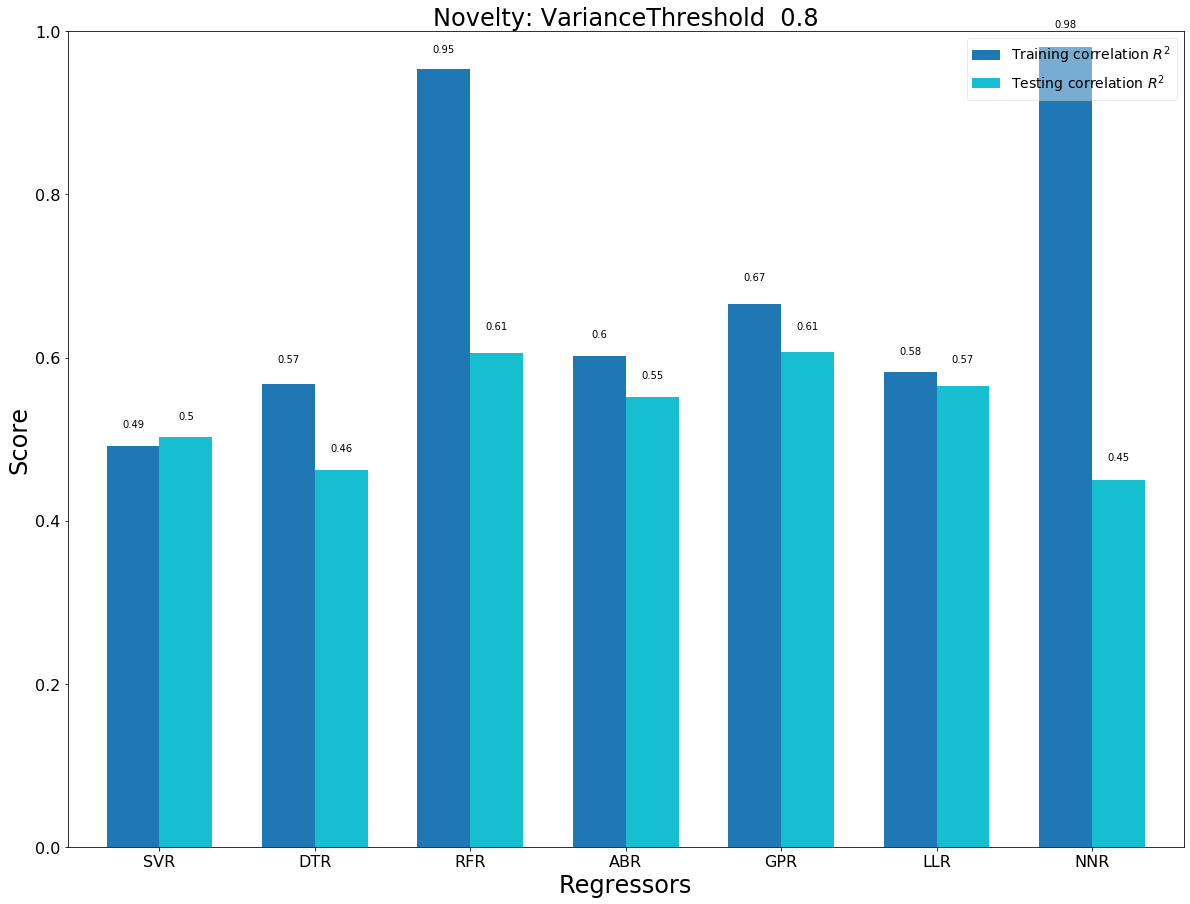

In [44]:
start = time.time()
nove_rs_2 = train_regression(nove_2,shape = (7,2))
end = time.time()
print("time consumed for 2:%.2f" % (end - start))
print(nove_rs_2)
df_nv = gen_rs(nove_rs_2,["Training correlation $R^2$" ,"Testing correlation $R^2$" ],regressors_regression)
df_nv.round(3)
plot_table(df_nv)
title = str("Novelty: VarianceThreshold  0.8")
plot_bar(df_nv.T,title,"Regressors","Score")

time consumed for 3:182.45
[[0.55625887 0.4679793 ]
 [0.49296449 0.34473896]
 [0.95762887 0.51917203]
 [0.61181021 0.48475466]
 [0.81057266 0.5634158 ]
 [0.7020278  0.54547829]
 [0.99078631 0.17303234]]


,Training correlation $R^2$,Testing correlation $R^2$
SVR,0.556,0.468
DTR,0.493,0.345
RFR,0.958,0.519
ABR,0.612,0.485
GPR,0.811,0.563
LLR,0.702,0.545
NNR,0.991,0.173


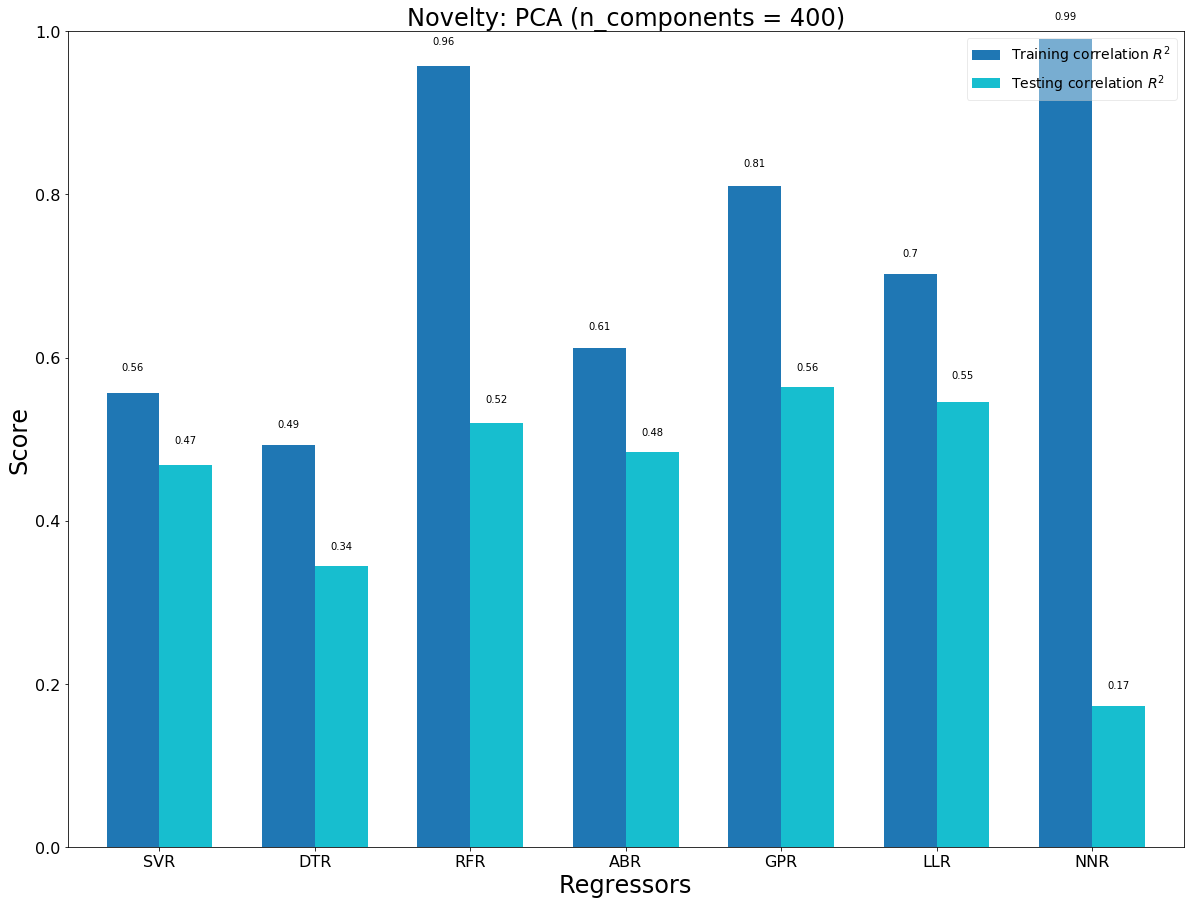

In [45]:
start = time.time()
nove_rs_3 = train_regression(nove_3,shape = (7,2))
end = time.time()
print("time consumed for 3:%.2f" % (end - start))
print(nove_rs_3)
df_nv = gen_rs(nove_rs_3,["Training correlation $R^2$" ,"Testing correlation $R^2$" ],regressors_regression)
df_nv.round(3)
plot_table(df_nv)
title = str("Novelty: PCA (n_components = 400)")
plot_bar(df_nv.T,title,"Regressors","Score")

time consumed for 4:177.11
[[0.57422818 0.4920048 ]
 [0.53533891 0.31204535]
 [0.95449677 0.51211527]
 [0.60826526 0.46969028]
 [0.79523093 0.57947931]
 [0.69934121 0.55014121]
 [0.98967812 0.16944816]]


,Training correlation $R^2$,Testing correlation $R^2$
SVR,0.574,0.492
DTR,0.535,0.312
RFR,0.954,0.512
ABR,0.608,0.470
GPR,0.795,0.579
LLR,0.699,0.550
NNR,0.990,0.169


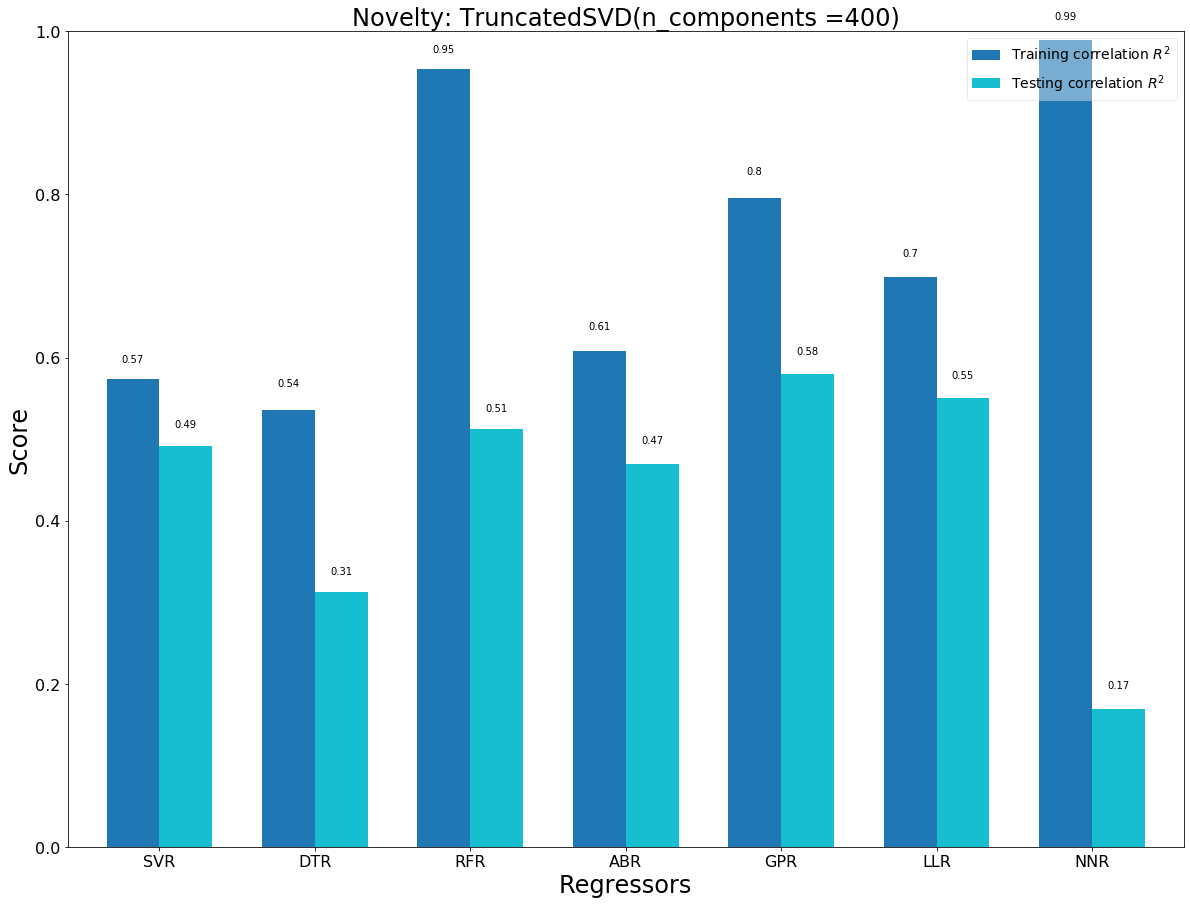

In [46]:
start = time.time()
nove_rs_4 = train_regression(nove_4,shape = (7,2))
end = time.time()
print("time consumed for 4:%.2f" % (end - start))
print(nove_rs_4)
df_nv = gen_rs(nove_rs_4,["Training correlation $R^2$" ,"Testing correlation $R^2$" ],regressors_regression)
df_nv.round(3)
plot_table(df_nv)
title = str("Novelty: TruncatedSVD(n_components =400)")
plot_bar(df_nv.T,title,"Regressors","Score")